# Genetic Algorithm for Traveling Salesman Problem

This notebook contains Python code implementing a Genetic Algorithm (GA) for solving the Traveling Salesman Problem (TSP).

## Overview

The Genetic Algorithm (GA) implemented in this repository simulates the process of natural selection and evolution to find near-optimal solutions for the TSP. It includes classes for representing cities and individuals (chromosomes), as well as functions for initializing populations, performing selection, crossover, mutation, and evaluating fitness.

## Libraries for Genetic Algorithm

The following Python libraries are imported to support the implementation of the Genetic Algorithm:

- `csv`: Used for reading and writing CSV files, potentially for loading data or exporting results.
- `matplotlib.pyplot`: Enables creating various plots and visualizations to analyze the genetic algorithm's performance.
- `numpy`: Provides support for multi-dimensional arrays and mathematical operations, often used for data manipulation.
- `seaborn`: Offers a high-level interface for statistical data visualization, potentially used for visualizing genetic algorithm results.
- `itertools.permutations`: Generates permutations of iterables, useful for genetic algorithm operations like crossover.
- `random`: Provides functions for generating random numbers and sampling from sequences, crucial for implementing randomness in genetic algorithms.
- `copy.deepcopy`: Utilized for creating deep copies of objects, preserving nested structures, commonly used for creating copies of chromosomes.
- `cv2`: OpenCV library for image processing tasks, might be used for loading or manipulating images in certain genetic algorithm applications.
- `os`: Facilitates interaction with the operating system, including file and directory operations, possibly used for managing files.
- `math`: Provides mathematical functions and constants defined by the C standard, utilized for mathematical calculations within the genetic algorithm.

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from itertools import permutations,islice
import random
from copy import deepcopy
import cv2
import os
import math

The `City` class represents a city with a name, latitude, and longitude. It has the following attributes:

- `name`: The name of the city.
- `latitude`: The latitude coordinate of the city.
- `longitude`: The longitude coordinate of the city.

The class provides the following methods:

- `__init__(name, latitude, longitude)`: Initializes a new City object with the given name, latitude, and longitude.
- `__str__()`: Returns a string representation of the City object, including its name, latitude, and longitude.

In [2]:
class City:

    def __init__(self,name,latitude,longitude):
        self.name= name
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        CityStr = "City = "+ self.name+ ", latitude = "+ str(self.latitude)+ ", longitude = "+ str(self.longitude)
        return CityStr

The `Chromosome` class represents a chromosome in a genetic algorithm, where each gene represents a city in a TSP solution. It has the following attributes:

- `genes`: A list of City objects representing the order of cities in the chromosome.
- `cost`: The total cost of the TSP tour represented by the chromosome.
- `fitness`: The fitness value of the chromosome, often calculated as the inverse of the cost.

The class provides the following methods:

- `__init__(cities)`: Initializes a new Chromosome object with the given list of cities.
- `__str__()`: Returns a string representation of the Chromosome object, listing the names of the cities in the order specified by the genes.


In [3]:
class Chromosome:

    def __init__(self, cities):
        self.genes = cities
        self.cost= 0
        self.fitness = 0

    def __str__(self):
        ChromosomeStr =",".join(str(gene.name) for gene in self.genes)
        return ChromosomeStr

In [9]:
class GeneticAlgorithm:

    """A class implementing a genetic algorithm for solving the Traveling Salesman Problem (TSP).

    Attributes:
        numCities (int): The number of cities in the TSP.
        cities (list): A list of City objects representing the cities in the TSP.
        totalDistance (int): The total distance of the TSP tour.
        orderdedOfCities (int): The order of visiting cities in the TSP tour.
        costMatrix (dict): A dictionary representing the cost matrix with distances between cities.
        population (list): A list containing chromosomes representing the population.
        populationCount (int): The number of individuals in the population.
        eliteNum (int): The number of elite individuals selected from the population.

    Methods:
        costMatrixCompute(): Computes the cost matrix representing distances between cities.
        calculateFitnessAndCost(chromosome): Calculates the cost and fitness of a chromosome.
        addToPopulation(chromosome): Adds a chromosome to the population.
        eliteSelection(percentage): Performs elite selection to choose top individuals.
        selectRandomK(k): Randomly selects k individuals from the population.
        chooseFittest(candidates): Chooses the fittest individual from a list of candidates.
        kTornamentSelection(k): Performs k-tournament selection to choose an individual.
        partiallyMappedCrossover(parent1, parent2): Performs partially mapped crossover between two parents.
        crossover(popCount, elitesNum, k, crossOverProb): Performs crossover between individuals in the population.
        applyMutaion(Population, mutaionProp): Applies mutation to individuals in the population.
        initialPopulation(PopulationCount): Initializes the population with random individuals.
        computeDistance(city1, city2): Computes the distance between two cities.
        loadCitiesFromCsv(filePath): Loads city data from a CSV file.
        run(k, populationSize, GenerationCount, elitePercentage, crossOverProp, mutaionProp):
            Runs the genetic algorithm to optimize the TSP.
        find_index(cities, name): Finds the index of a city in a list of cities.
    """

    def __init__(self):
        self.numCities= 0
        self.cities= []
        self.totalDistance = 0
        self.orderdedOfCities=0
        self.costMatrix= {}
        self.population=[]
        self.populationCount=0
        self.eliteNum=0
        
    # def generate_permutations(self,cities, n):
    #     return islice(permutations(cities), n)

    def costMatrixCompute(self):
        """Computes the cost matrix representing distances between cities."""
        for city1 in self.cities:
            self.costMatrix[city1.name]={}
            for city2 in self.cities:
                self.costMatrix[city1.name][city2.name] = self.computeDistance(city1, city2)
            # print(self.costMatrix[city1.name])
                    
       
    def calculateFitnessAndCost(self,chromosome):
        """Calculates the cost and fitness of a chromosome.
        
        Args:
            chromosome (Chromosome): The chromosome for which to calculate cost and fitness.
        
        Returns:
            tuple: A tuple containing the cost and fitness of the chromosome.
        """
        chromosomeCost=0
        # print("calculateFitnessAndCost")
        for i in range(len(chromosome.genes)-1):
            
            chromosomeCost += self.costMatrix[chromosome.genes[i].name][chromosome.genes[i+1].name]
        chromosomeCost +=  self.costMatrix[chromosome.genes[-1].name][chromosome.genes[0].name] 
        return chromosomeCost, 1/chromosomeCost

    def addToPopulation(self,chromosome):
        """Adds a chromosome to the population.
        
        Args:
            chromosome (Chromosome): The chromosome to add to the population.
        """
        self.population.append(chromosome)            
            
    def eliteSelection(self,percentage):
        """Performs elite selection to choose top individuals.
        
        Args:
            percentage (float): The percentage of elite individuals to select.
            
        Returns:
            list: A list of elite individuals selected from the population.
        """
        num_of_elites = int(percentage * len(self.population))
        #print(num_of_elites)
        sorted_population = sorted(self.population, key=lambda x: x.fitness, reverse=True)
        elites = deepcopy(sorted_population[:num_of_elites])
        #print(elites[0].genes)
        # print(len(elites))
        return elites
    
    def selectRandomK(self,k):
        """Randomly selects k individuals from the population.
        
        Args:
            k (int): The number of individuals to select.
            
        Returns:
            list: A list of randomly selected individuals.
        """
        randomIndividuals = random.sample(self.population, k)
        return randomIndividuals
    
    def chooseFittest(self,candidates):
        """Chooses the fittest individual from a list of candidates.
        
        Args:
            candidates (list): A list of candidate individuals.
            
        Returns:
            Individual: The fittest individual from the list of candidates.
        """
        return sorted(candidates, key=lambda x: x.fitness, reverse=True)[0]

    
    def kTornamentSelection(self,k):
        """Performs k-tournament selection to choose an individual.
        
        Args:
            k (int): The number of individuals to compete in each tournament.
            
        Returns:
            Individual: The selected individual.
        """
        candidates = self.selectRandomK(k)
        return self.chooseFittest(candidates)
    

    def partiallyMappedCrossover(self, parent1, parent2):
        """Performs partially mapped crossover between two parents.
        
        Args:
            parent1 (Chromosome): The first parent chromosome.
            parent2 (Chromosome): The second parent chromosome.
            
        Returns:
            tuple: A tuple containing two offspring chromosomes resulting from the crossover.
        """
        # Initialize the offspring as copies of the parents
        offspring1 = deepcopy(parent1)
        offspring2 = deepcopy(parent2)
        # print("parent1")
        # print([gene.name for gene in offspring1.genes])
        # print("parent2")
        # print([gene.name for gene in offspring2.genes])
        
        
        # Choose two random crossover points
        point1, point2 = sorted(random.sample(range(len(parent1.genes)), 2))
        # print(point1, point2 )
        
        
        # print(point1, point2)
        for i in range(point1, point2):
            # # print("indix")
            # # print(parent2.genes[i])
            
            
            # index =self.find_index(offspring1.genes,parent2.genes[i].name)
            # offspring1.genes[index]=offspring1.genes[i]
            # offspring1.genes[i]=parent2.genes[i]
           

            # index = self.find_index(offspring2.genes,parent1.genes[i].name)
            # offspring2.genes[index]=offspring2.genes[i]
            # offspring2.genes[i]=parent1.genes[i]
            temp1 = offspring1.genes[i]
            temp2 = offspring2.genes[i]
            
            index1 = self.find_index(offspring1.genes, temp2.name)
            index2 = self.find_index(parent2.genes, temp1.name)
            
            offspring1.genes[i], offspring1.genes[index1] = offspring1.genes[index1], offspring1.genes[i]
            offspring2.genes[i], offspring2.genes[index2] = offspring2.genes[index2], offspring2.genes[i]

        # print("parent1")
        # print([gene.name for gene in parent1.genes])
        # print("parent2")
        # print([gene.name for gene in parent2.genes])
        # print("C1")
        # print([gene.name for gene in offspring1.genes])
        # print("C2")
        # print([gene.name for gene in offspring2.genes])
        return offspring1, offspring2
    
    def crossover(self,popCount,elitesNum,k,crossOverProb):
        """Performs crossover between individuals in the population.
        
        Args:
            popCount (int): The size of the population.
            elitesNum (int): The number of elite individuals.
            k (int): The number of individuals to compete in each tournament for selection.
            crossOverProb (float): The probability of performing crossover.
            
        Returns:
            list: A list of new individuals generated through crossover.
        """
        newPopulation= []
        crossOverCount= math.ceil((popCount - elitesNum)/2)
        #print(crossOverCount)
        for i in range(crossOverCount):
            # print(i)
            parent1=self.kTornamentSelection(k)
            parent2=self.kTornamentSelection(k)
            if random.random() < crossOverProb:
                child1,child2= self.partiallyMappedCrossover(parent1,parent2)
                cost,fit=self.calculateFitnessAndCost(child1)
                child1.cost=cost
                child1.fitness =fit
                newPopulation.append(child1)
                cost,fit=self.calculateFitnessAndCost(child2)
                child2.cost=cost
                child2.fitness =fit
                newPopulation.append(child2)
            else:
                newPopulation.append(deepcopy(parent1))
                newPopulation.append(deepcopy(parent2))
        return newPopulation 


    def applyMutaion(self,Population,mutaionProp):
        """Applies mutation to individuals in the population.
        
        Args:
            Population (list): The list of individuals in the population.
            mutaionProp (float): The probability of mutation.
        """
        for i in range(len(Population)):
            # print(i)
            random_index = random.randint(0, len(Population) - 1)
            parent = Population[random_index]
            # print("bfore")
            # print([gene.name for gene in Population[random_index].genes])
            # print(Population[random_index].fitness)
            if random.random() < mutaionProp:
                geneIndex1, geneIndex2 = sorted(random.sample(range(len(parent.genes)), 2))
                # print(geneIndex1, geneIndex2)
                # temp = parent.genes[geneIndex1]
                # parent.genes[geneIndex1] = parent.genes[geneIndex2]
                # parent.genes[geneIndex2]=temp
                parent.genes[geneIndex1], parent.genes[geneIndex2] = parent.genes[geneIndex2], parent.genes[geneIndex1]
                cost,fit=self.calculateFitnessAndCost(parent)
                parent.cost=cost
                parent.fitness =fit
                Population[random_index]=parent
                # print("after")
                # print([gene.name for gene in Population[random_index].genes])
                # print(Population[random_index].fitness)









                        

    

    def initialPopulation(self, PopulationCount):
        """Initializes the population with random individuals.
        
        Args:
            PopulationCount (int): The size of the population.
        """
        self.populationCount = PopulationCount
        city_list = list(self.cities)  # Convert set of cities to a list
        self.population=[]
        for _ in range(PopulationCount):
            random.shuffle(city_list)  # Shuffle the list of cities to generate a random permutation
            chromosome = Chromosome(city_list.copy())  # Create a chromosome with a copy of the shuffled city list
            
            # Calculate cost and fitness
            cost, fitness = self.calculateFitnessAndCost(chromosome)
            chromosome.cost = cost
            chromosome.fitness = fitness
            
            self.addToPopulation(chromosome)

       

    def computeDistance(self,city1,city2):
        """Computes the distance between two cities.
        
        Args:
            city1 (City): The first city.
            city2 (City): The second city.
            
        Returns:
            float: The distance between the two cities.
        """
        return ((city1.latitude - city2.latitude)**2 + (city1.longitude - city2.longitude)**2)**0.5
    
    
    
    def loadCitiesFromCsv(self,filePath):
        """Loads city data from a CSV file.
        
        Args:
            filePath (str): The file path of the CSV file containing city data.
        """
        with open(filePath, 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for row in reader:
                name, longitude, latitude = row
                # print(row)
                city = City(name, float(longitude), float(latitude))
                self.cities.append(city)
                self.numCities= self.numCities+1
                # print(" added ", str(city))
        # self.costMatrixCompute(self.cities)        

             


    def run(self,k=10,populationSize=100,GenerationCount=100,elitePercentage=0.02,crossOverProp=0.6,mutaionProp=0.1):
        """Runs the genetic algorithm to optimize the TSP.
        
        Args:
            k (int): The number of individuals to compete in each tournament for selection.
            populationSize (int): The size of the population.
            GenerationCount (int): The number of generations to run the genetic algorithm.
            elitePercentage (float): The percentage of elite individuals to select.
            crossOverProp (float): The probability of performing crossover.
            mutaionProp (float): The probability of mutation.
            
        Returns:
            tuple: A tuple containing the fitness of the best solution found, 
                   a list of the best solutions found in each generation, 
                   and a list of fitness values of the best solutions found in each generation.
        """
        self.costMatrixCompute()
        self.initialPopulation(populationSize)
        random.shuffle(self.population)
        histBest = []
        histFit = []
        for i in range(GenerationCount):
            # print(i)
            elites=self.eliteSelection(elitePercentage)
            # print([gene for gene in elites[0].genes])
            # print(len(elites))
            newPopulation=self.crossover(populationSize,len(elites),k,crossOverProp)
            #print(len(newPopulation))
            self.applyMutaion(newPopulation,mutaionProp)
            # print(len(newPopulation))
            elites.extend(newPopulation)
            # print(len(elites))
            self.population = elites
            #print(len(self.population))
            currBest=self.chooseFittest(self.population)
            # print(currBest.cost)
            histBest.append(currBest.genes)
            histFit.append(currBest.fitness)

            # self.plotPath(currBest.genes)
            # print(currBest.cost)
            
            
        # self.plotPath(self.chooseFittest(self.population).genes)
        # self.plotPath(self.population[0].genes)    
        return currBest.fitness,histBest,histFit 

    def find_index(self,cities, name):
        """Finds the index of a city in a list of cities.
        
        Args:
            cities (list): A list of City objects.
            name (str): The name of the city to find.
            
        Returns:
            int: The index of the city in the list of cities.
        """
        for i, city in enumerate(cities):
            if city.name == name:  # Adjust this condition based on your object comparison logic
                return i
        return -1  # Return -1 if the item is not found  

        
    @classmethod
    def plotPath(cls,visitedCityies,fitness):
        x=[]
        y=[]
        for city in visitedCityies:
            x.append(city.latitude) 
            y.append(city.longitude)
        x.append(x[0])
        y.append(y[0])    
        plt.figure(figsize=(10,10))
        plt.text(-50, -10, 'fitness(%s)'%(fitness), fontsize = 10)
        plt.text(-60, -15, 'Cities(%s)'%([city.name for city in visitedCityies]), fontsize = 10)
        plt.plot(x,y,marker='o',markerfacecolor='r')    

    @classmethod
    def imgGen(cls, visitedCities,fitness):
        x = [city.latitude for city in visitedCities]
        y = [city.longitude for city in visitedCities]
        x.append(x[0])
        y.append(y[0])

        plt.figure(figsize=(10, 10))
        plt.text(-50, -10, 'fitness(%s)'%(fitness), fontsize = 10)
        plt.text(-60, -15, 'Cities(%s)'%([city.name for city in visitedCities]), fontsize = 10)
        plt.plot(x, y,marker='o',markerfacecolor='r')
        plt.xlim(min(x) - 1, max(x) + 1)
        plt.ylim(min(y) - 1, max(y) + 1)
        plt.axis('off')  # Turn off axis

        # Save the plot as an image file
        plot_filename = 'temp_plot.png'
        plt.savefig(plot_filename, format='png', bbox_inches='tight', pad_inches=0)
        
        plt.close()
        # Read the saved image using OpenCV
        img = cv2.imread(plot_filename)

        # Delete the temporary image file
        os.remove(plot_filename)

        return img    

  


          


284.3810904080331


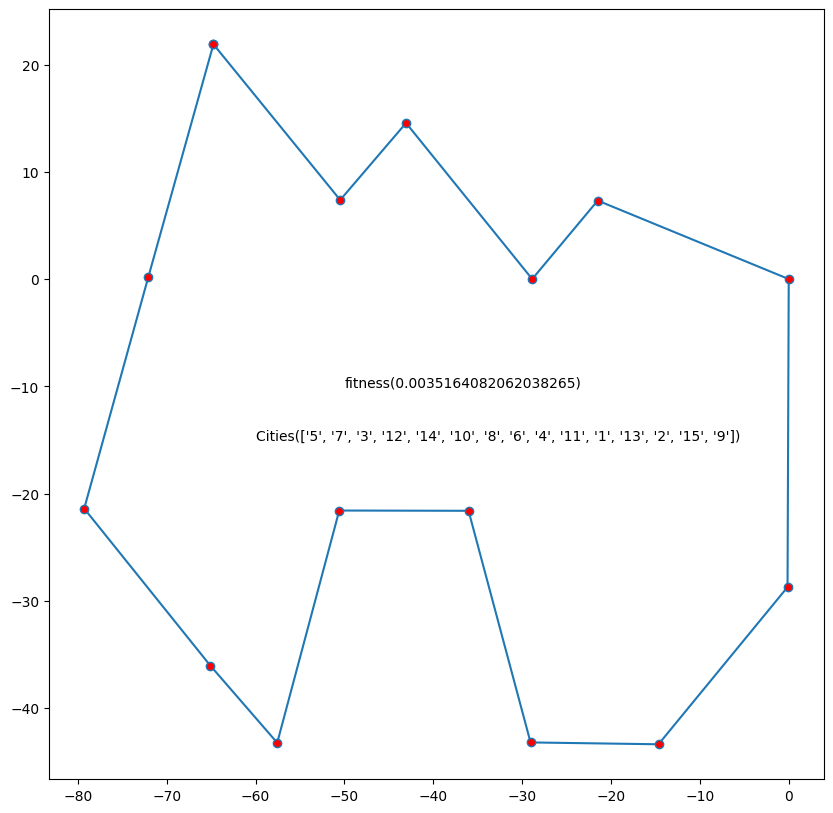

In [10]:
bestHistory=[]
bestFitness=-1
bestFitnessHistory=[]
algo=GeneticAlgorithm()
algo.loadCitiesFromCsv(r"C:\Users\Omar\Downloads\randomSarchOpt\DatasetCSV.csv")
for i in range(10):
    currFitness,currHist,currfitHist=algo.run(GenerationCount=100,k=4,elitePercentage=0.02,populationSize=50,mutaionProp=0.1,crossOverProp=0.6)
    if currFitness > bestFitness:
        bestHistory = currHist
        bestFitness= currFitness
        bestFitnessHistory=currfitHist
GeneticAlgorithm.plotPath(bestHistory[-1],bestFitnessHistory[-1])
print(1/bestFitness)           
   

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


C:\Users\Omar\AppData\Local\Temp\ipykernel_29180\2687406170.py:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


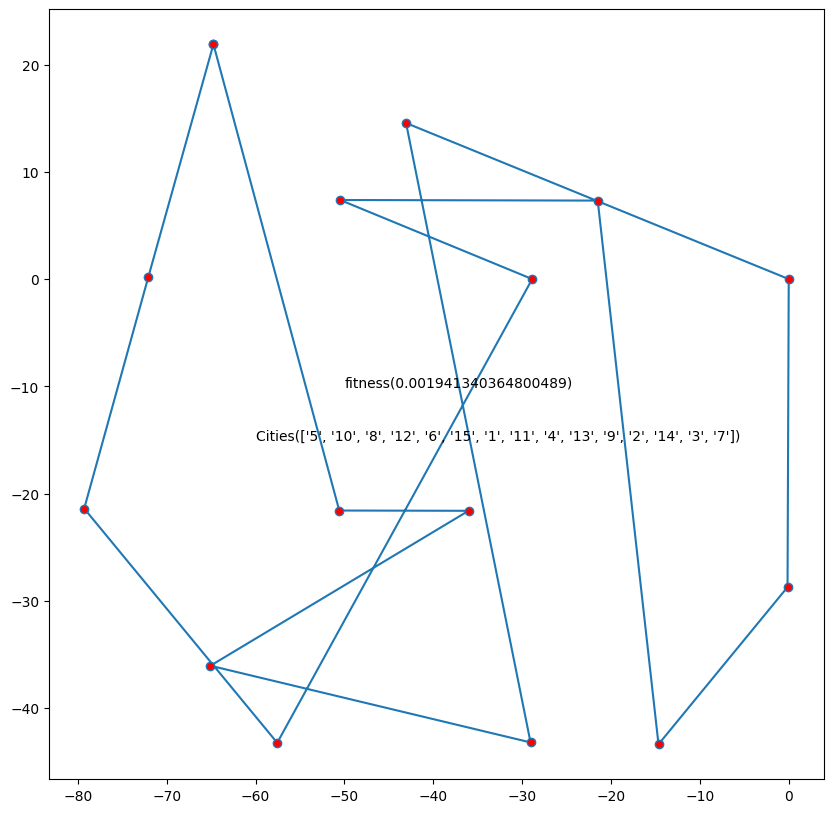

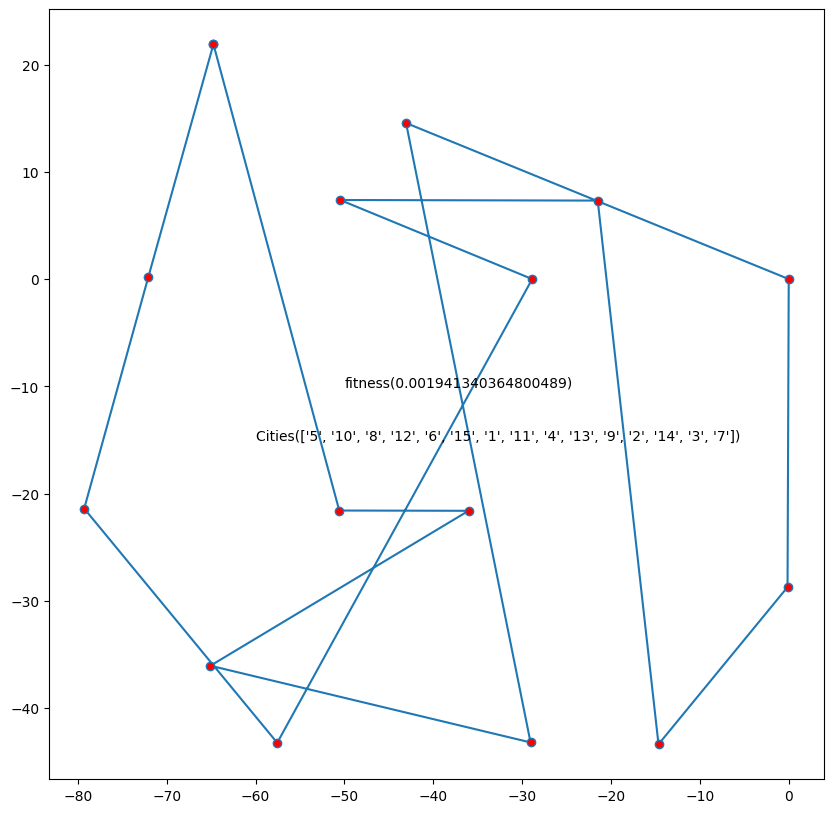

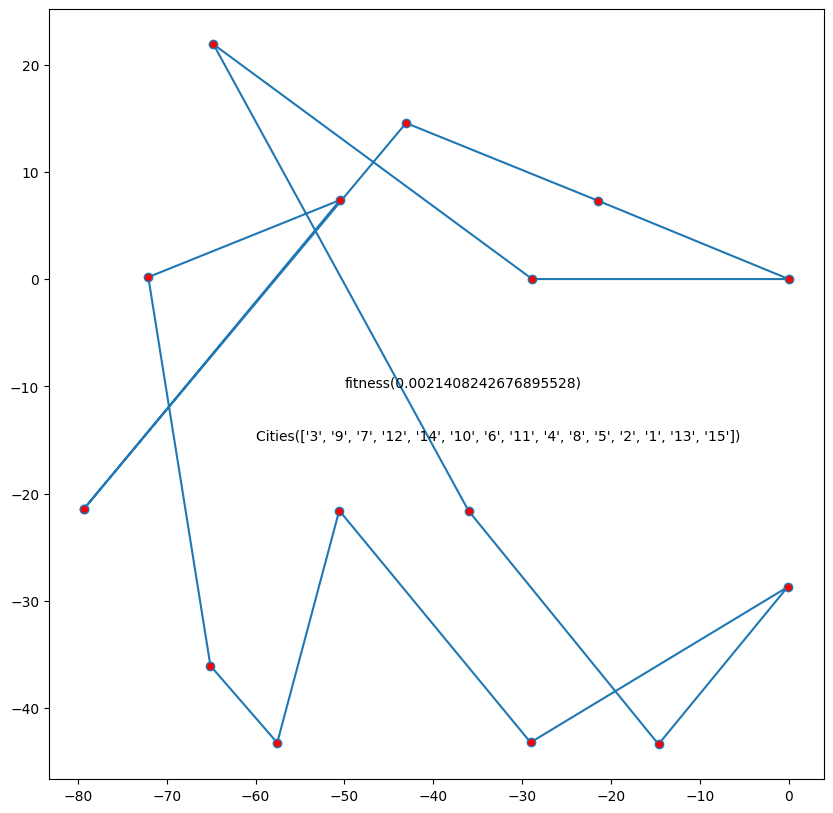

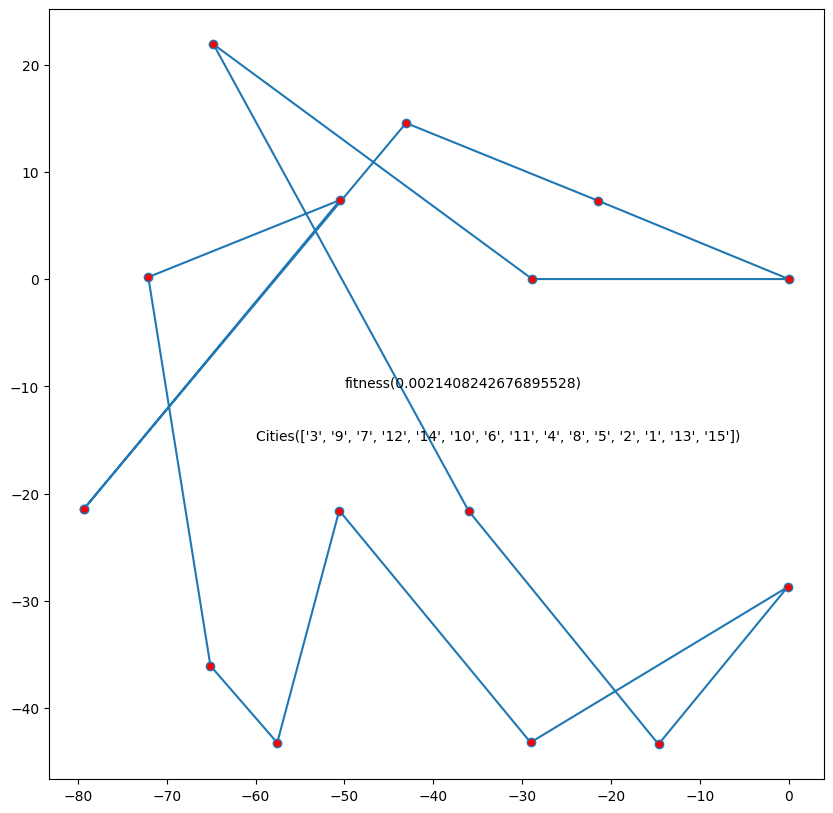

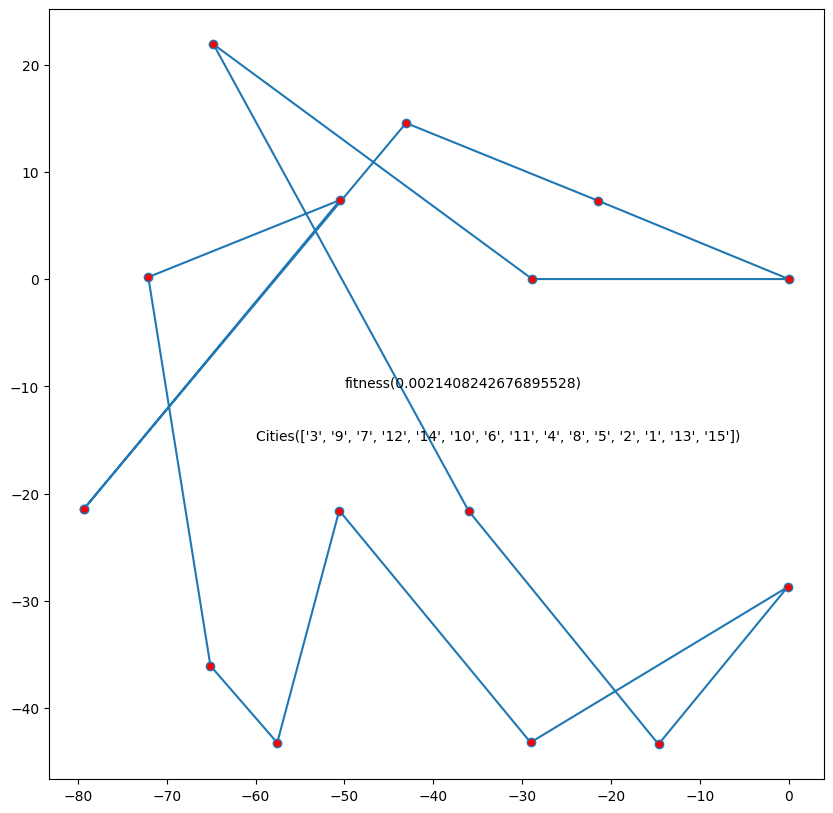

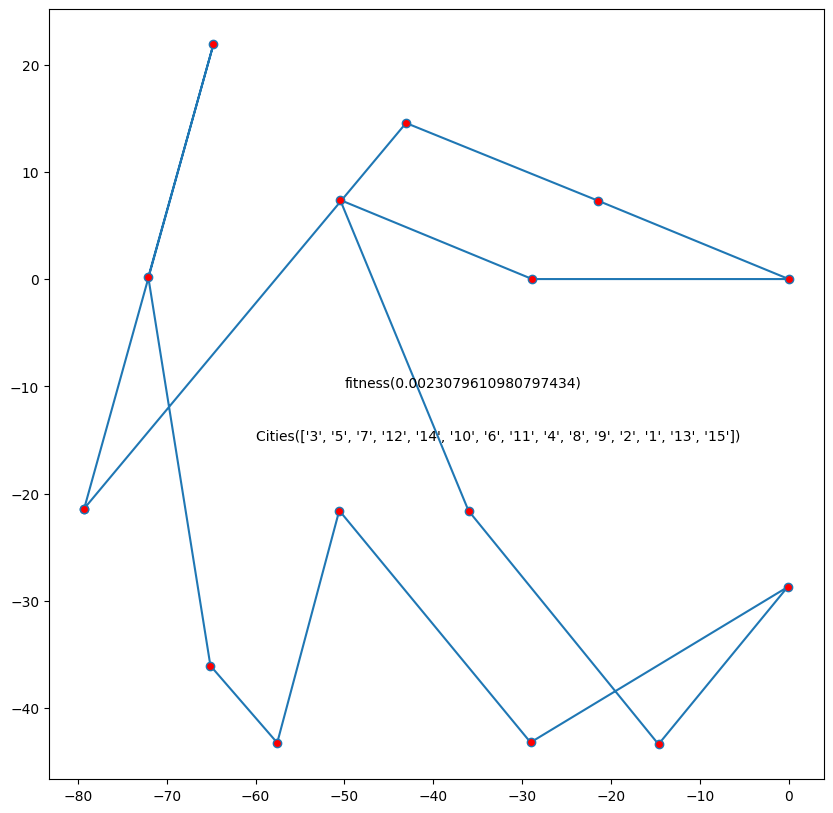

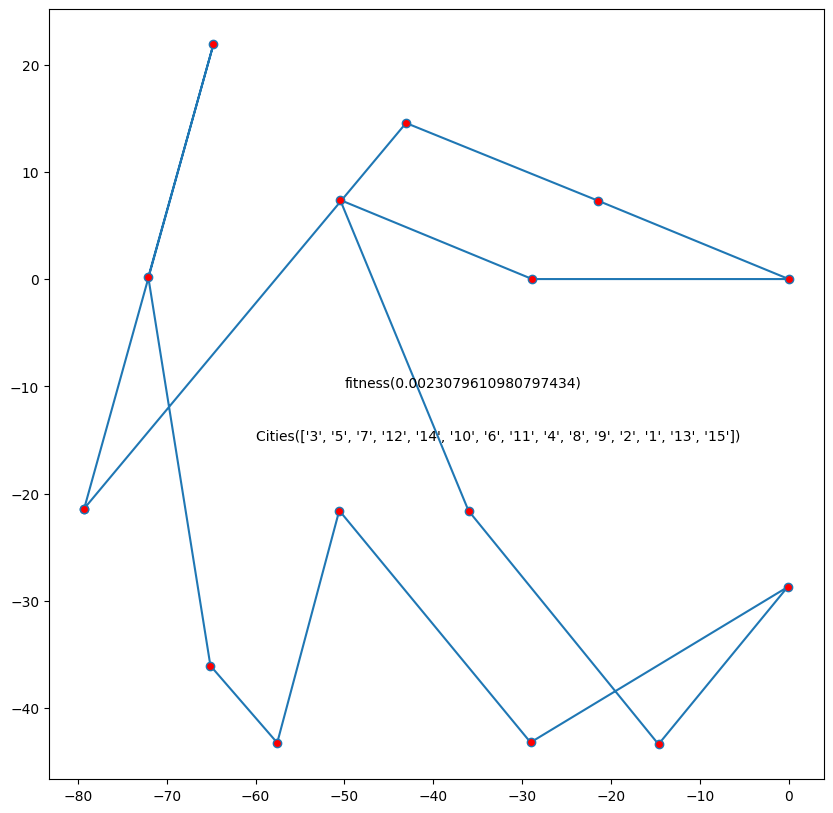

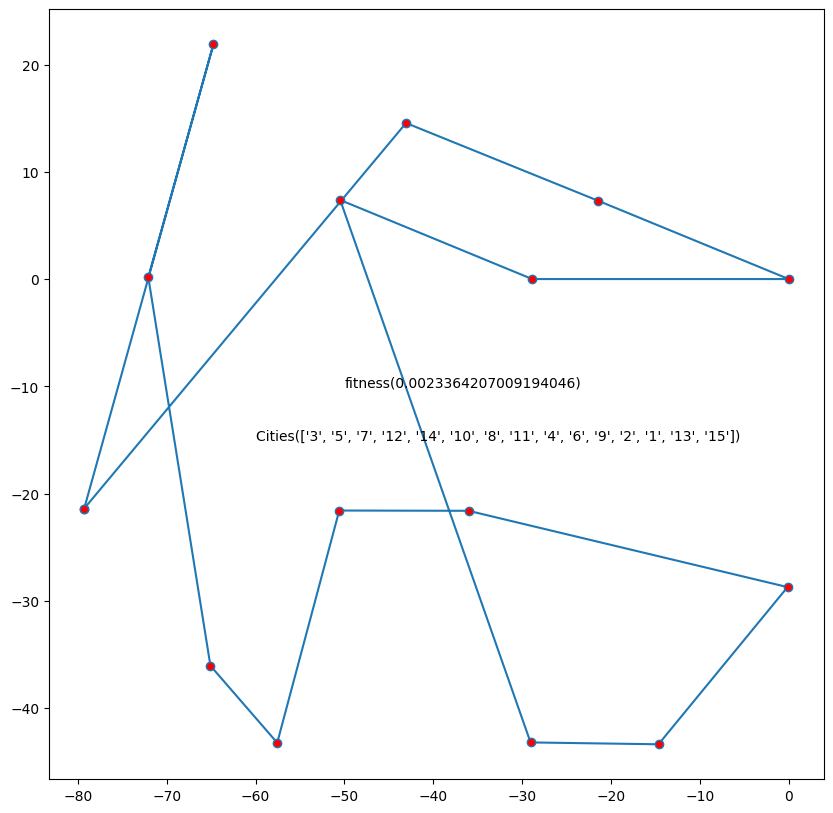

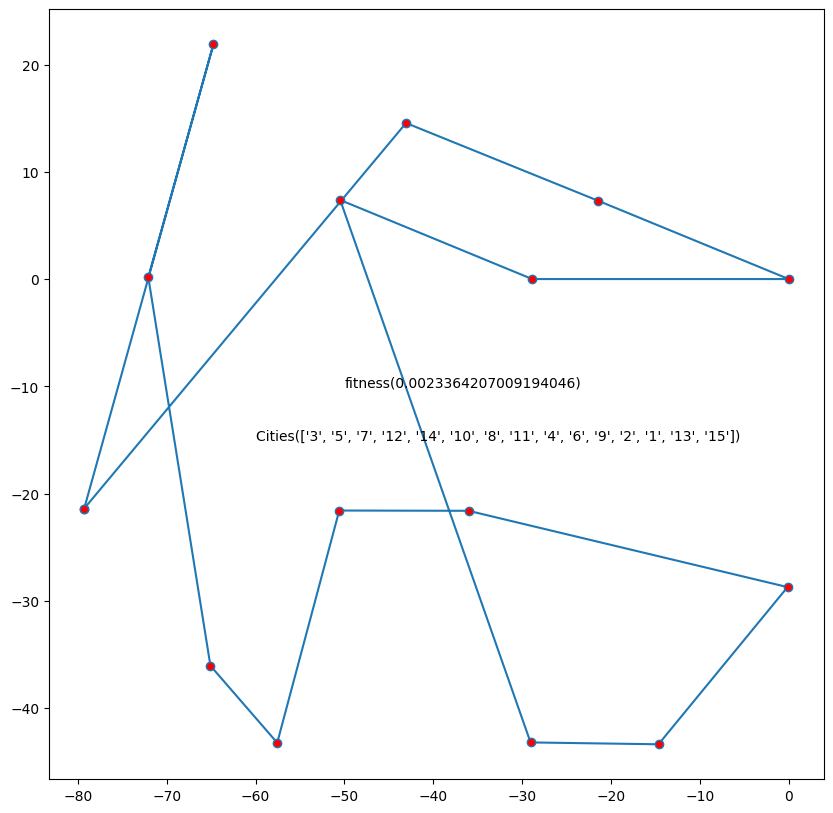

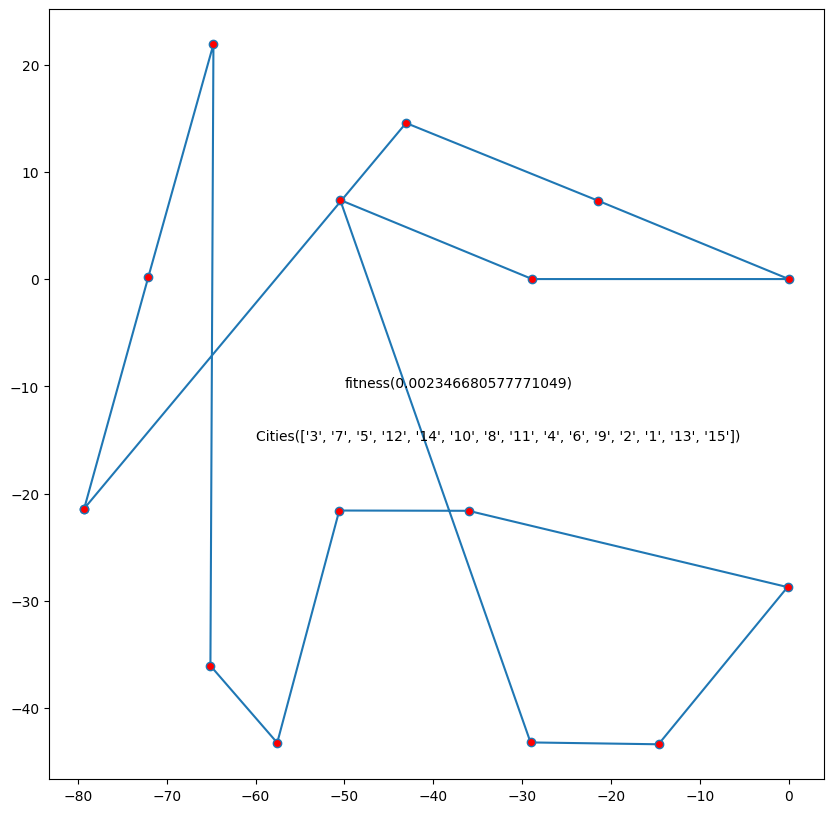

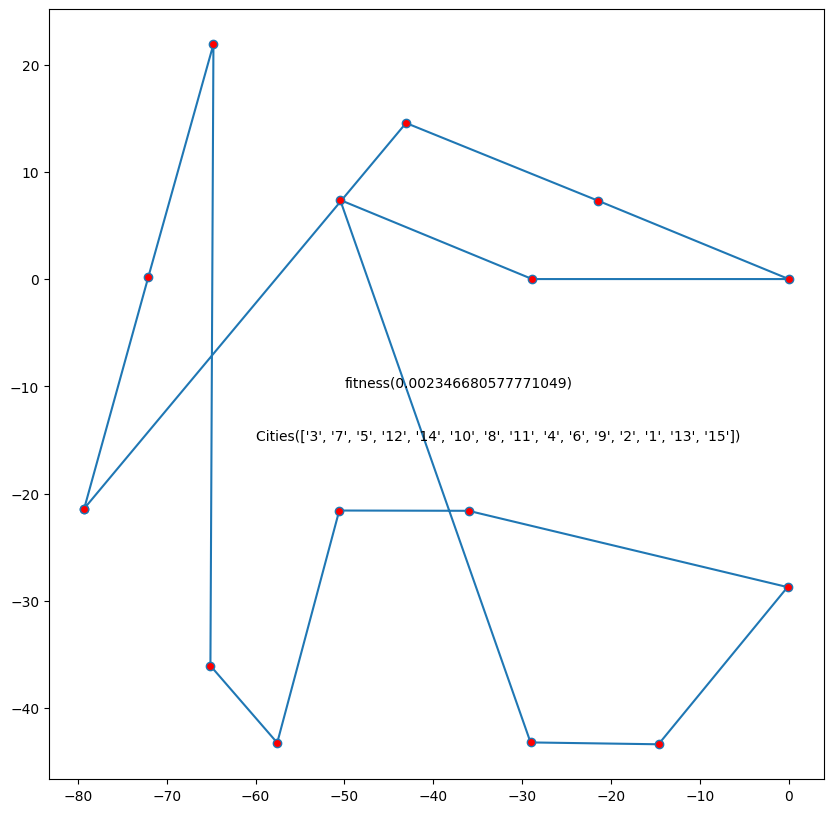

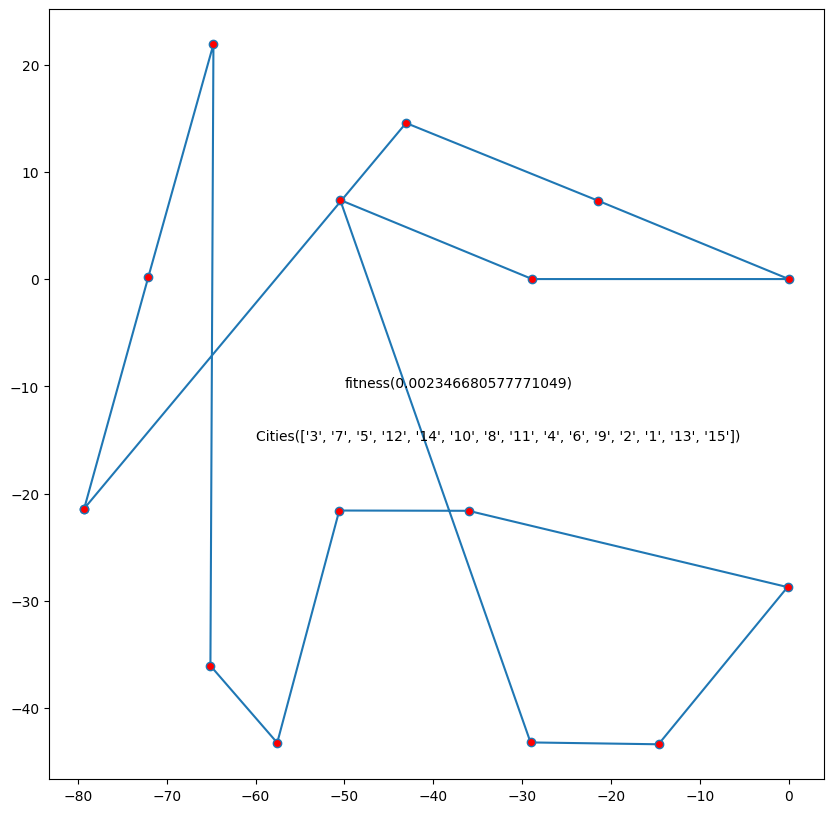

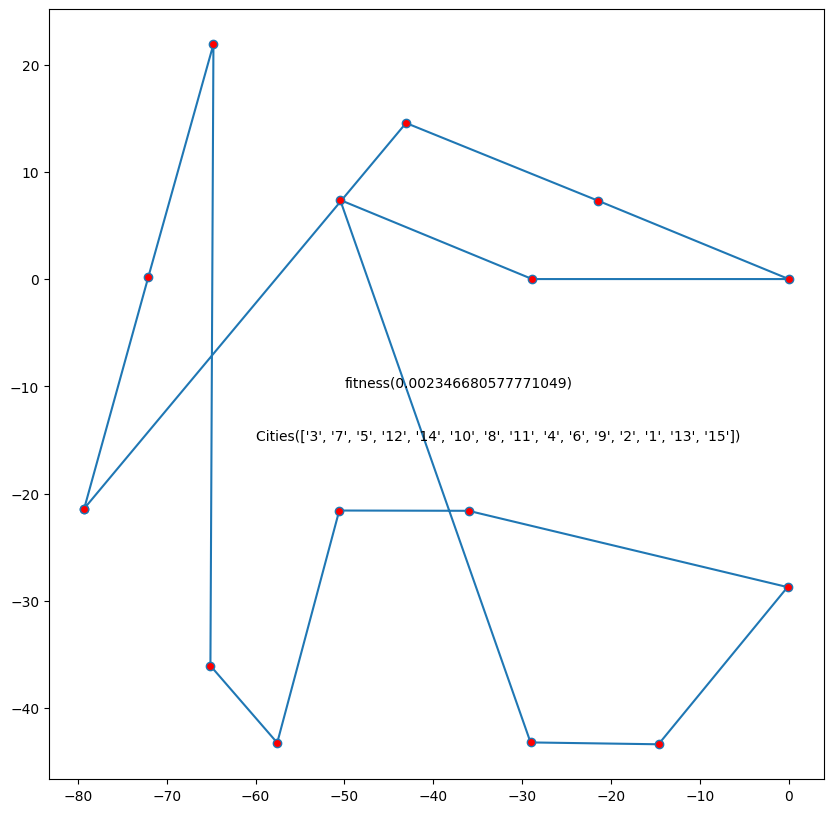

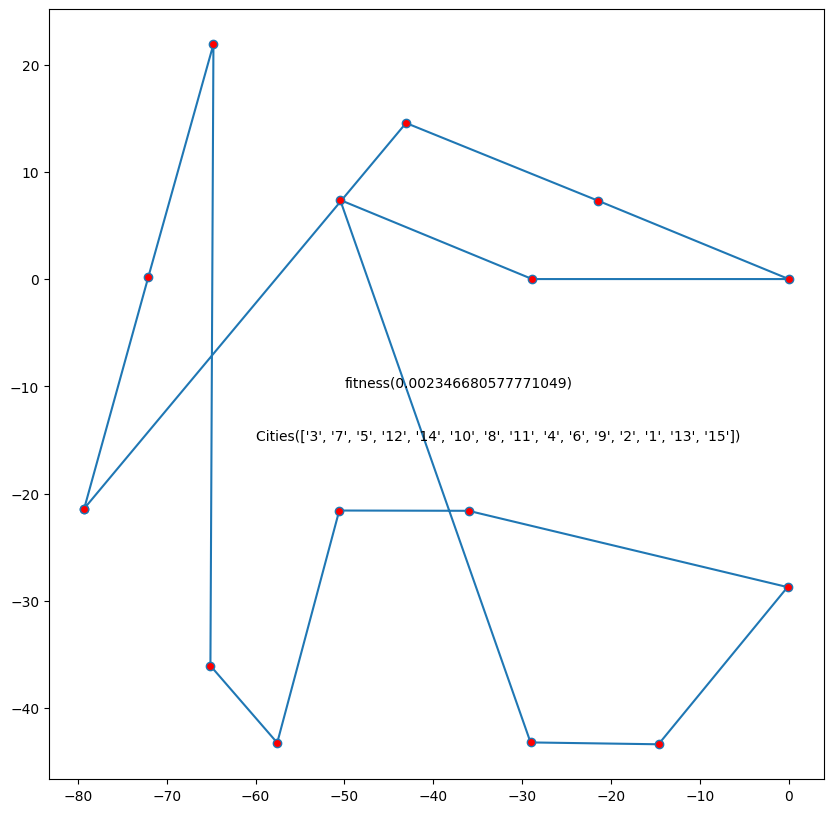

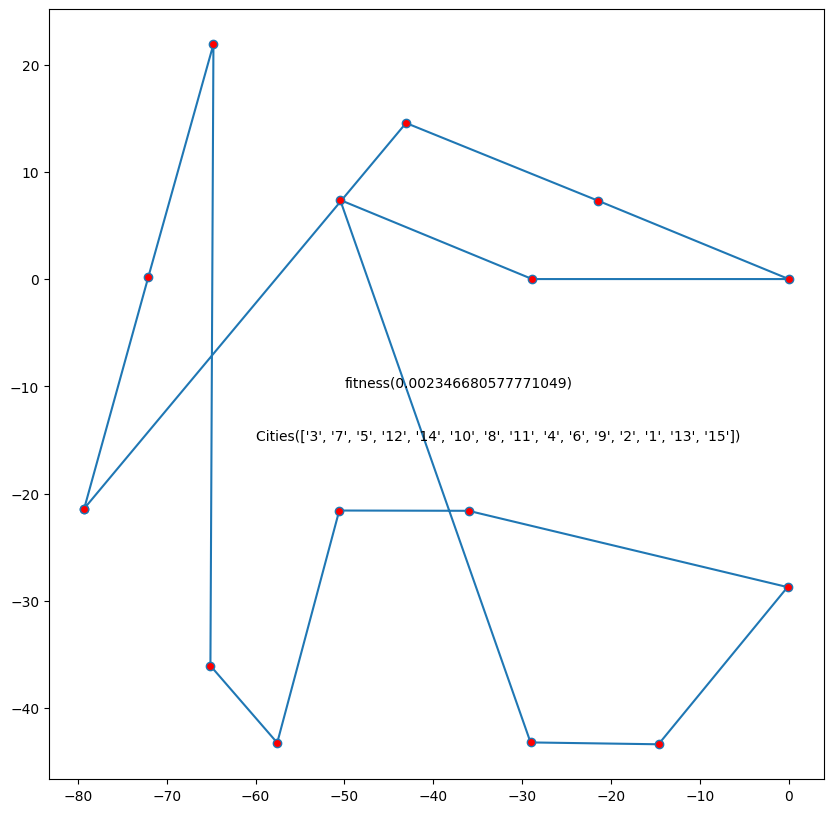

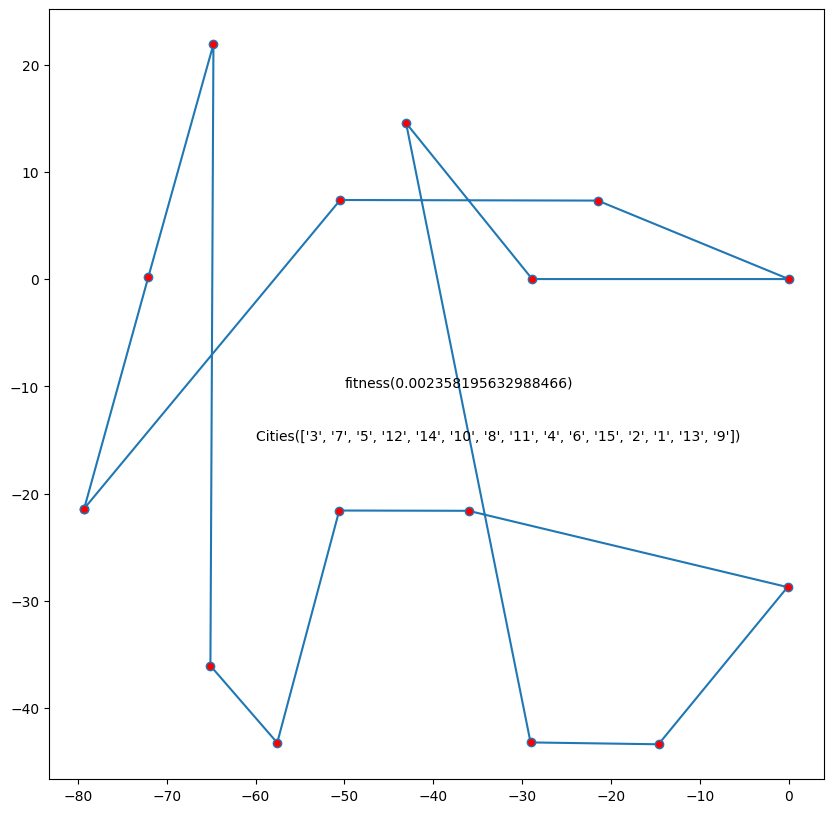

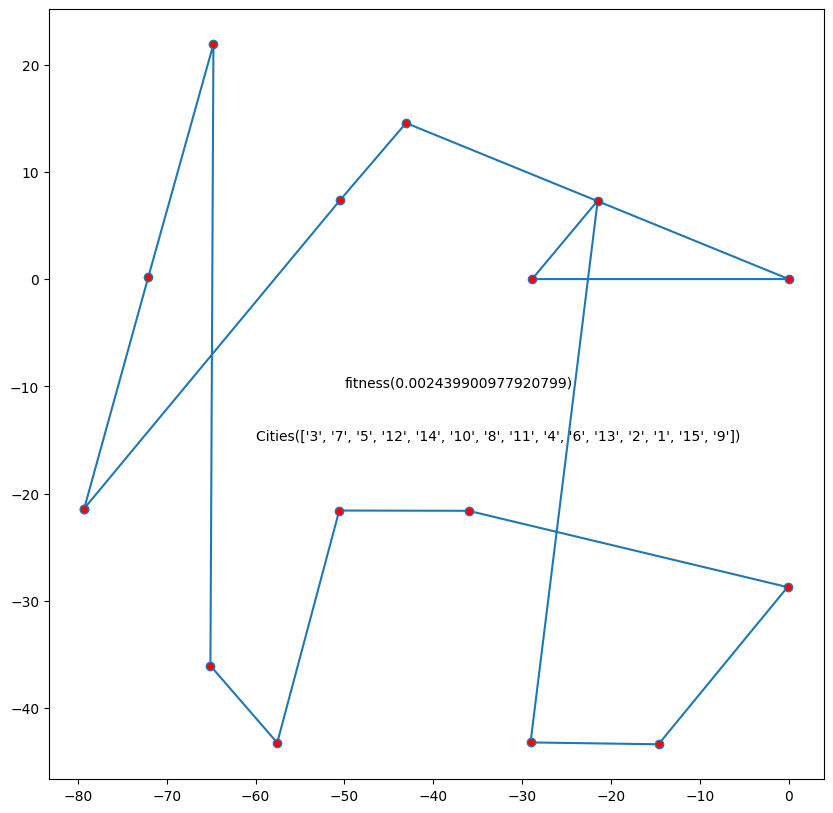

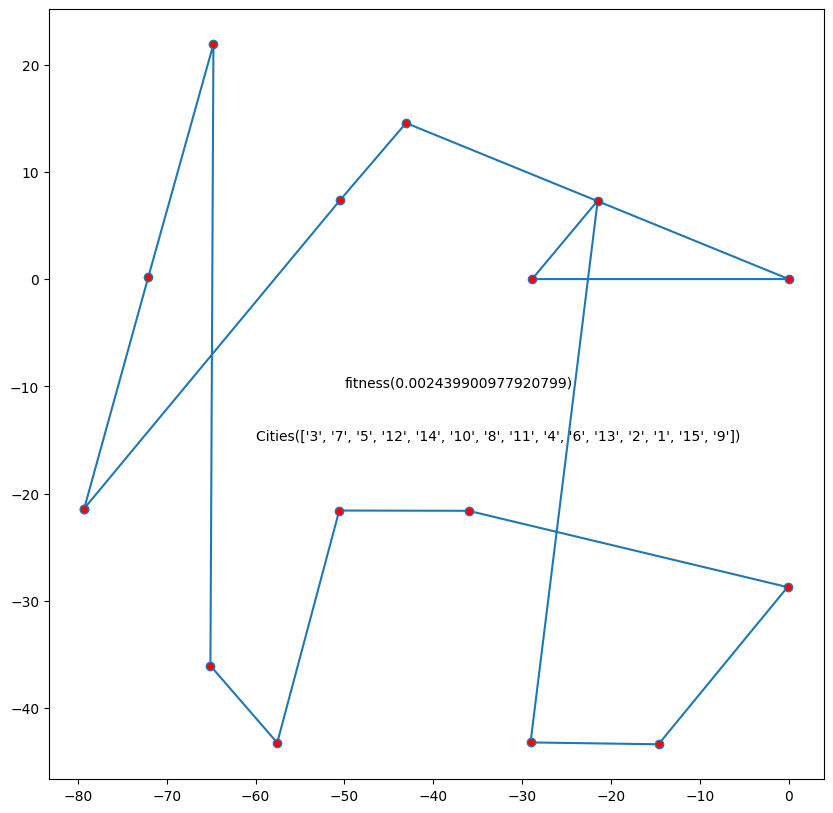

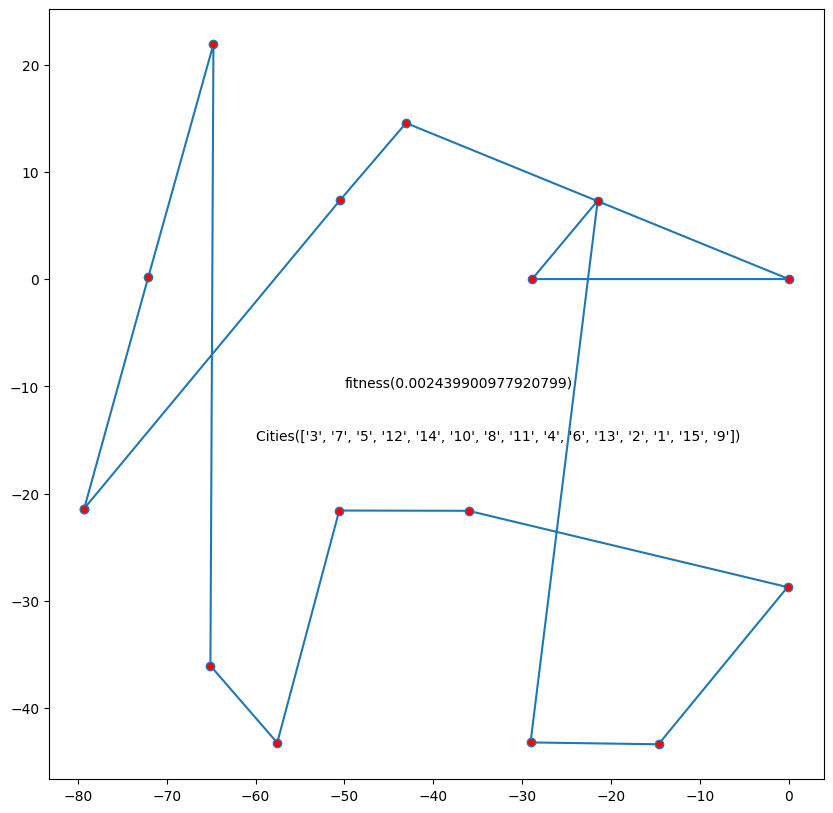

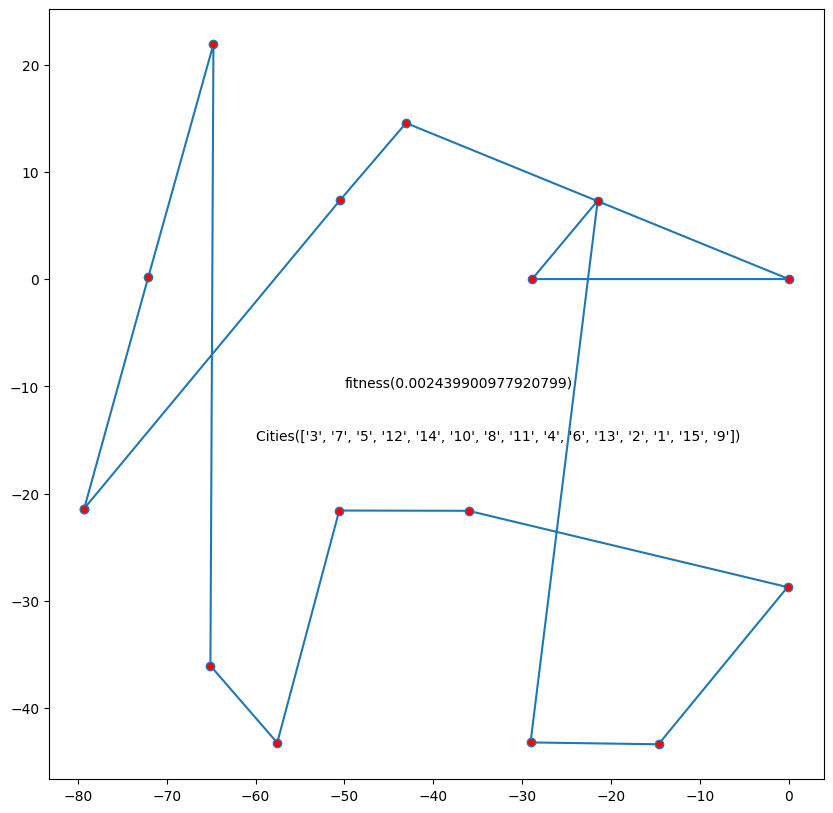

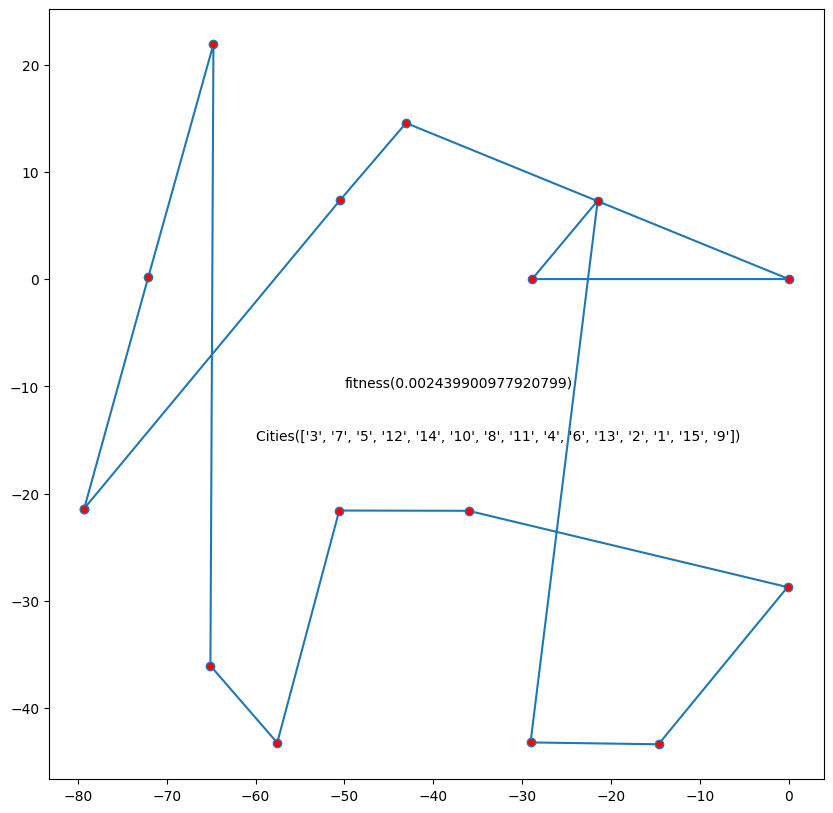

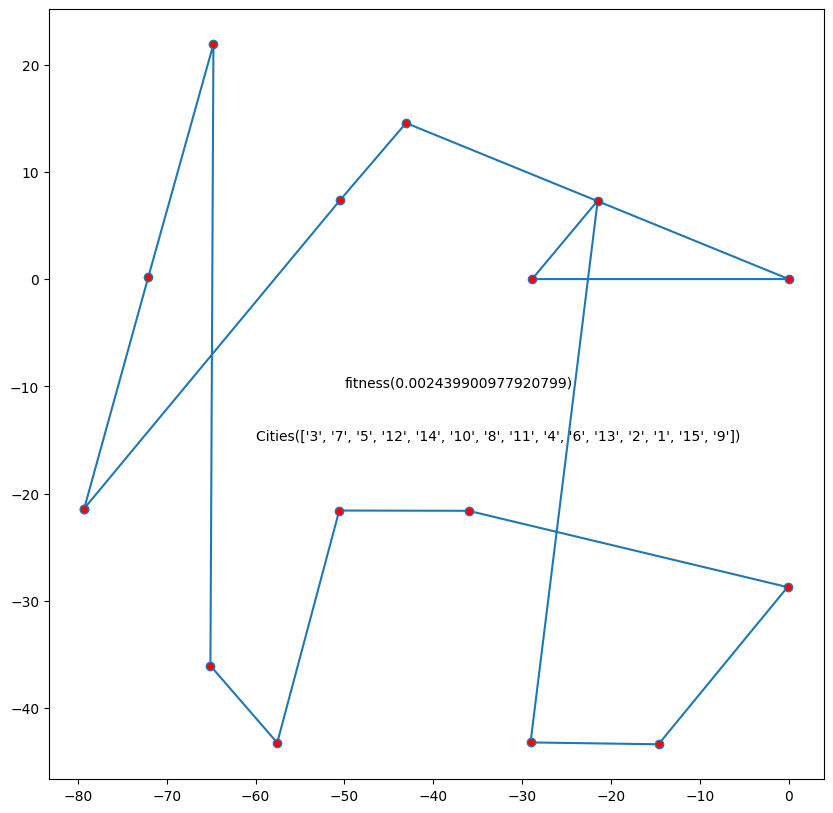

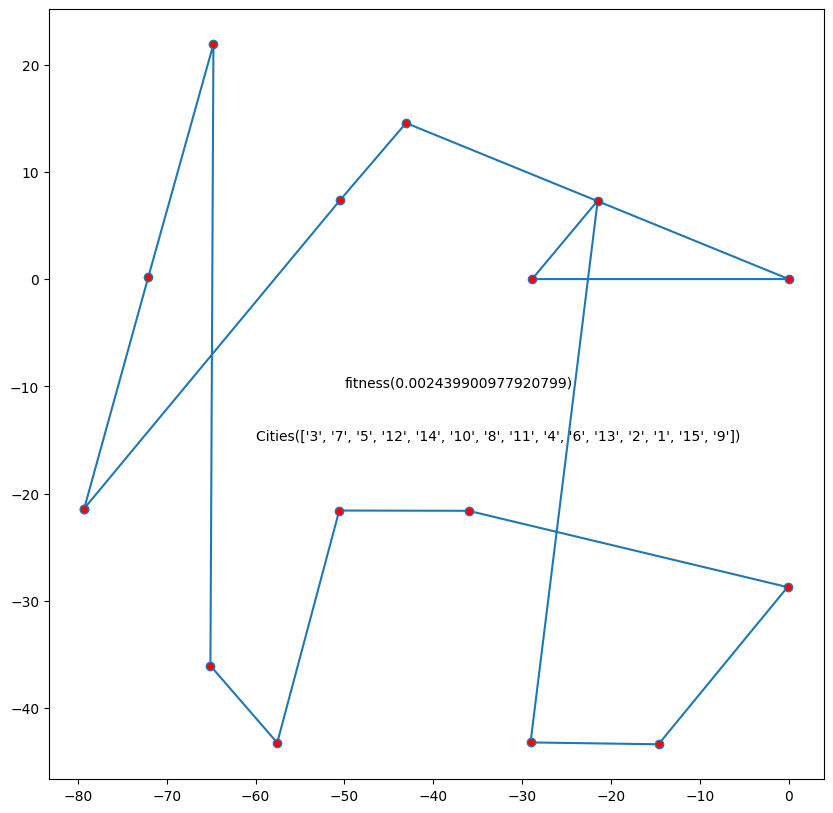

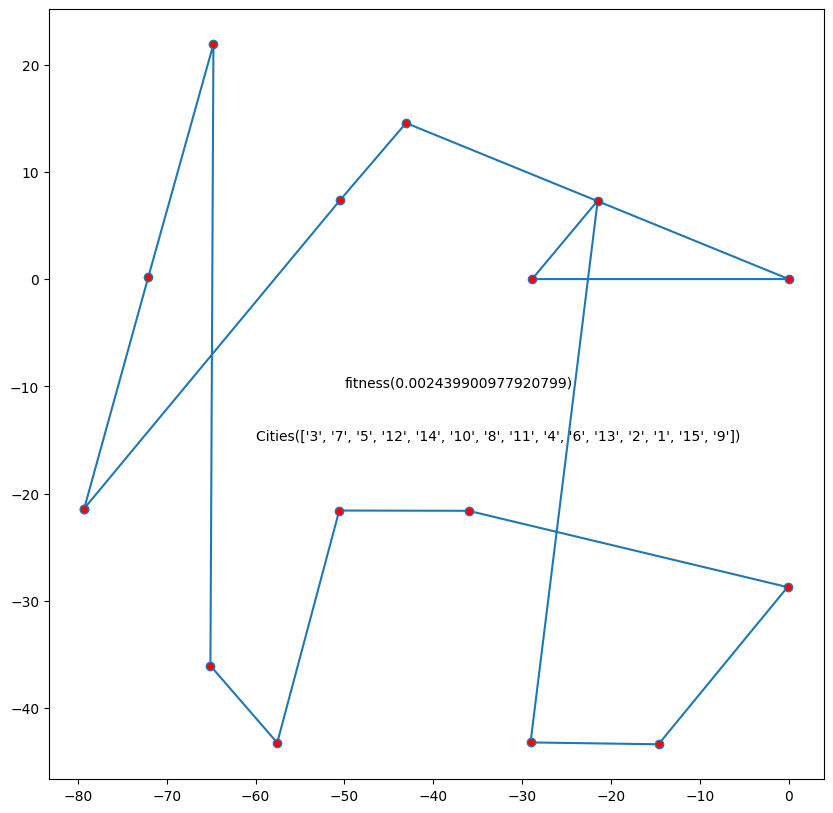

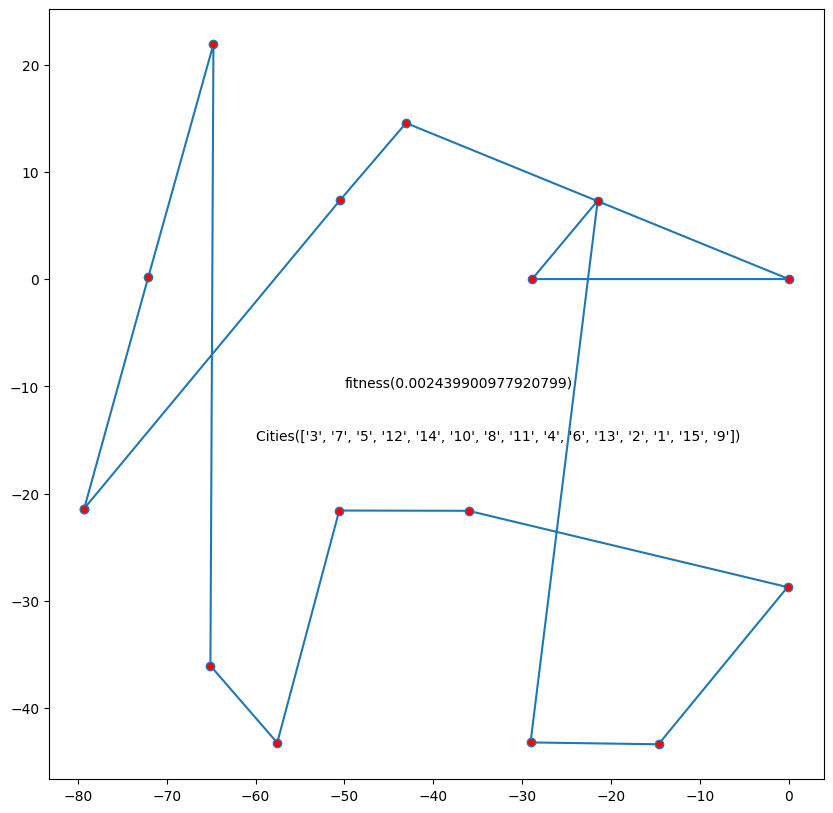

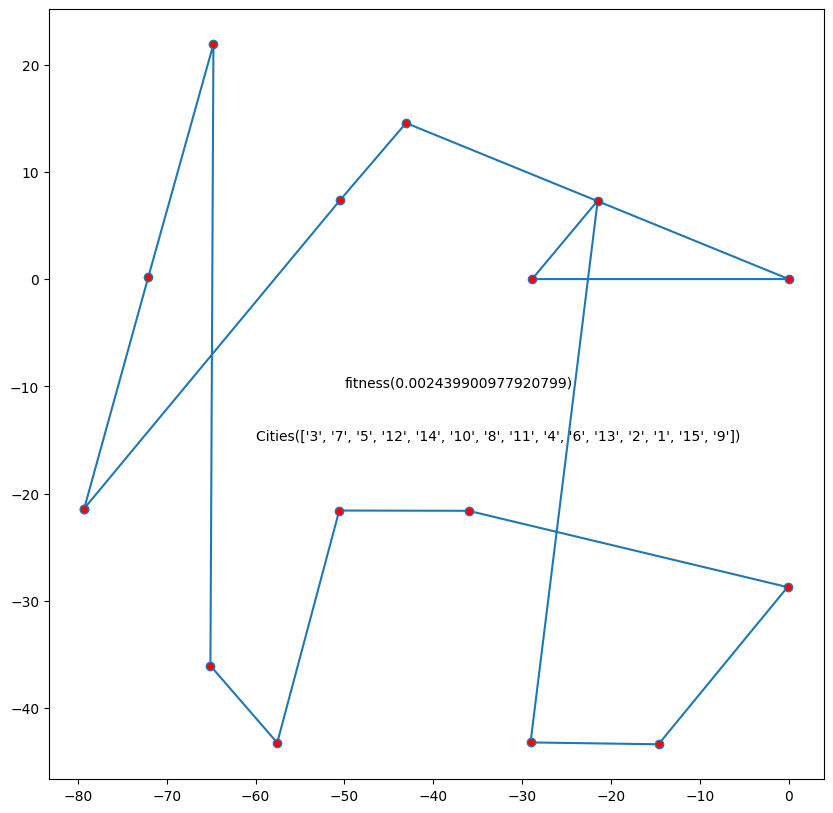

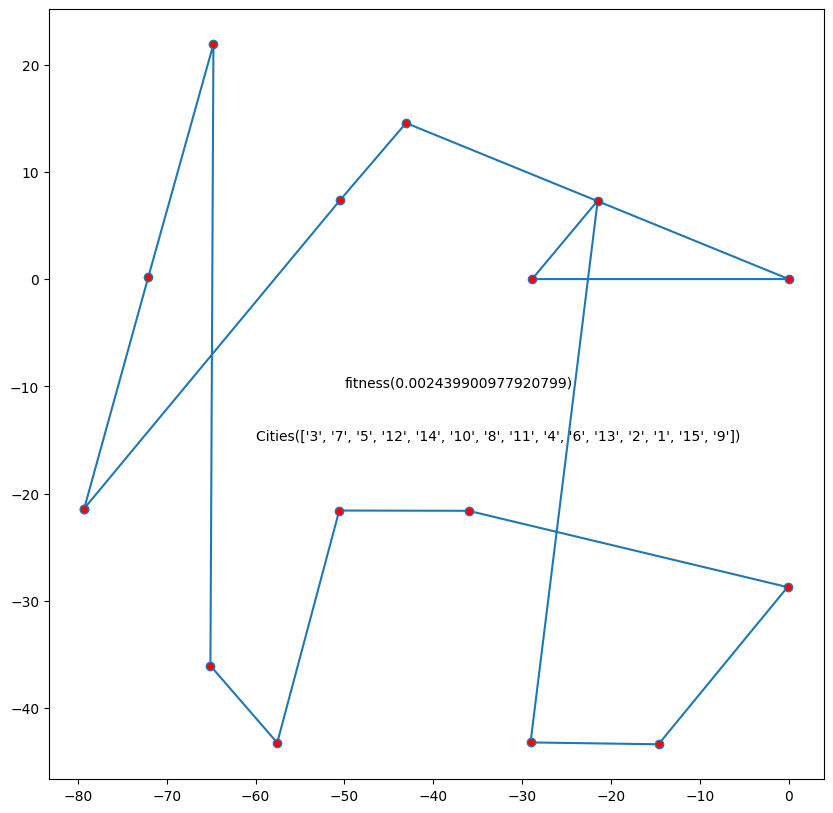

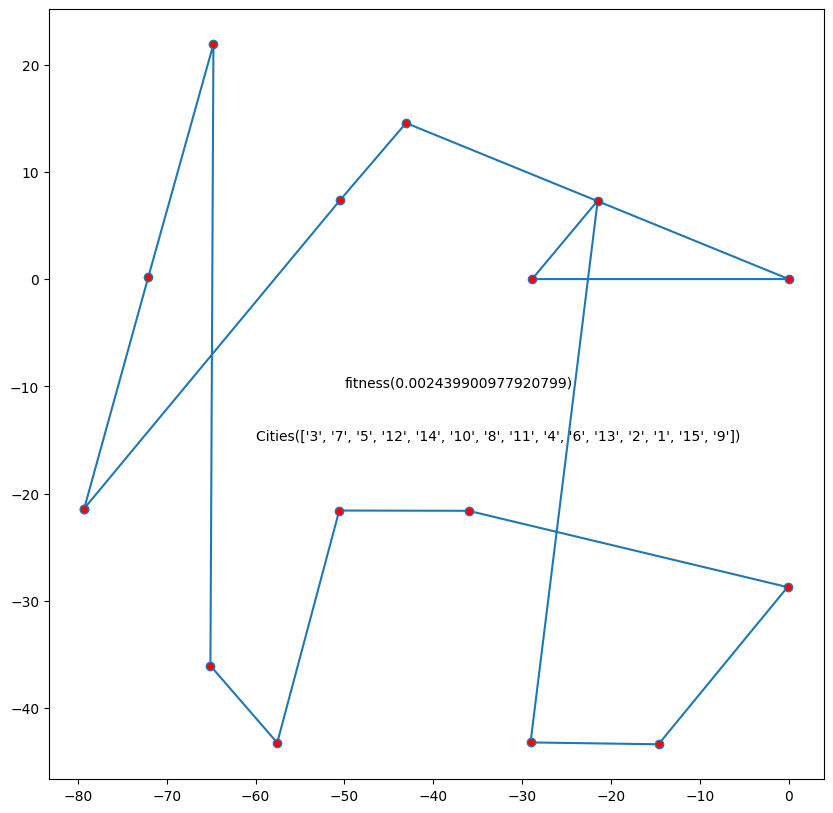

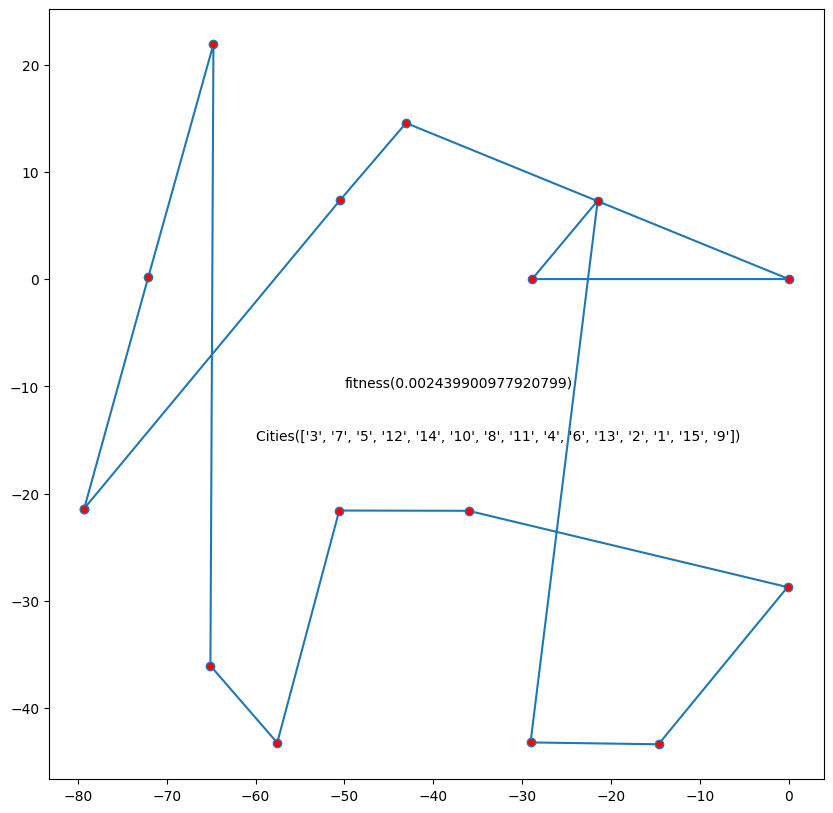

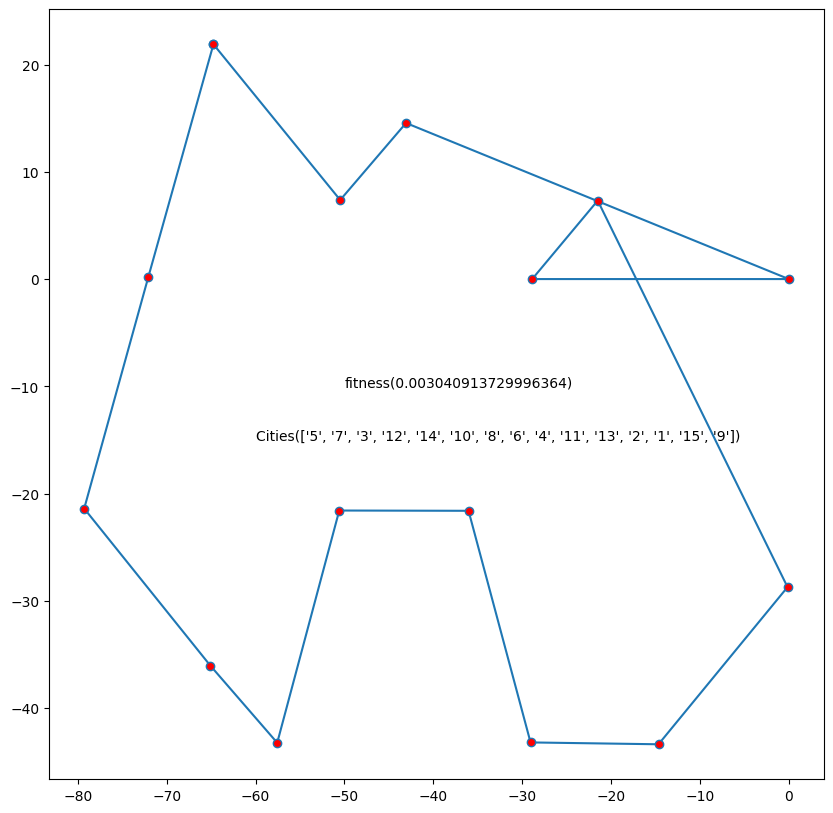

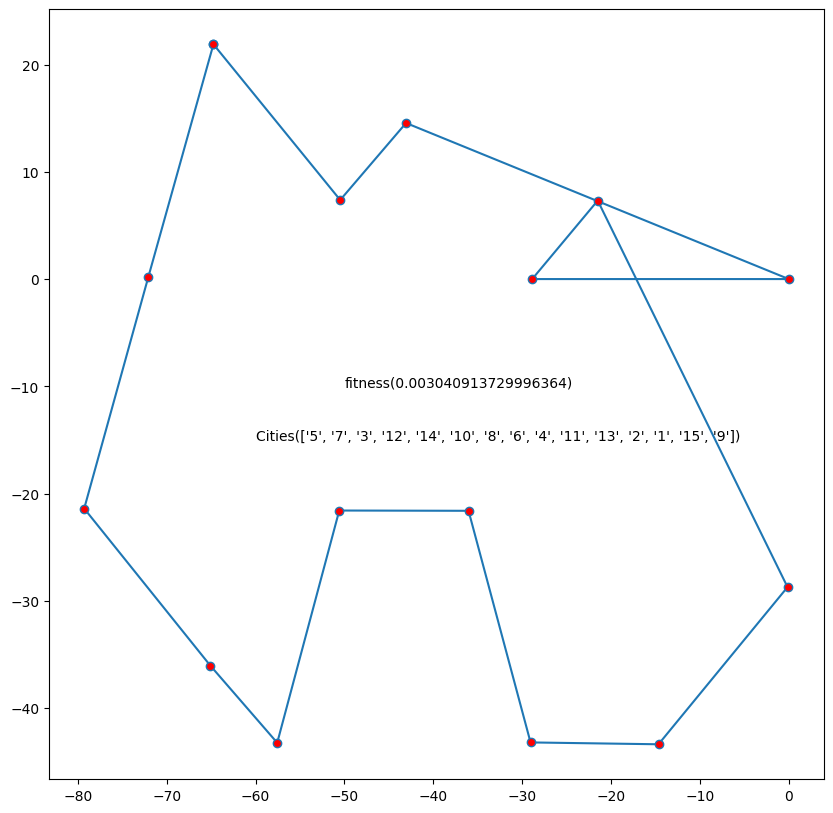

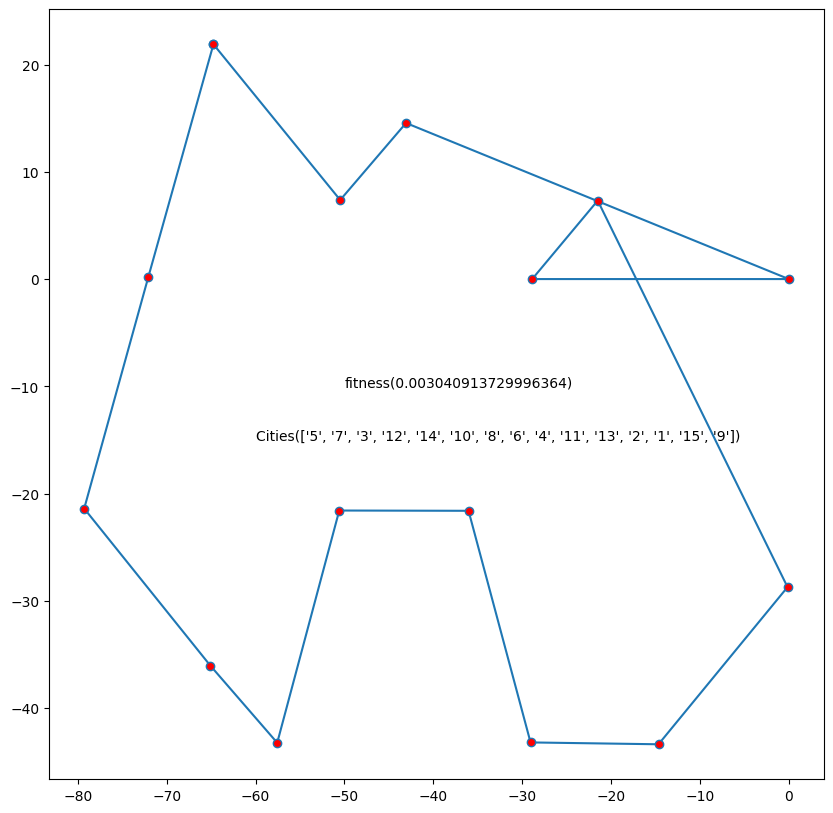

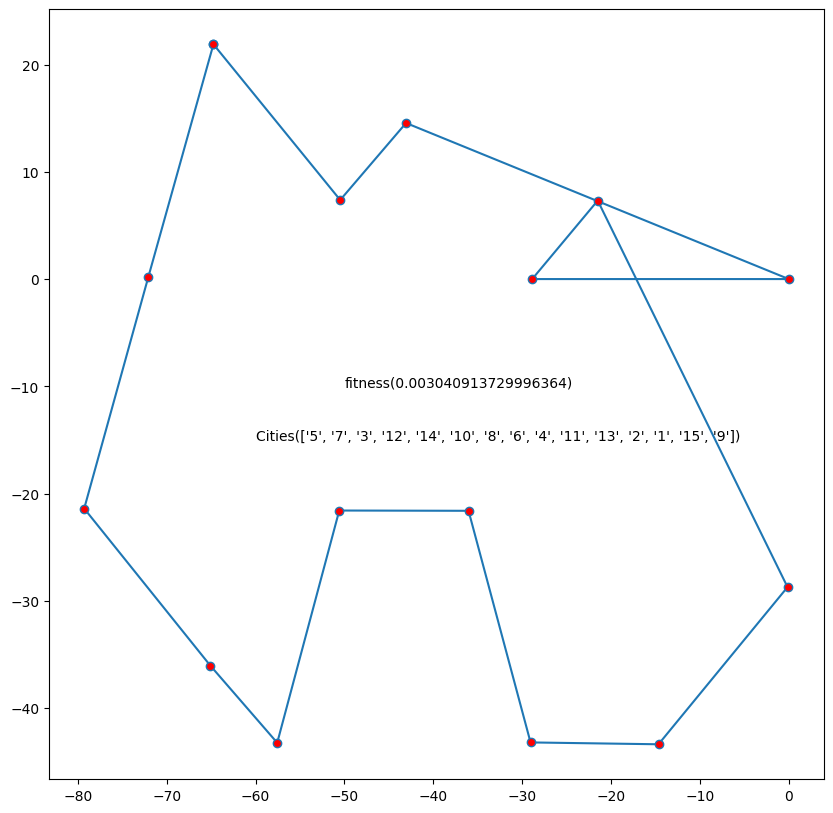

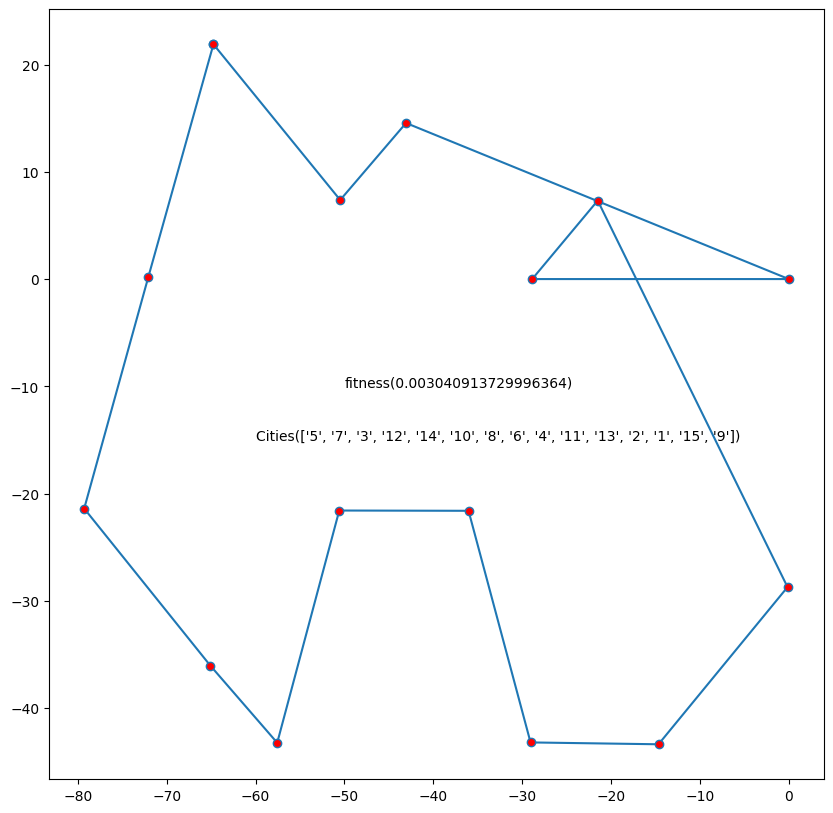

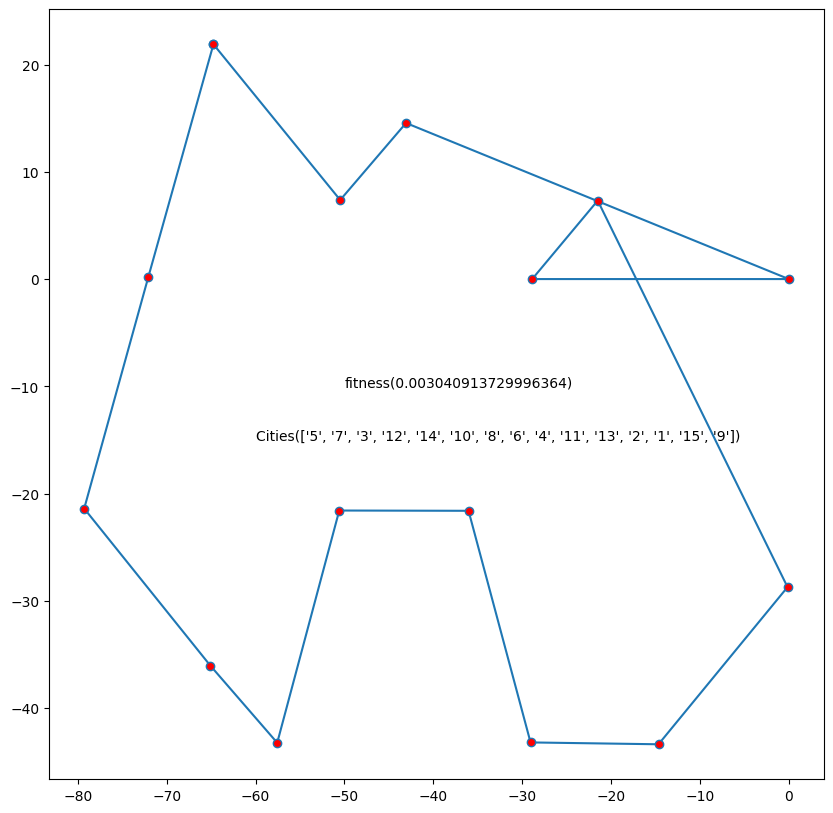

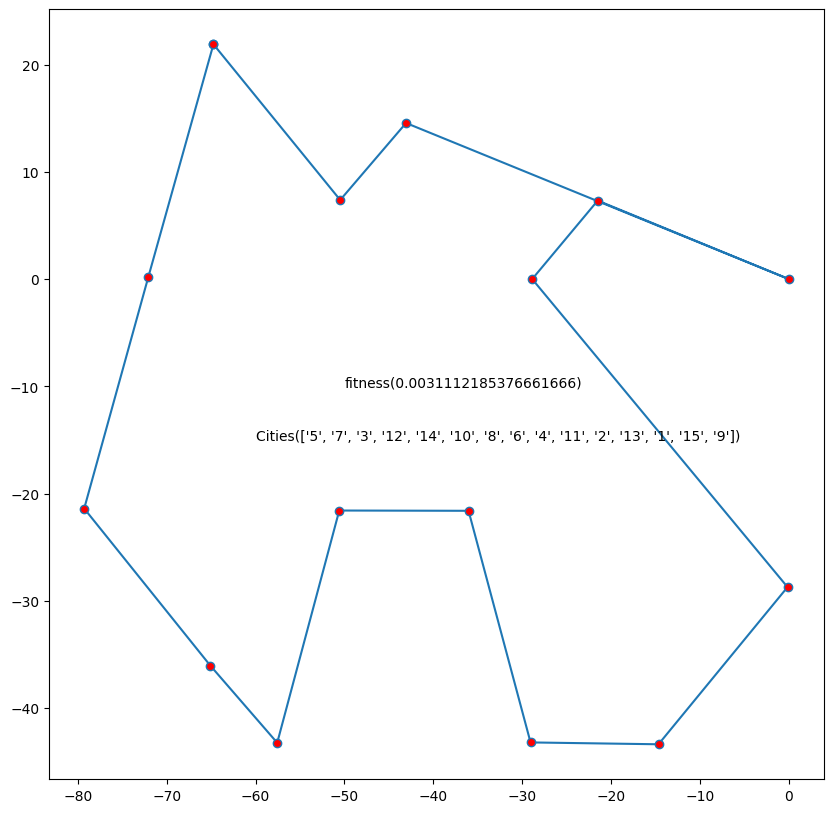

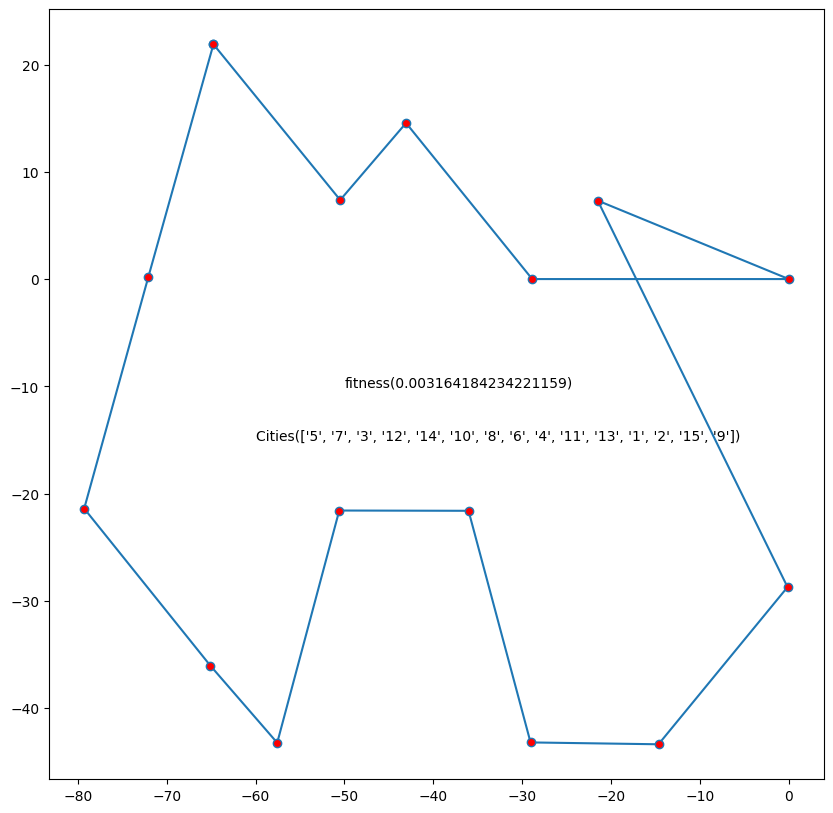

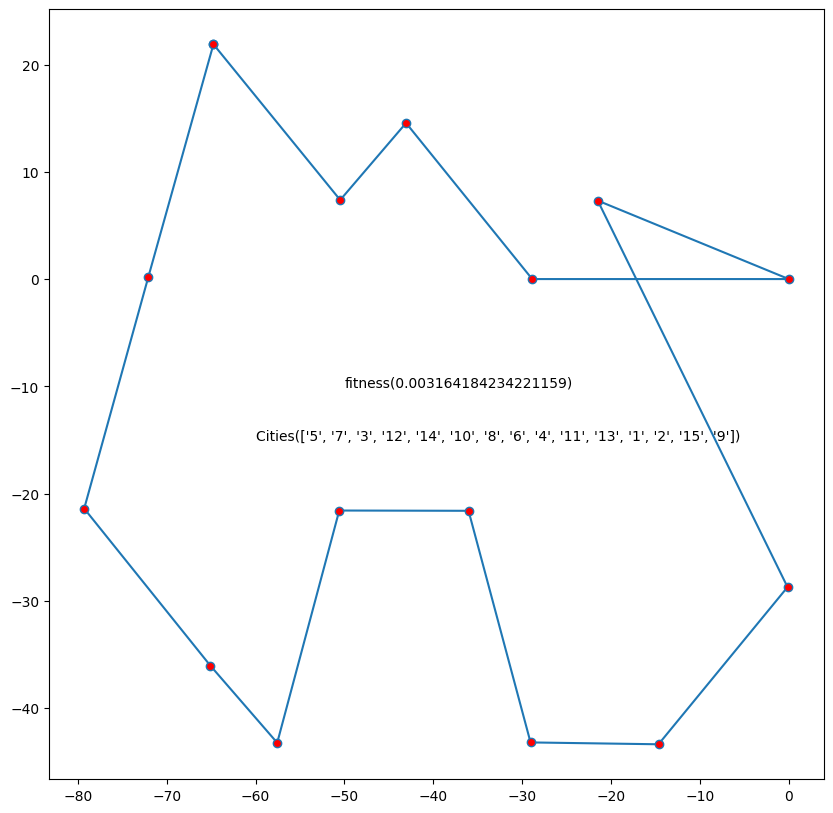

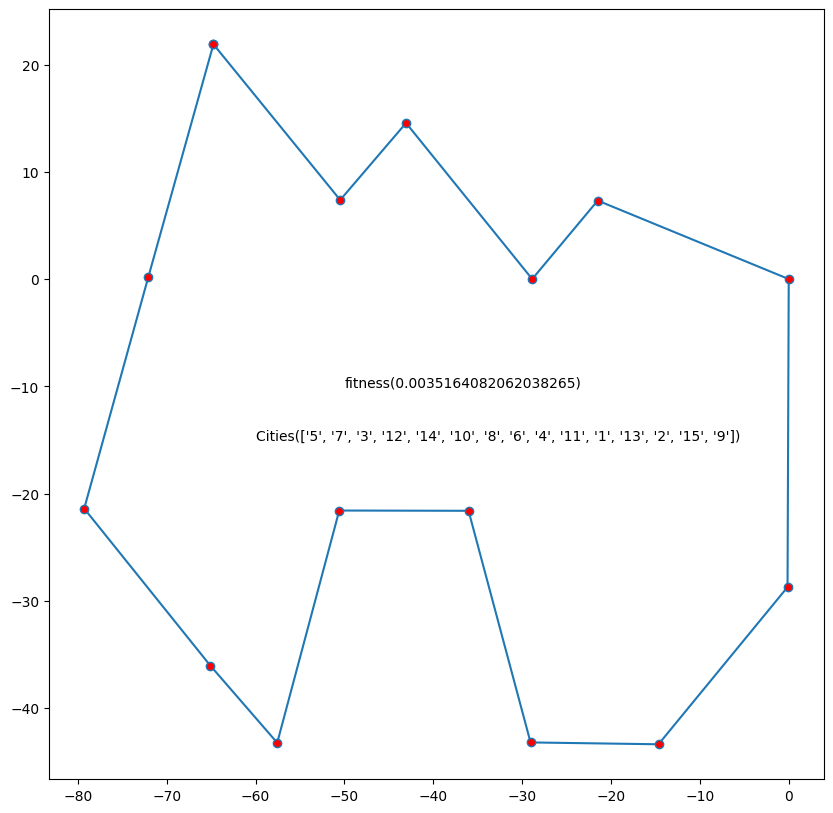

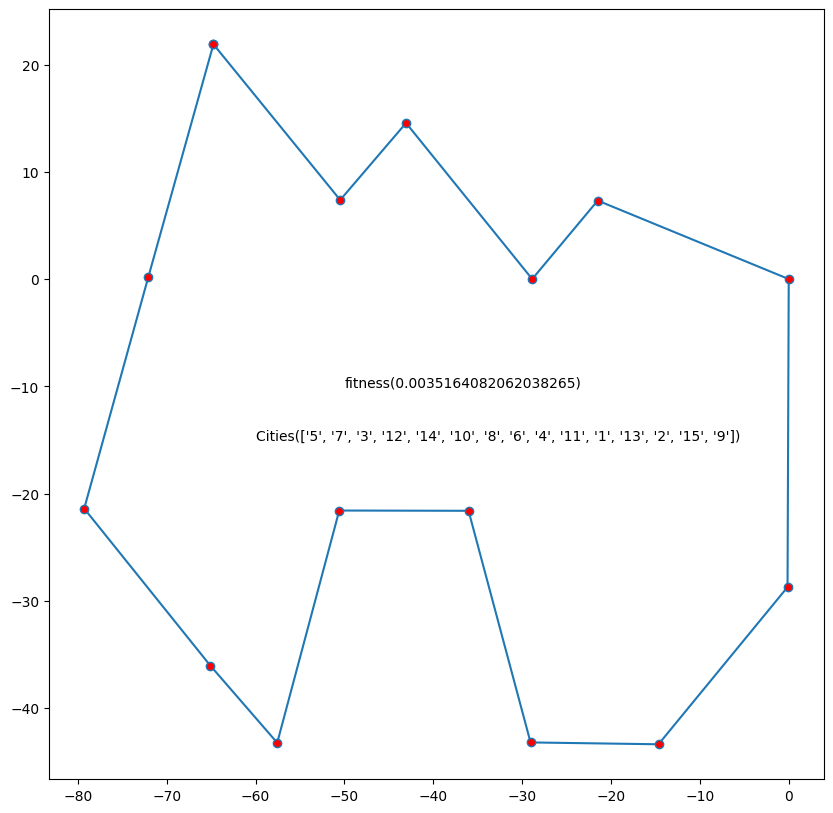

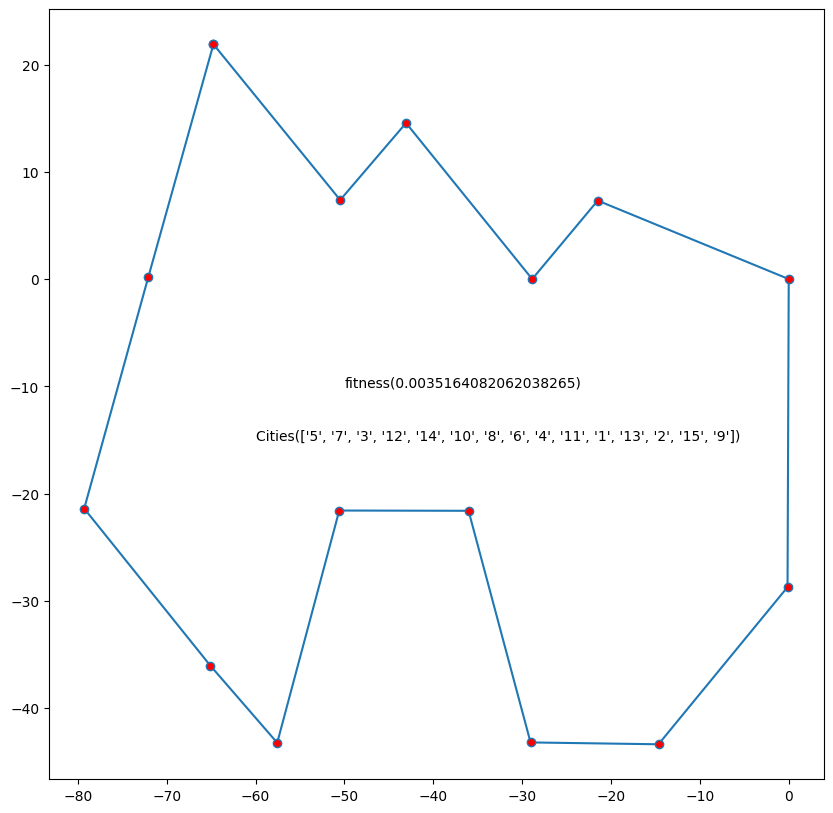

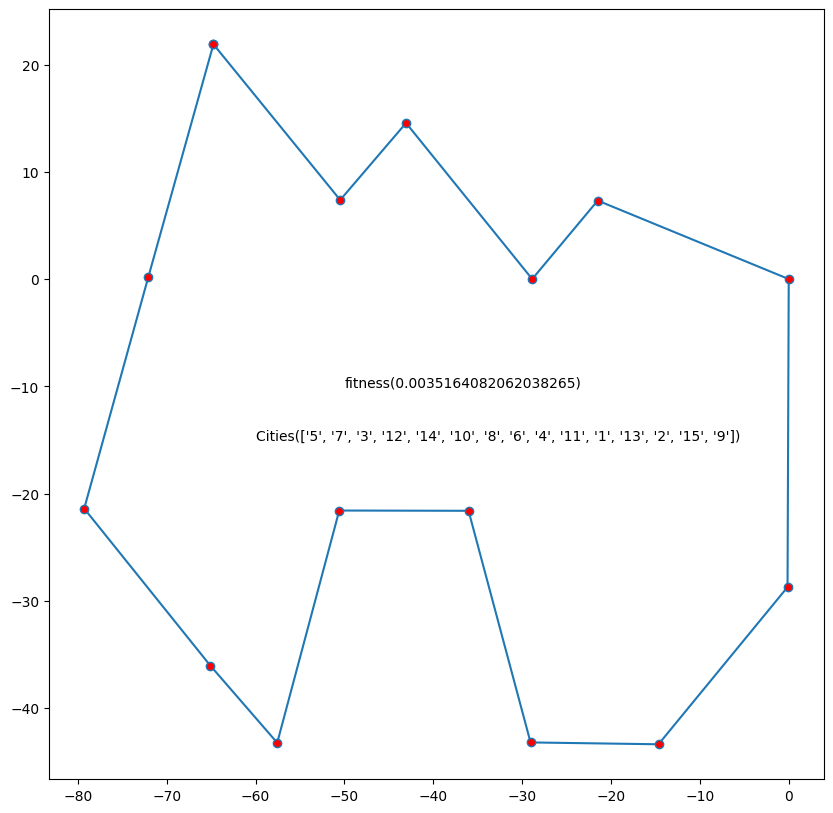

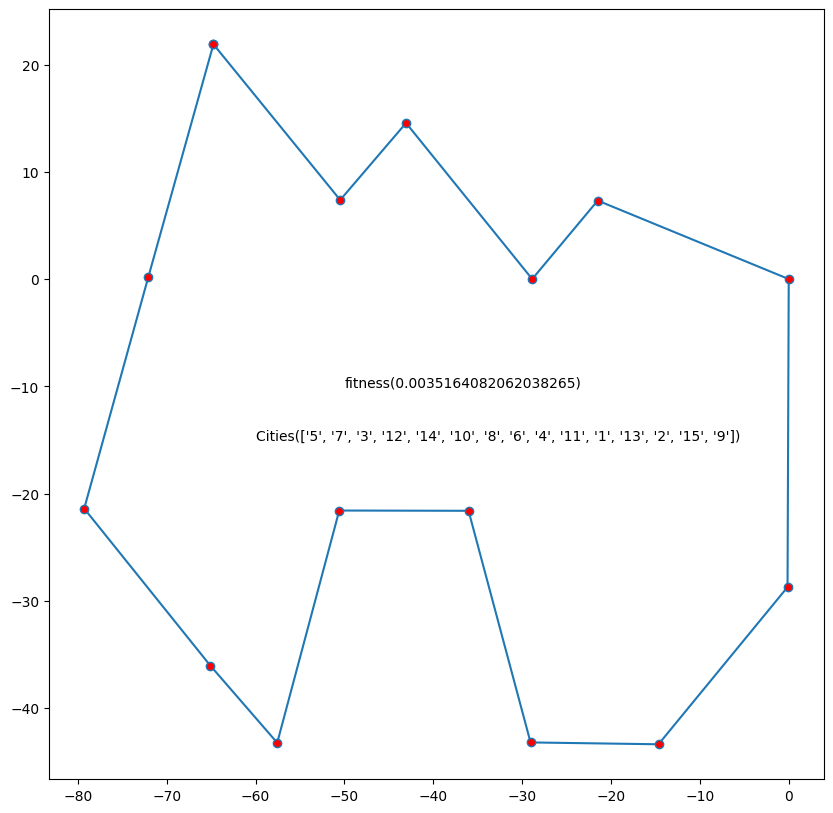

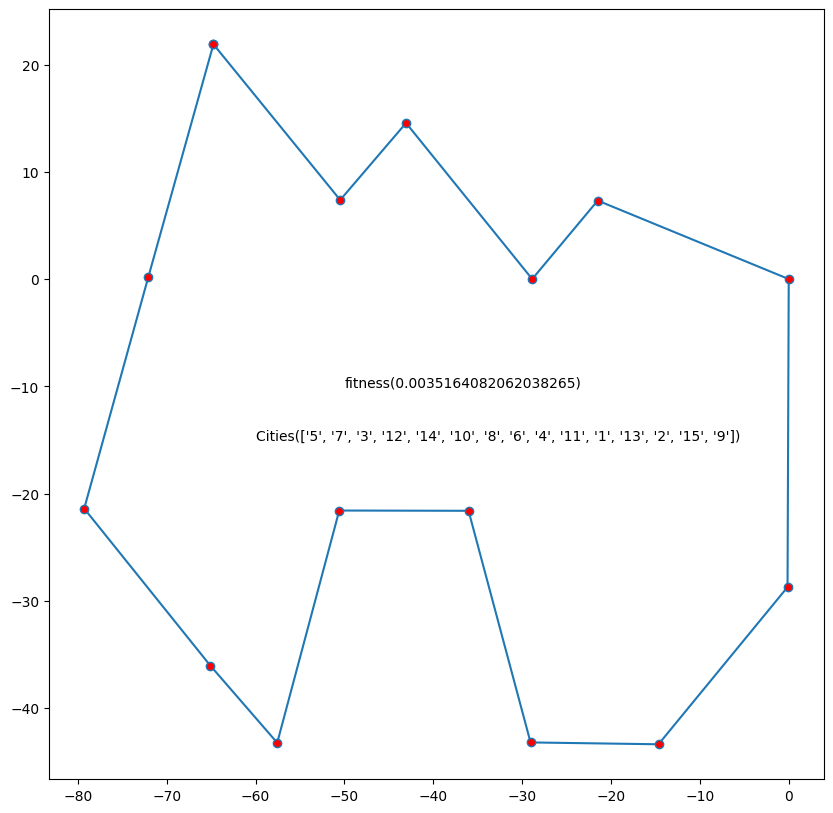

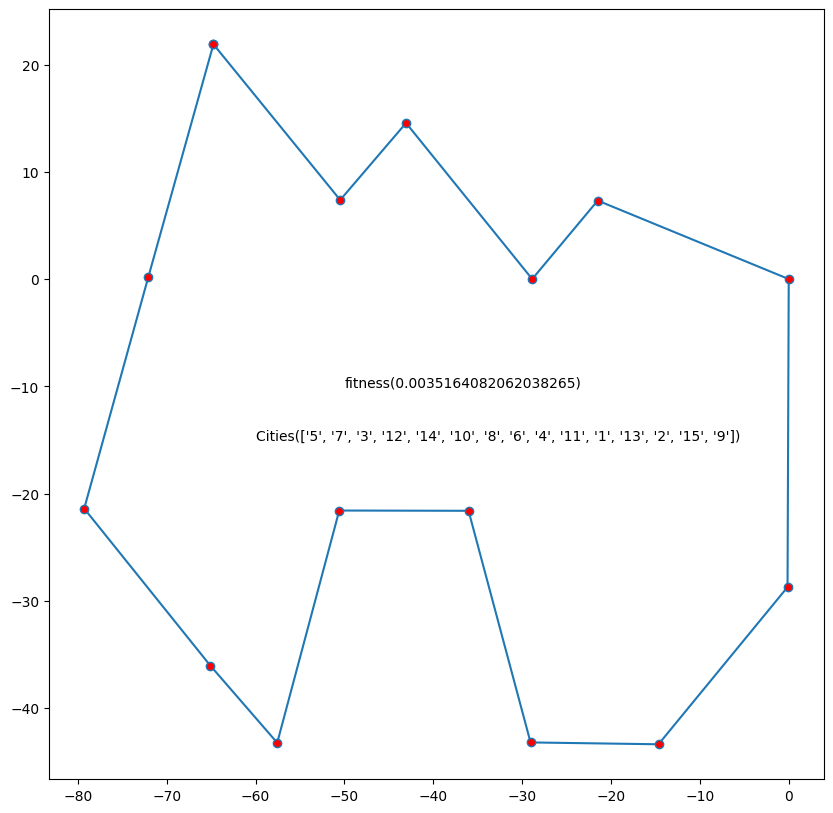

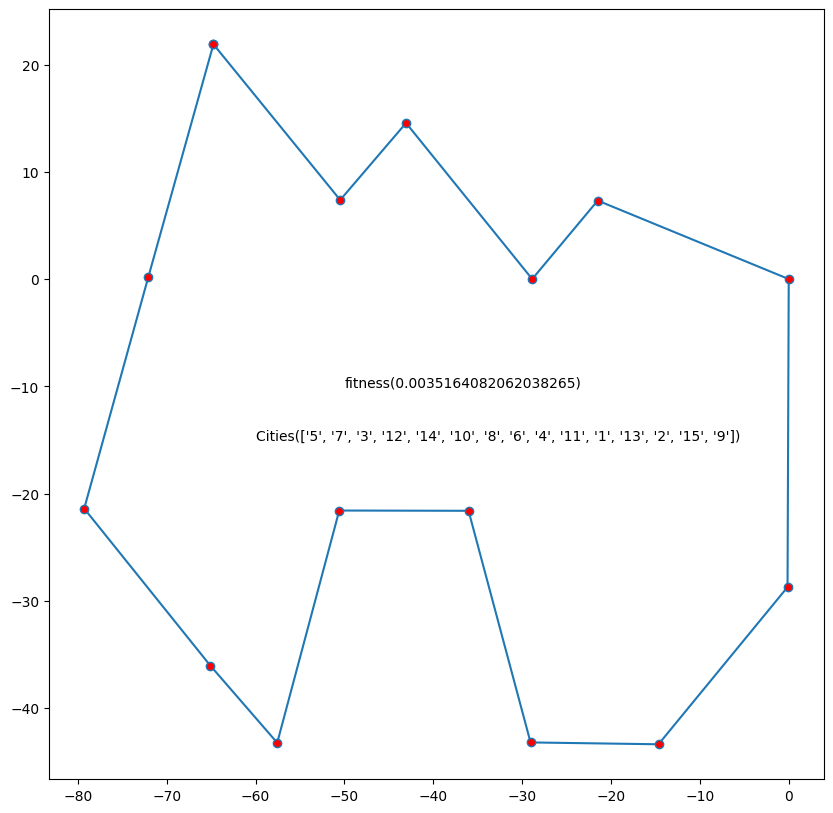

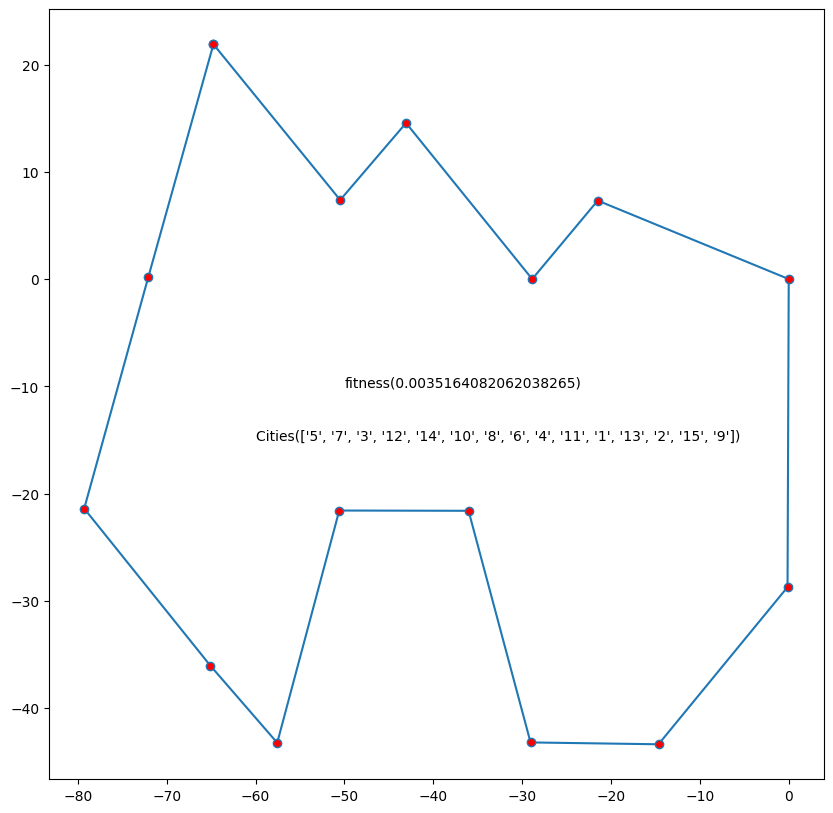

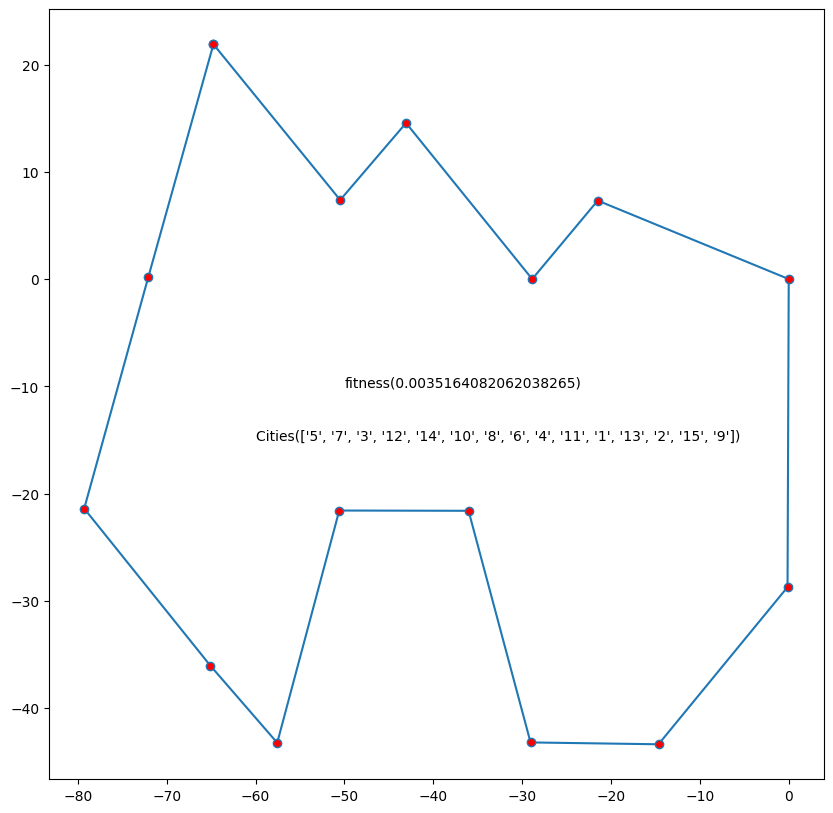

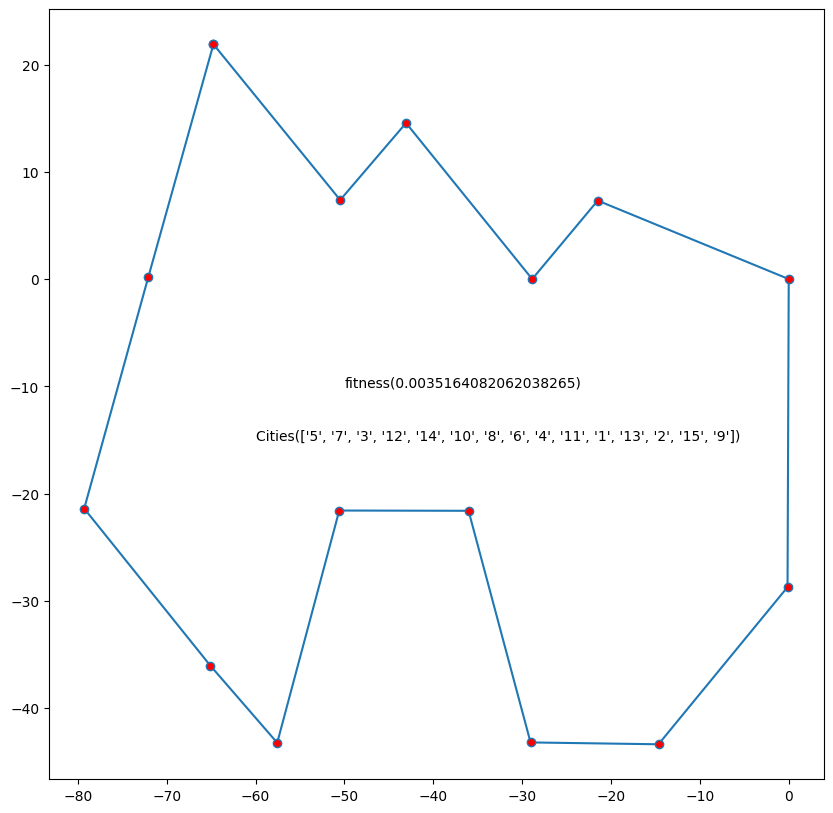

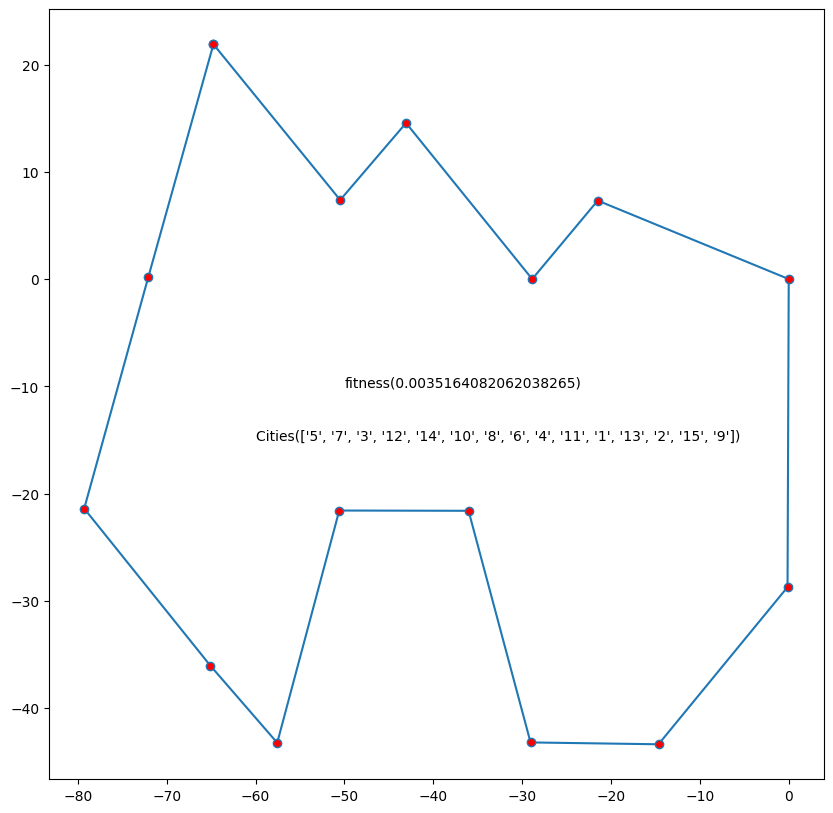

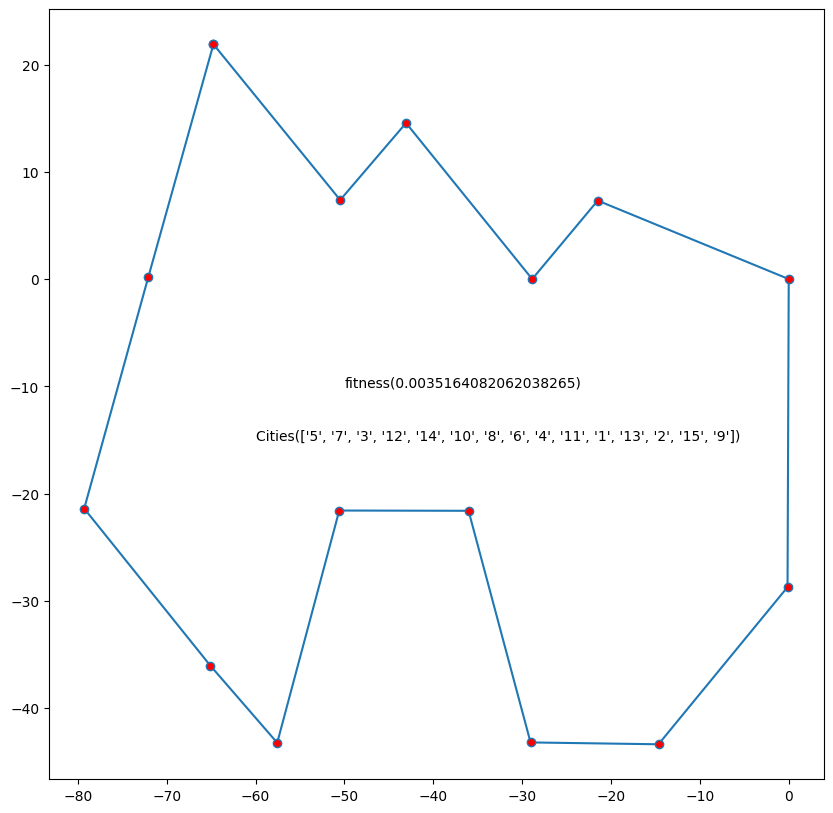

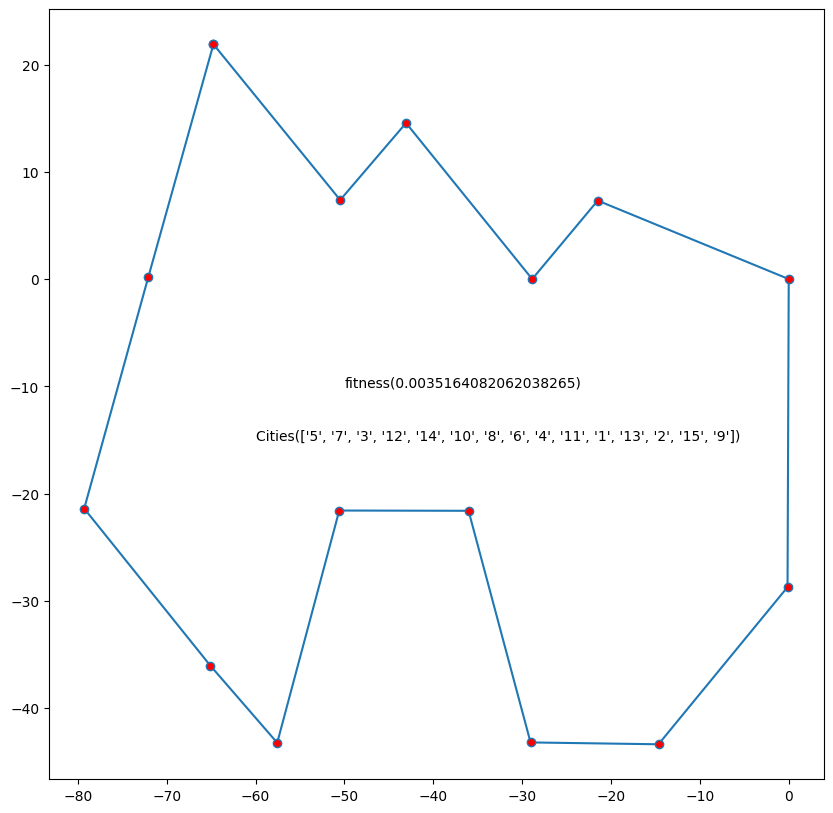

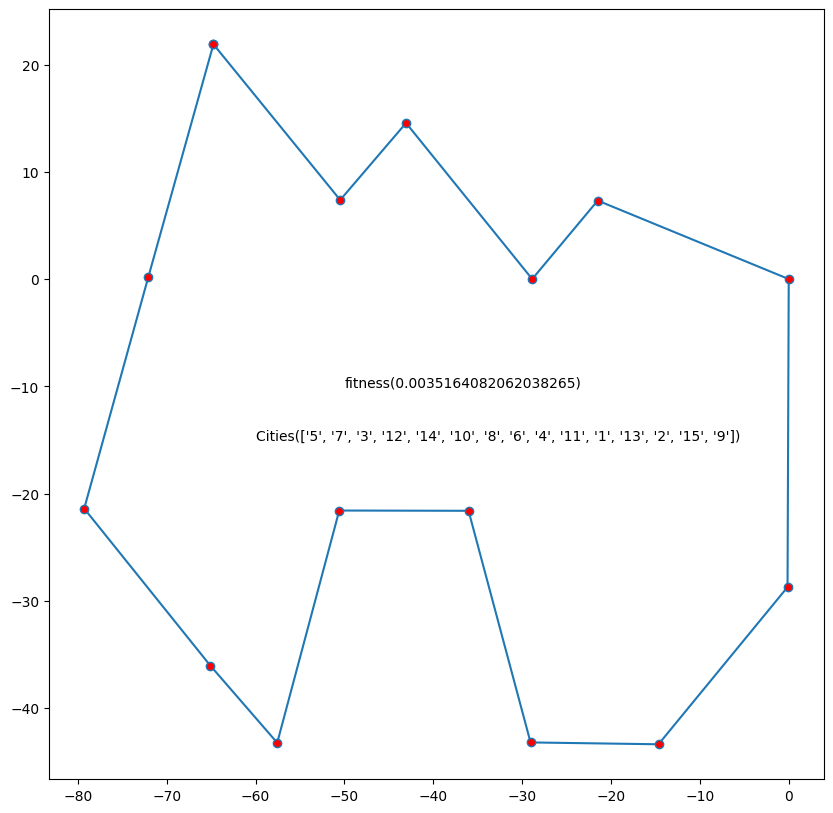

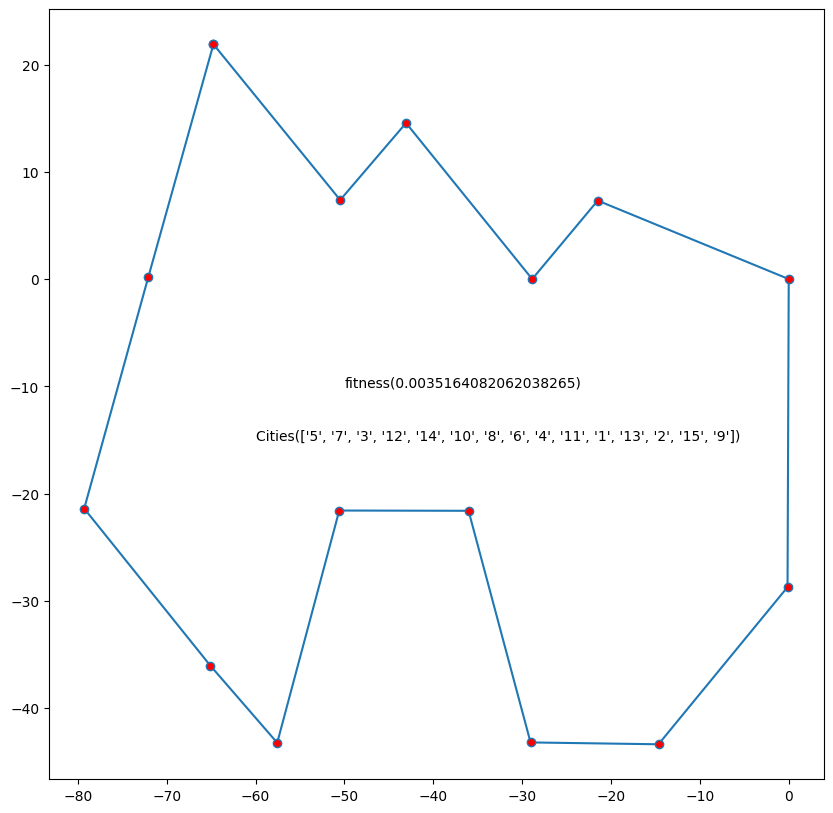

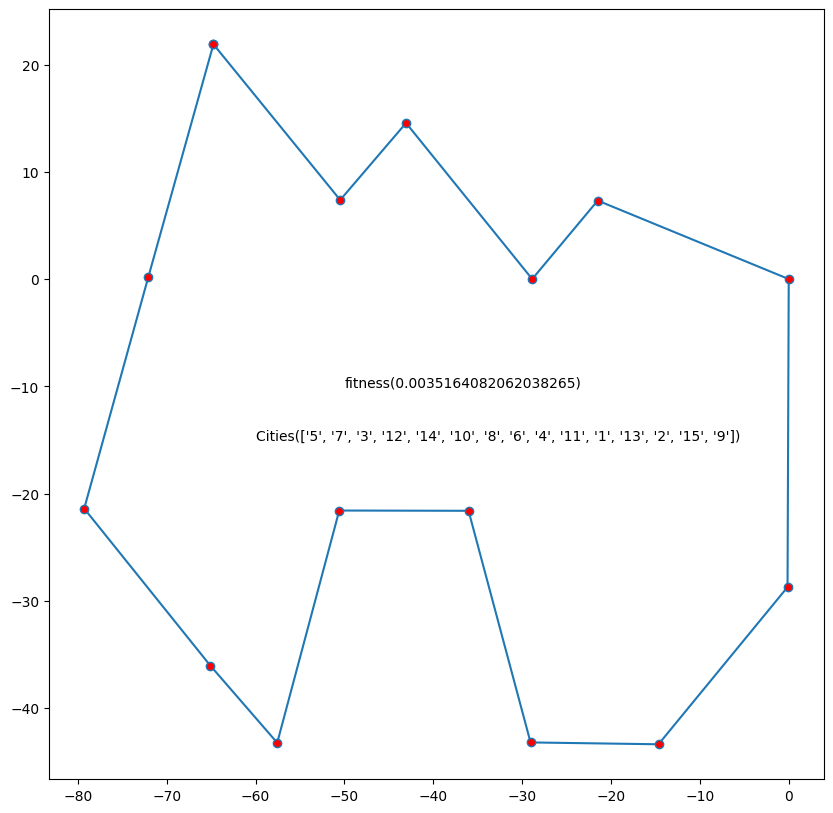

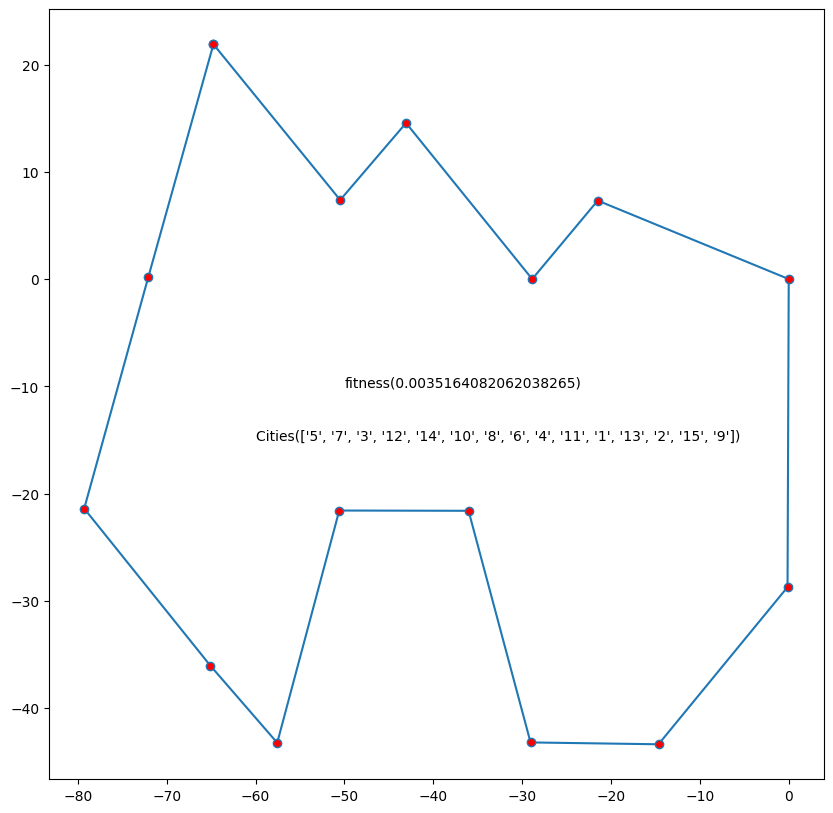

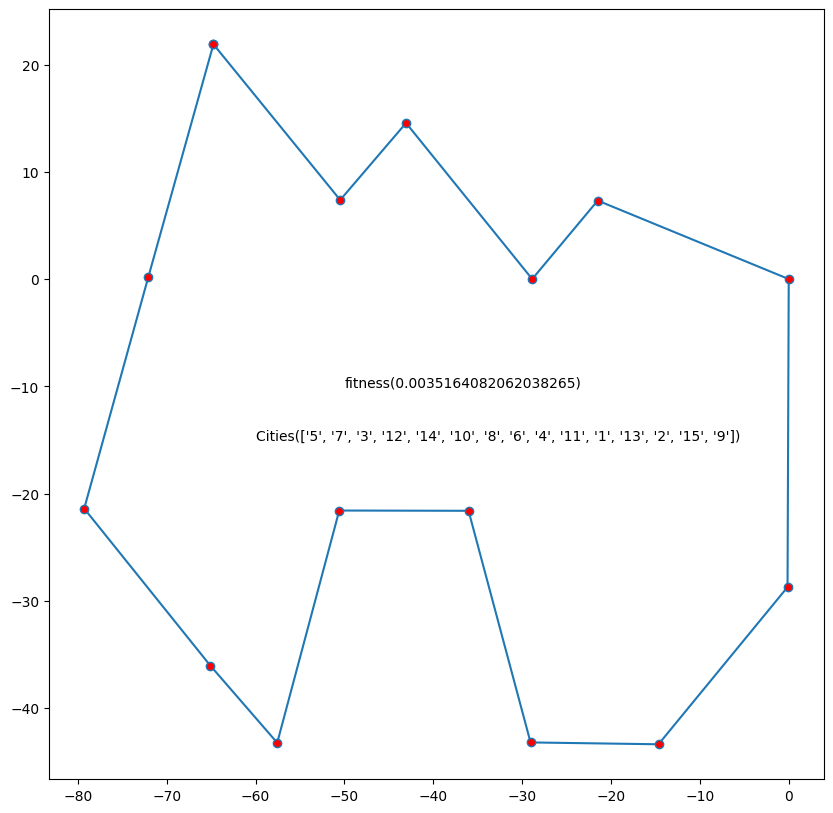

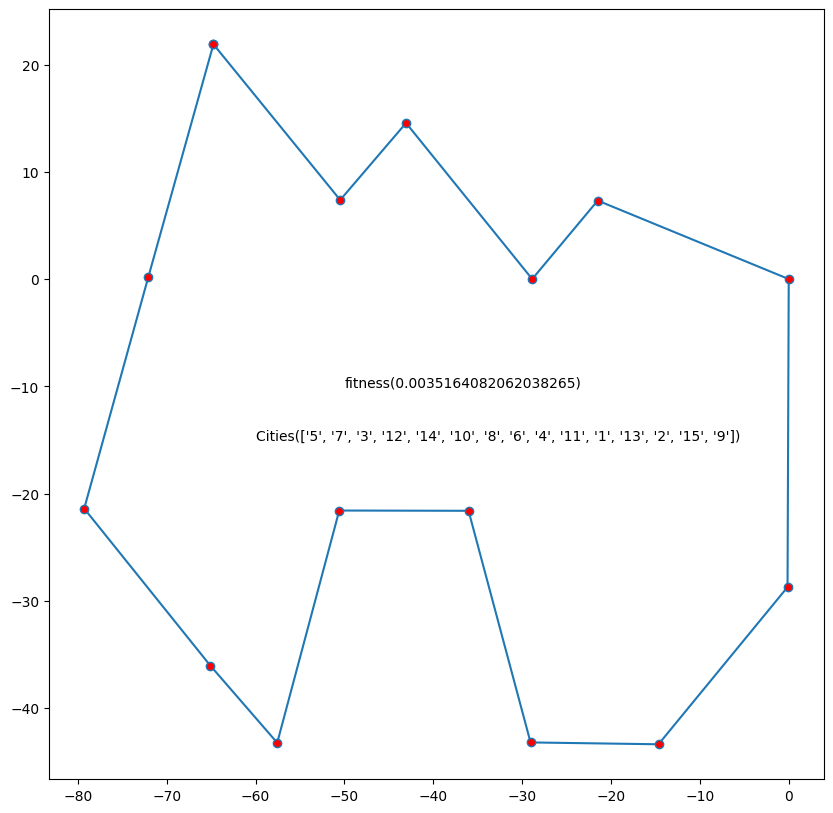

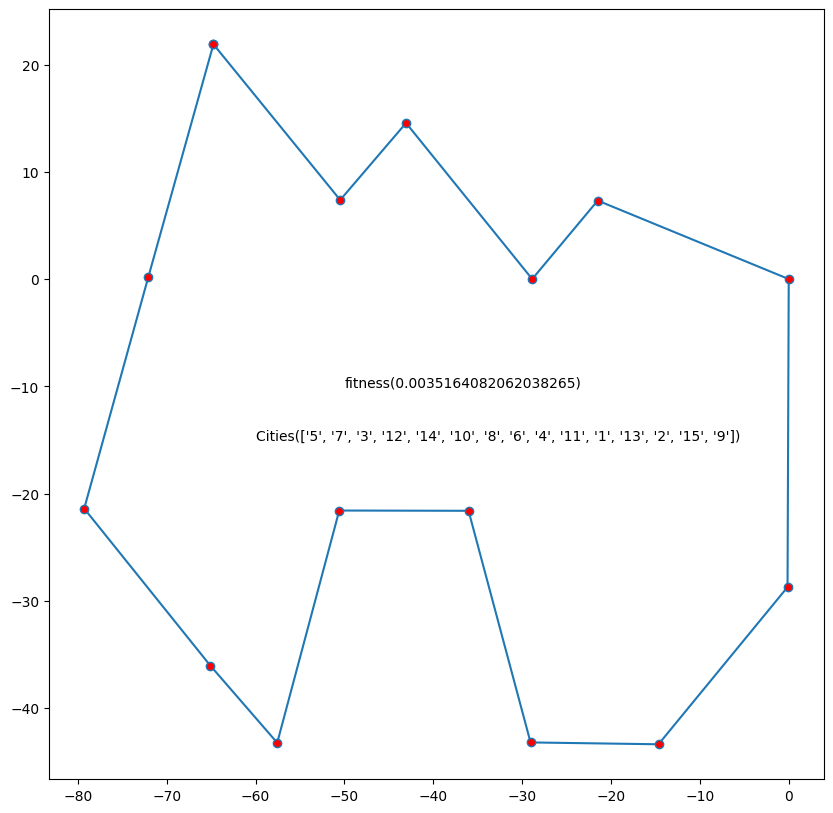

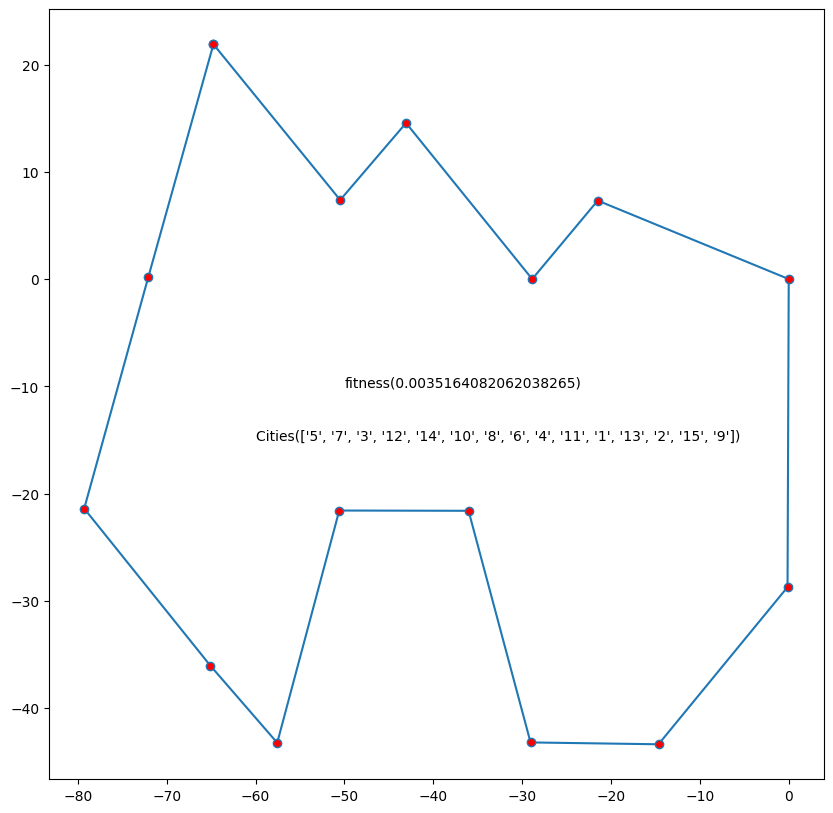

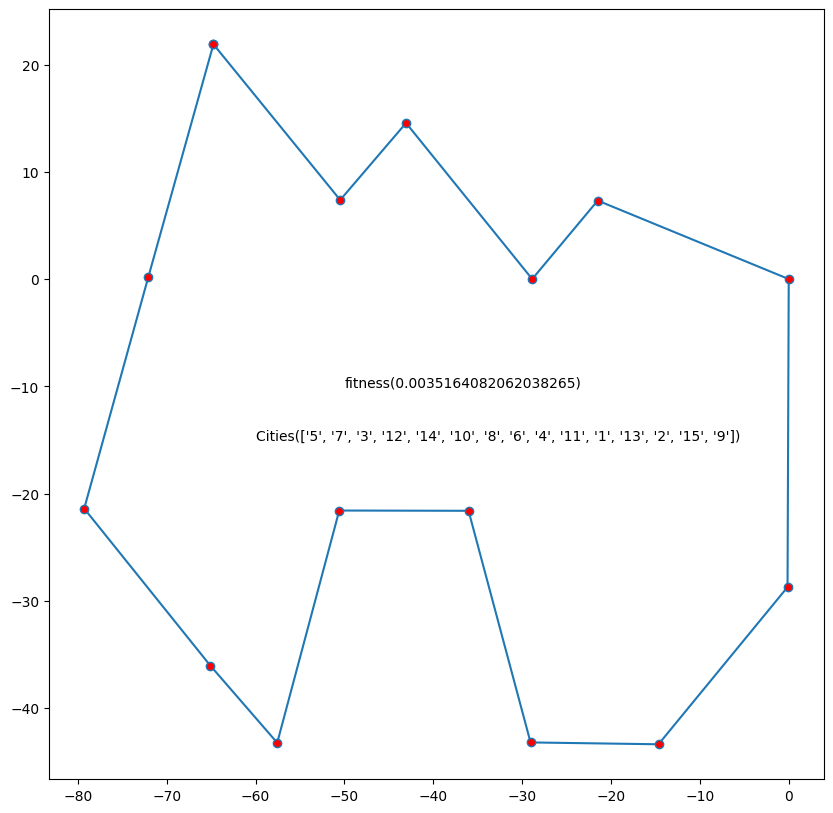

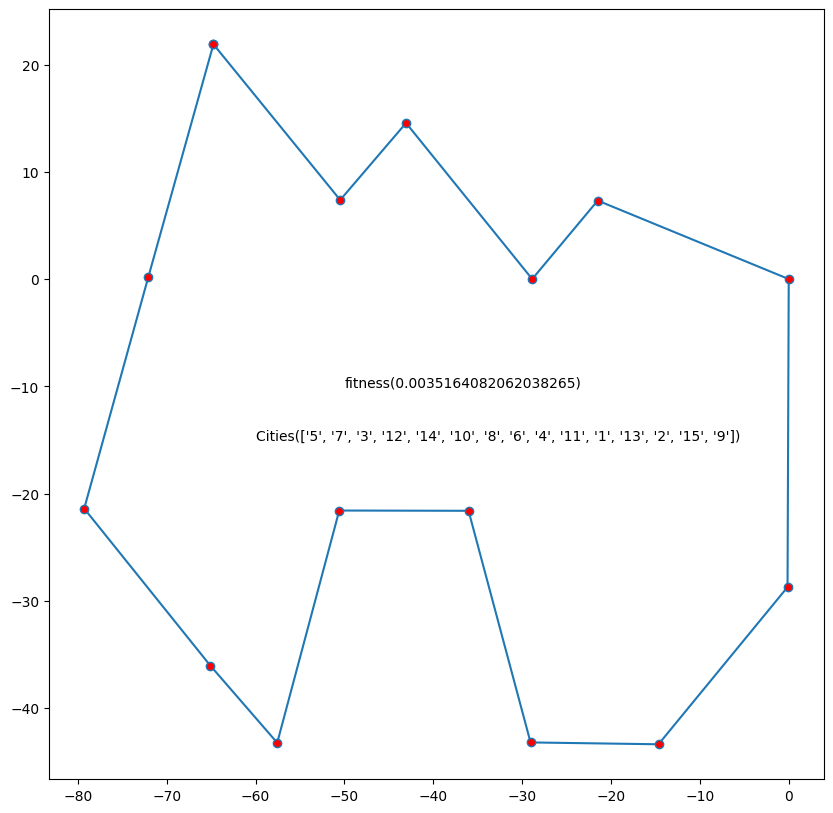

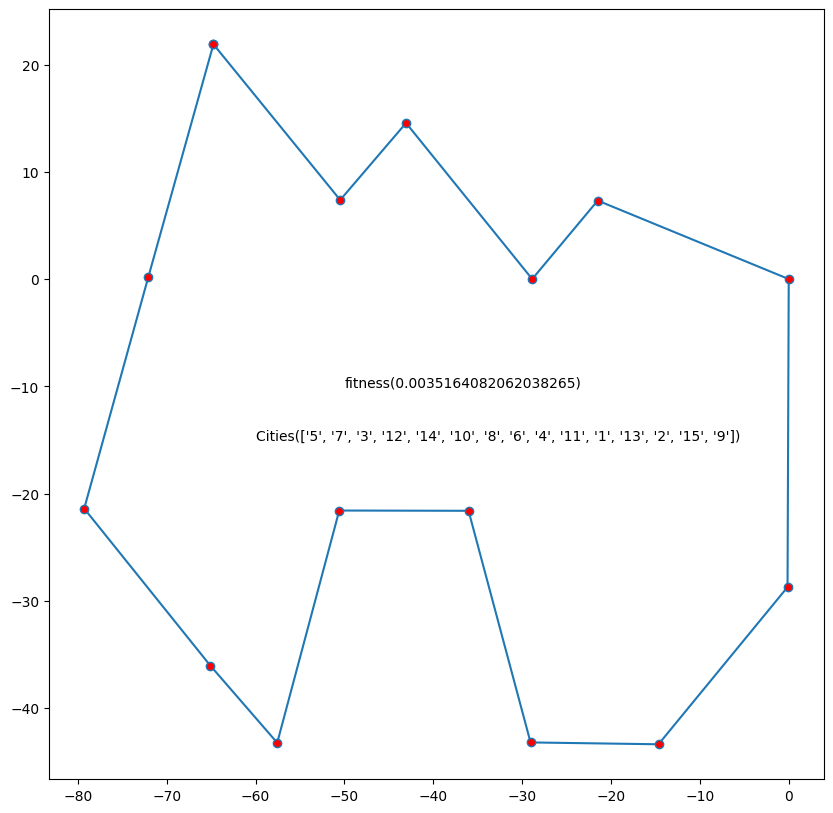

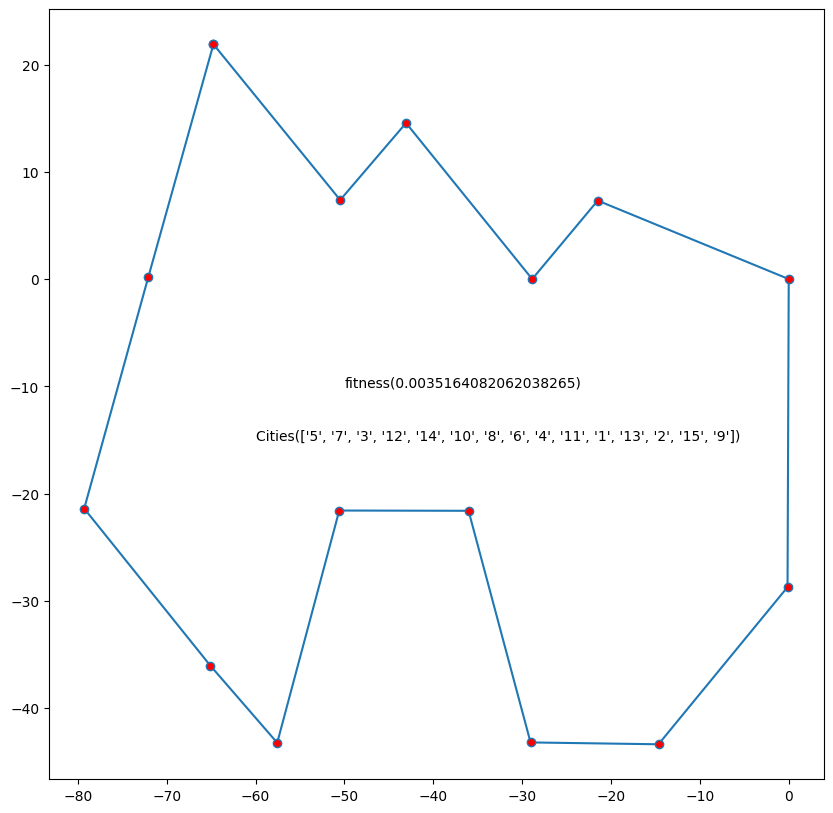

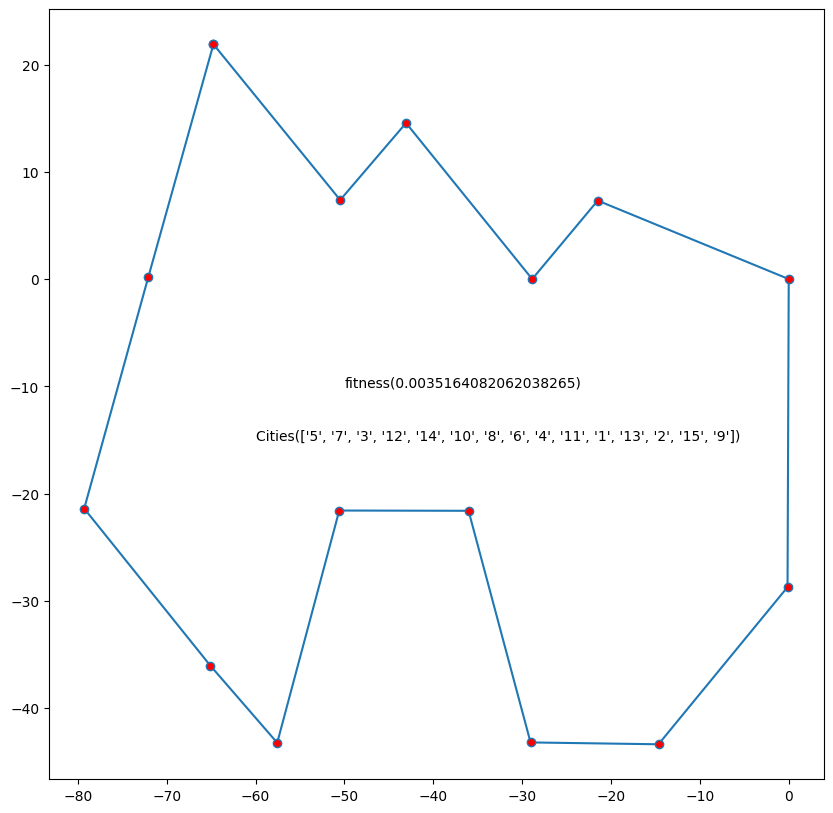

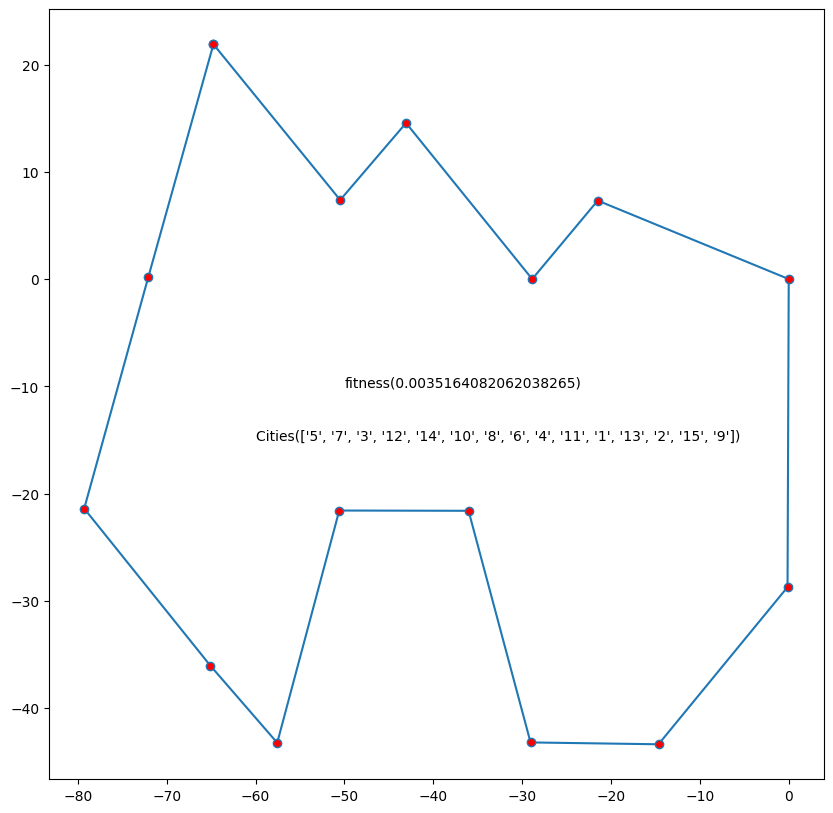

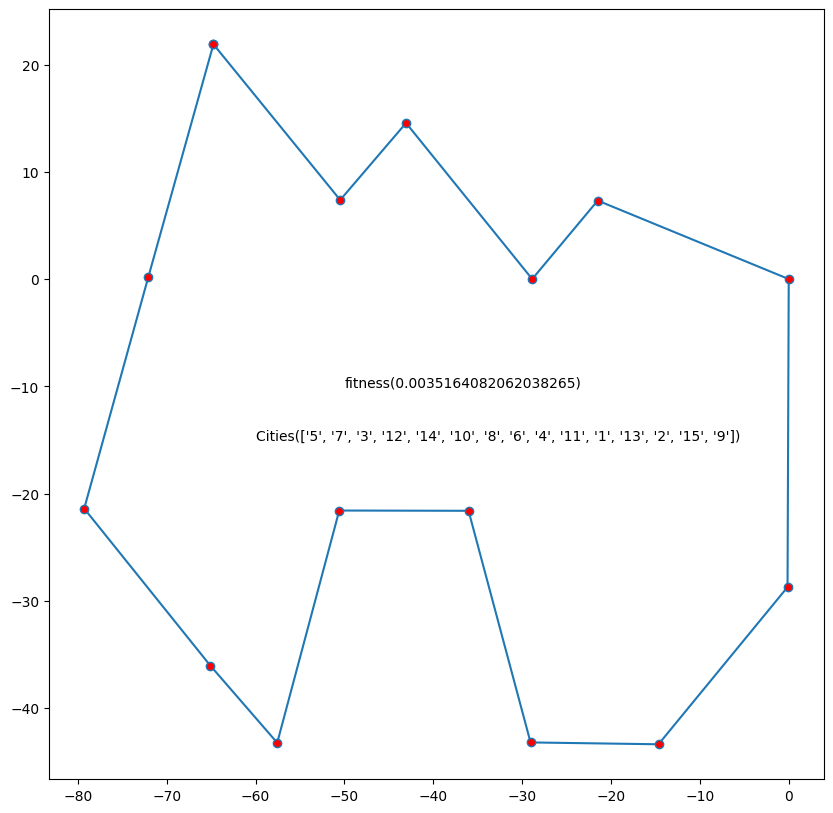

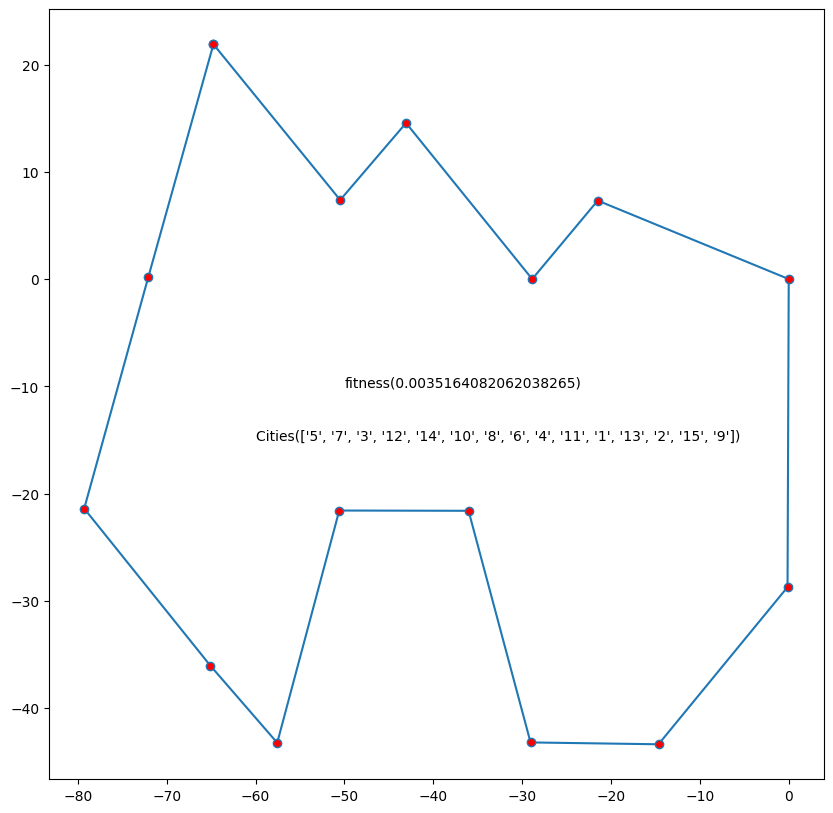

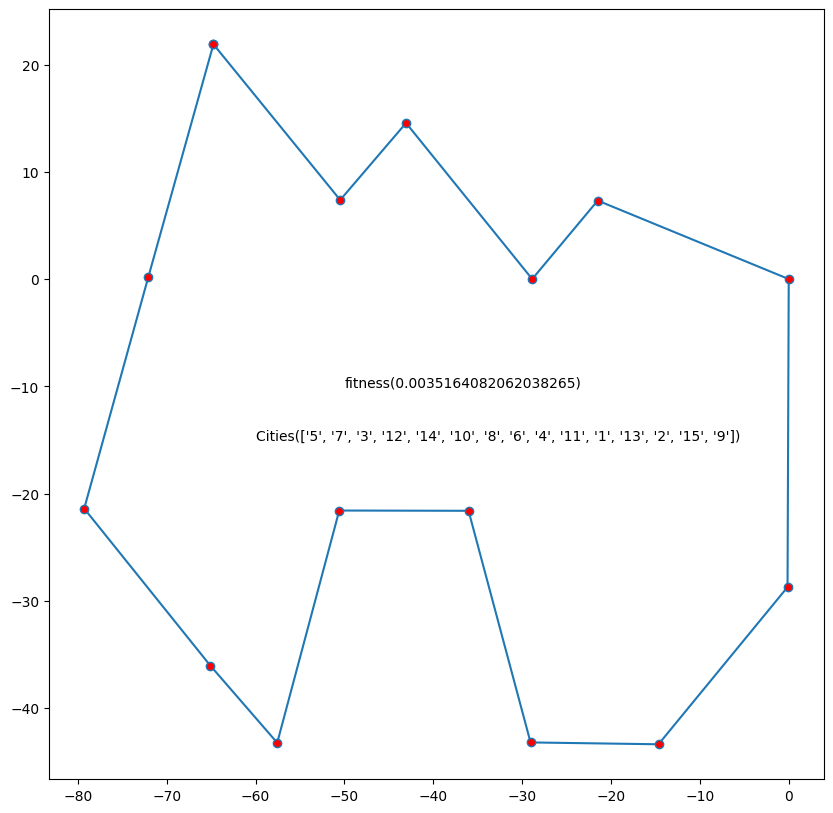

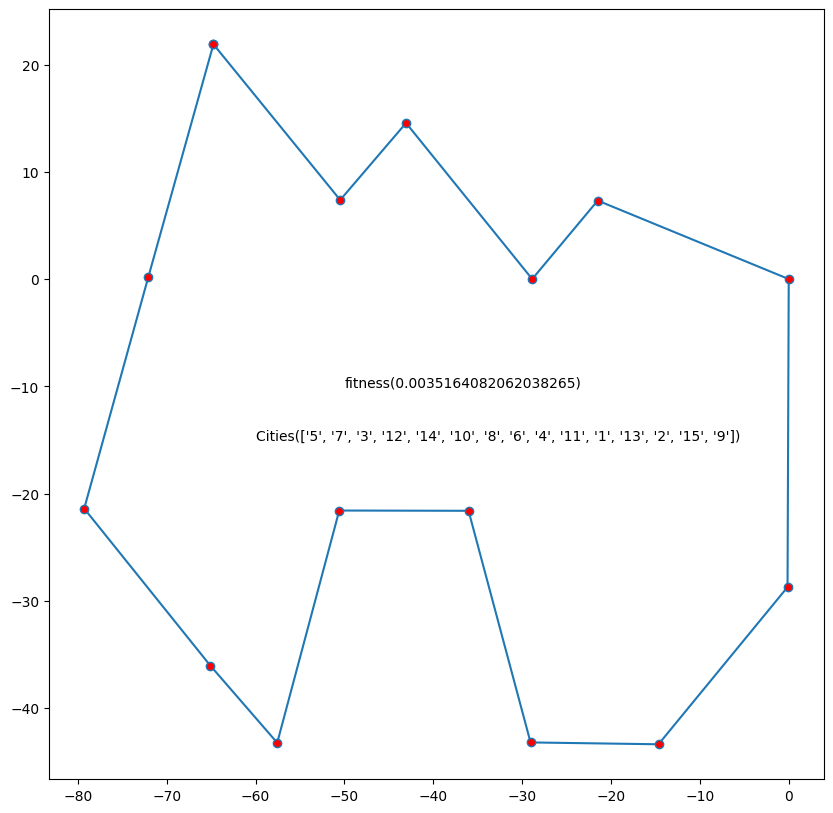

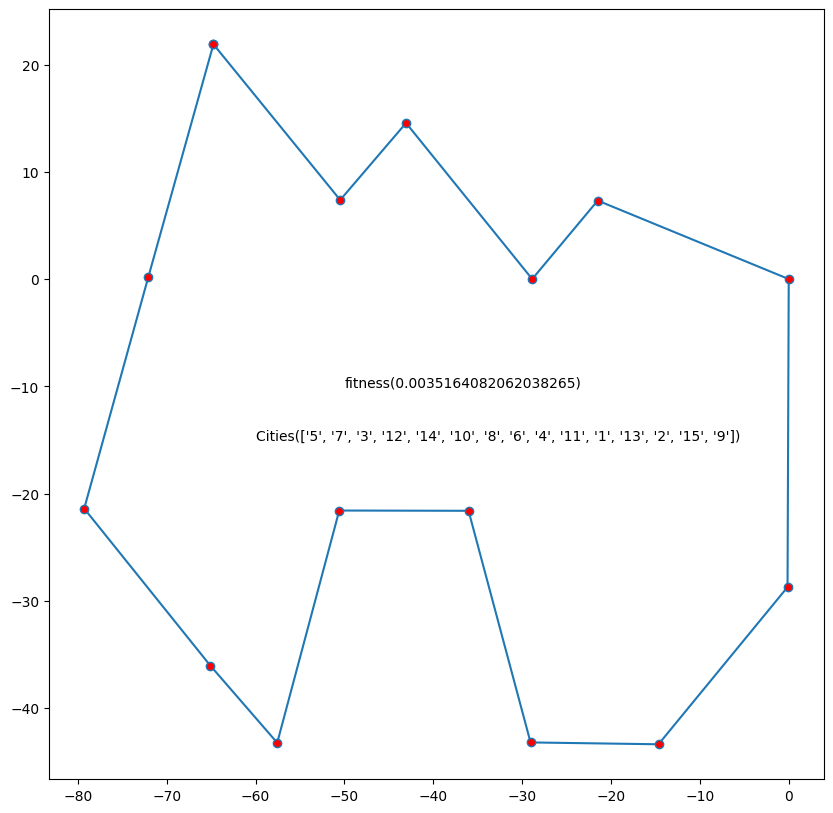

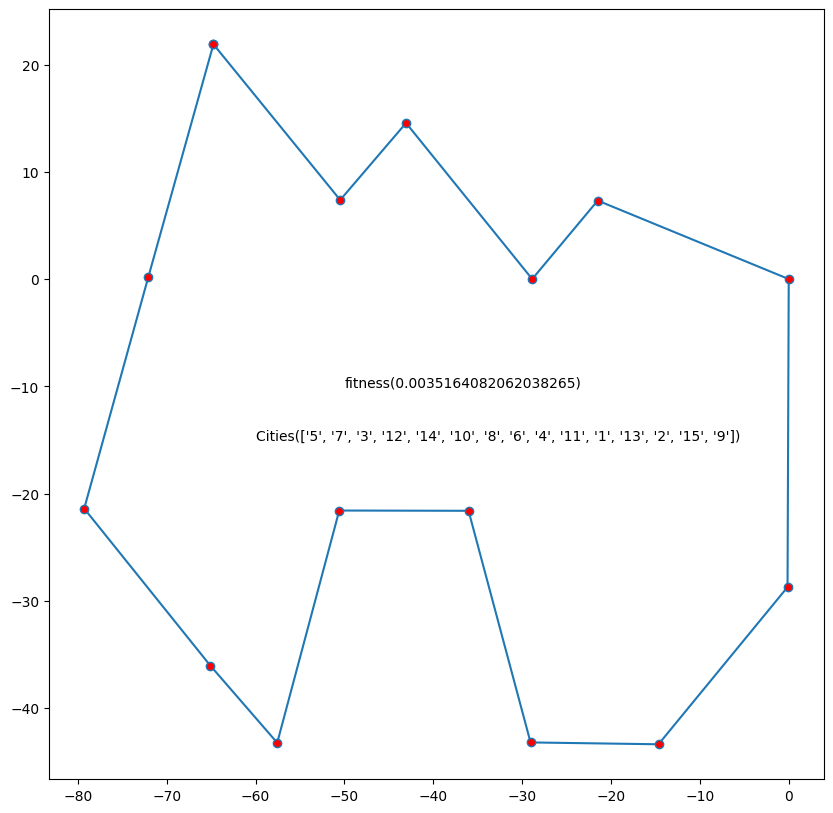

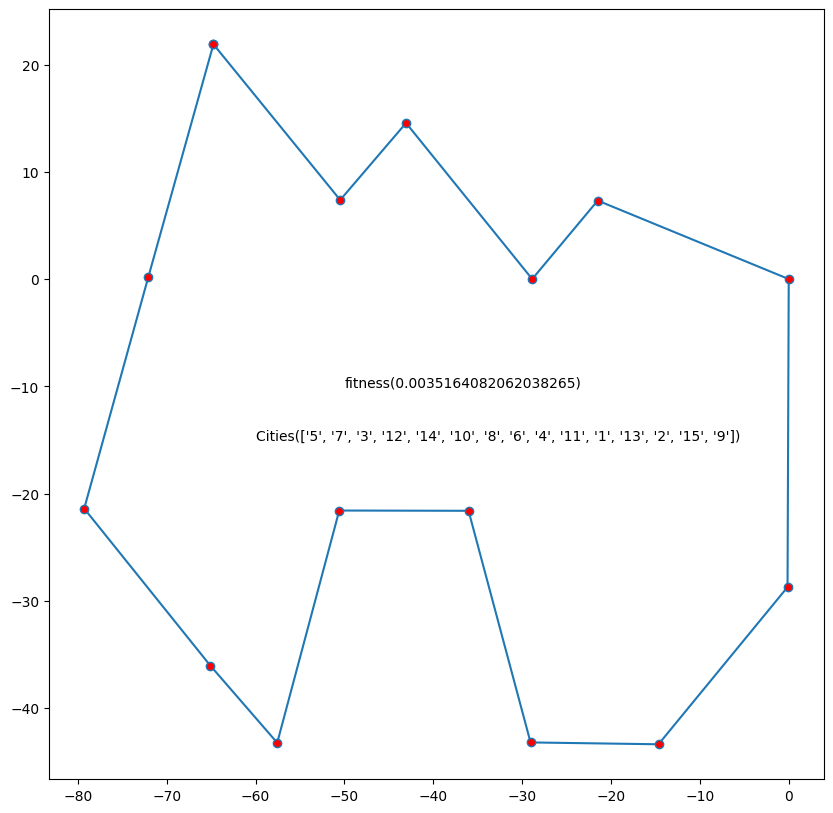

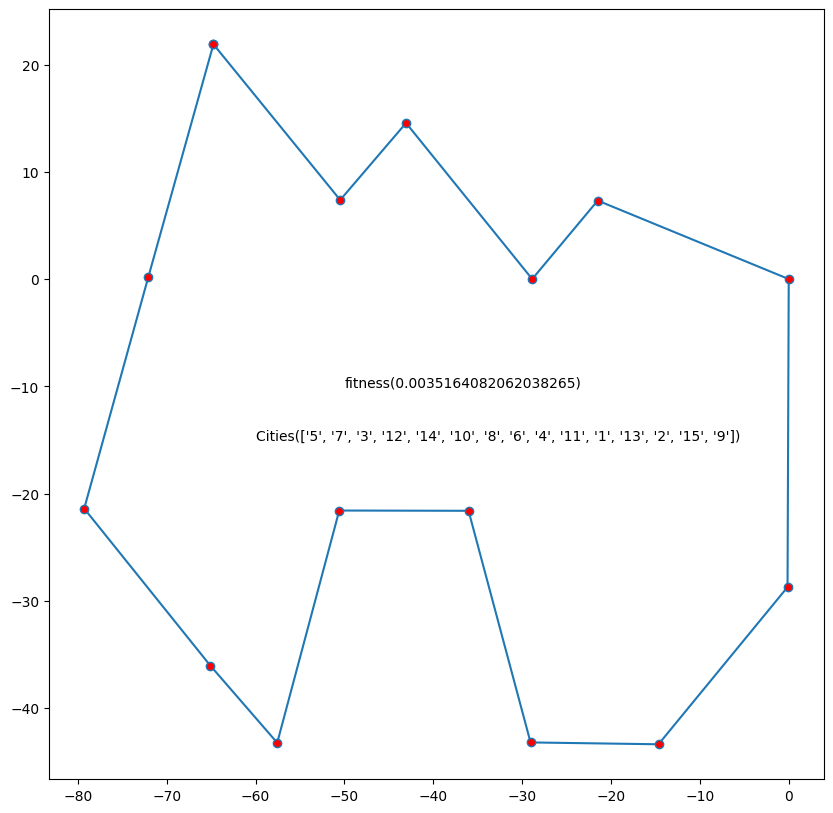

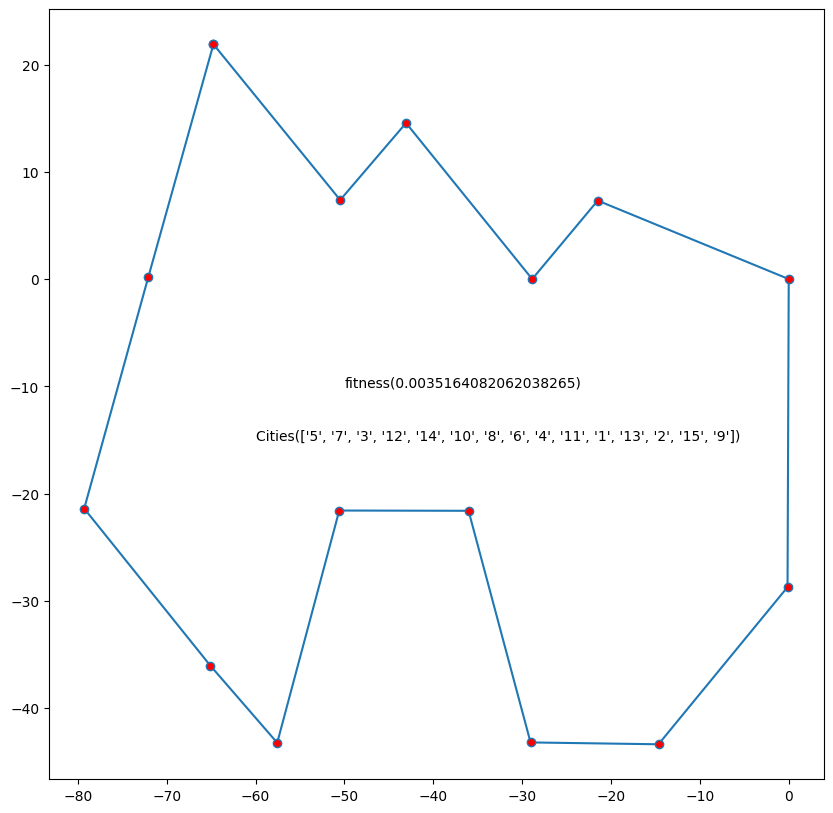

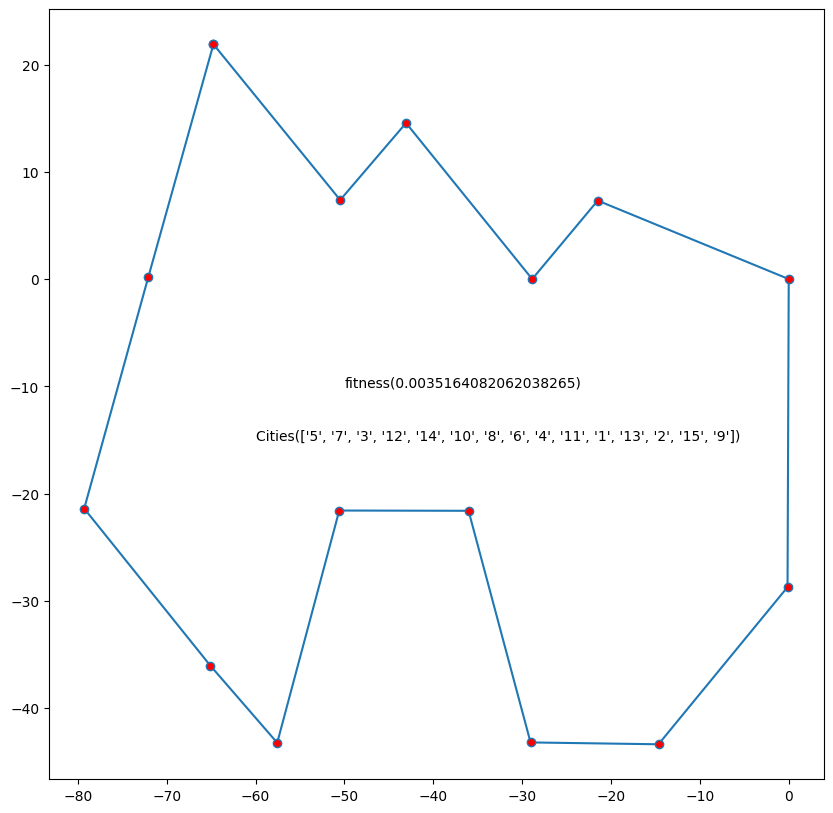

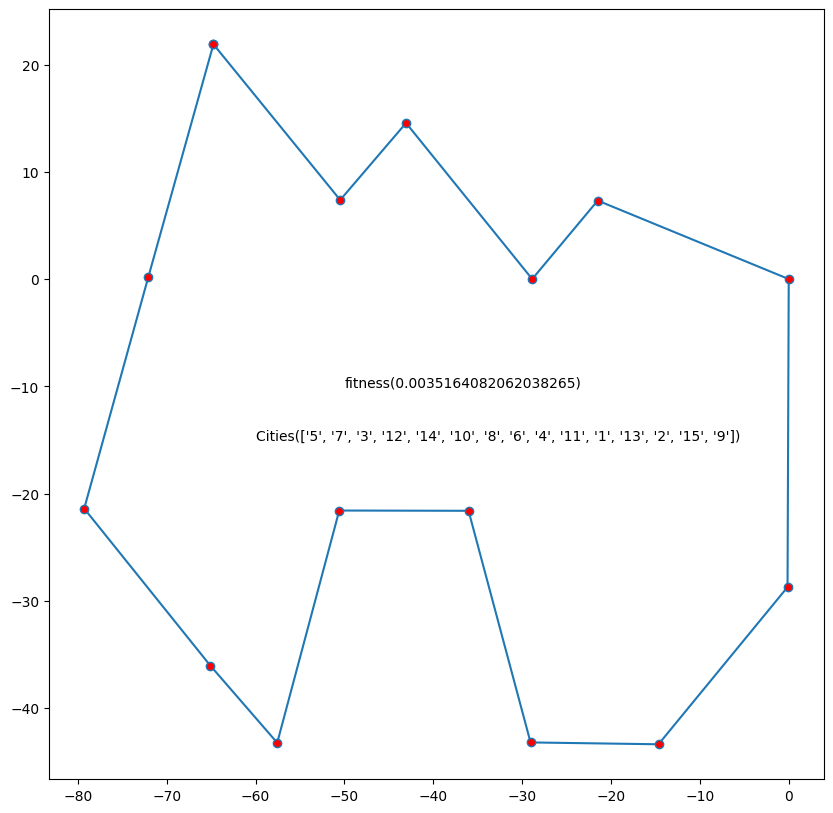

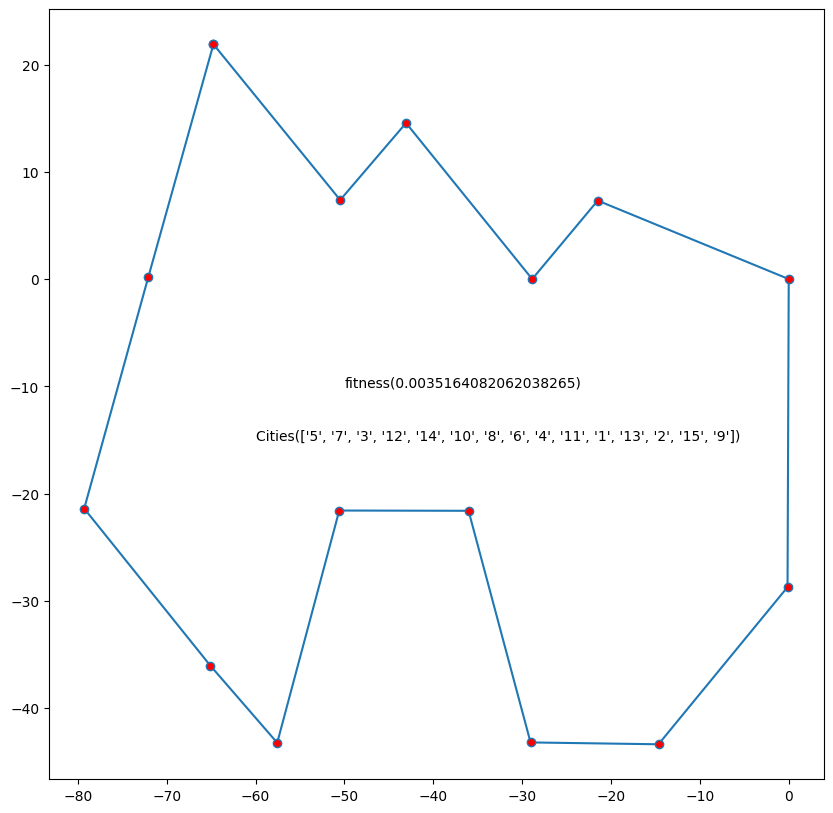

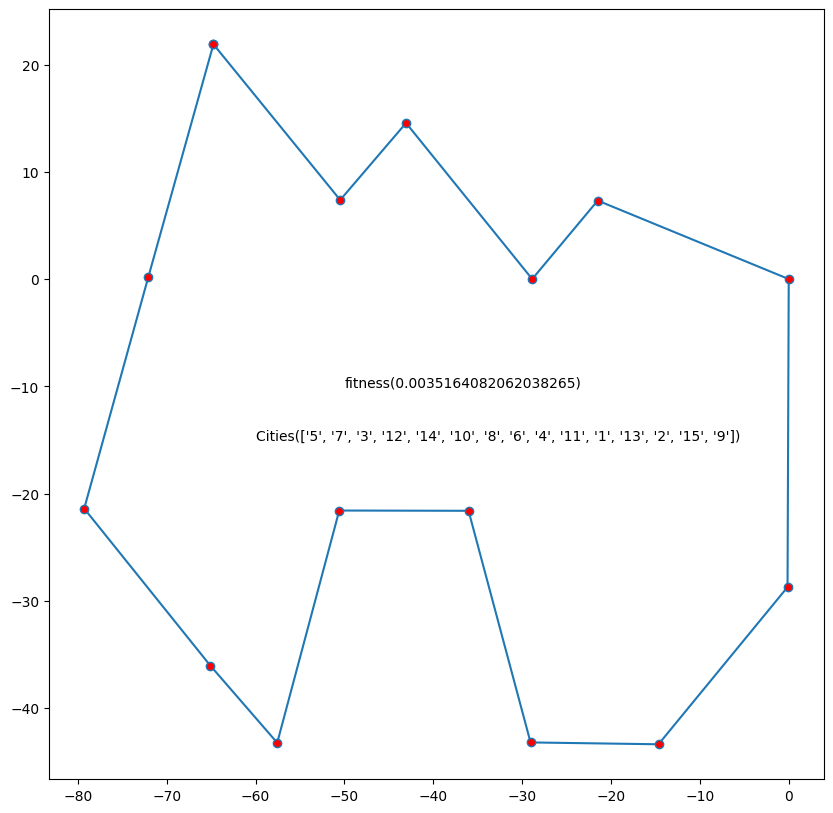

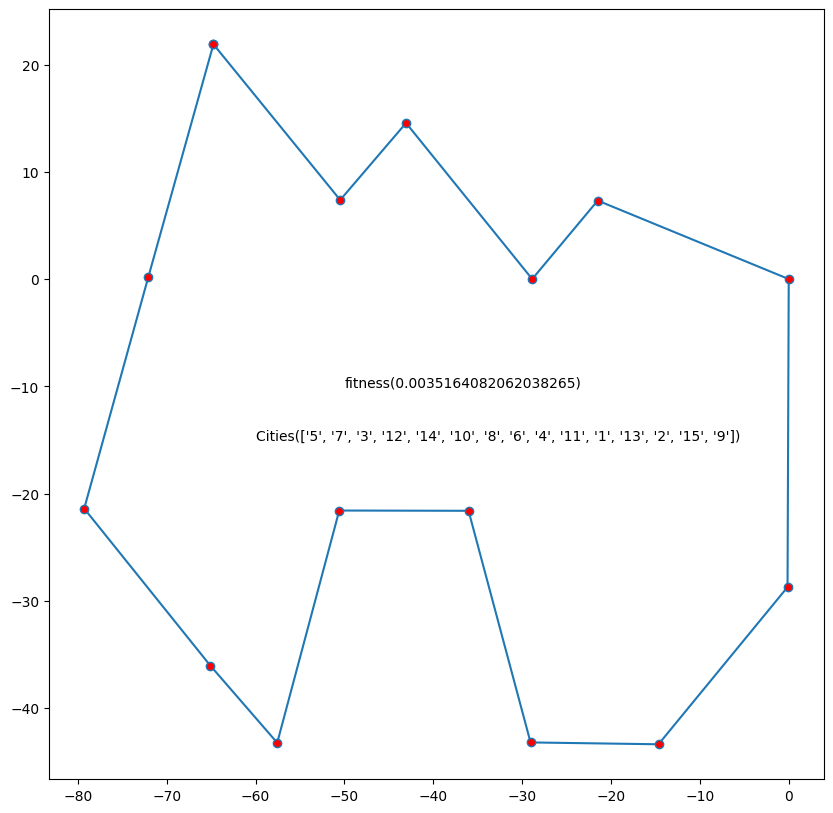

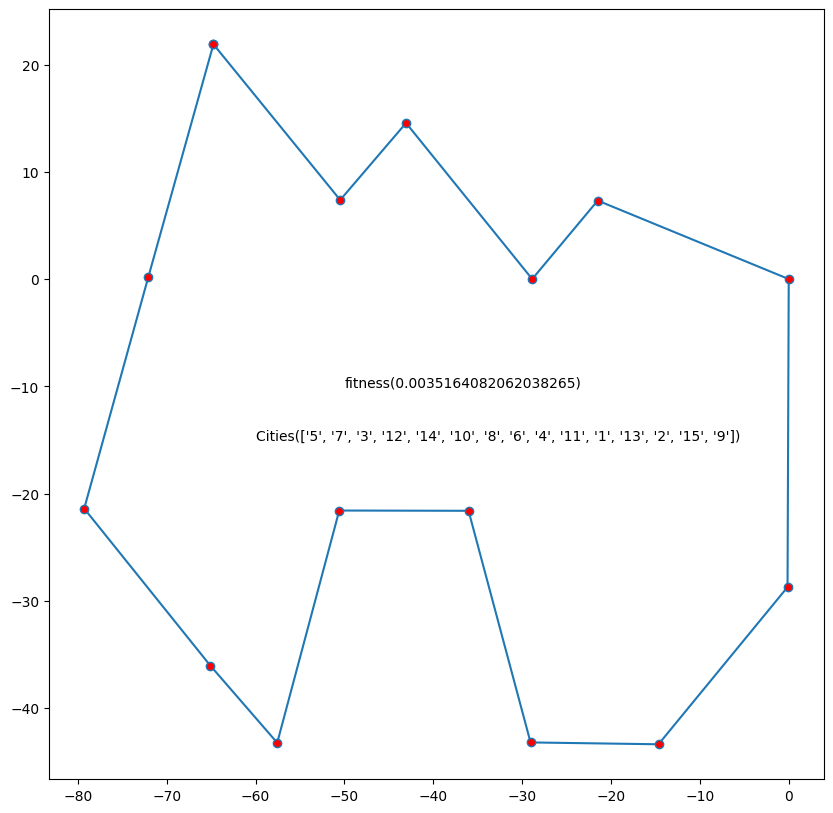

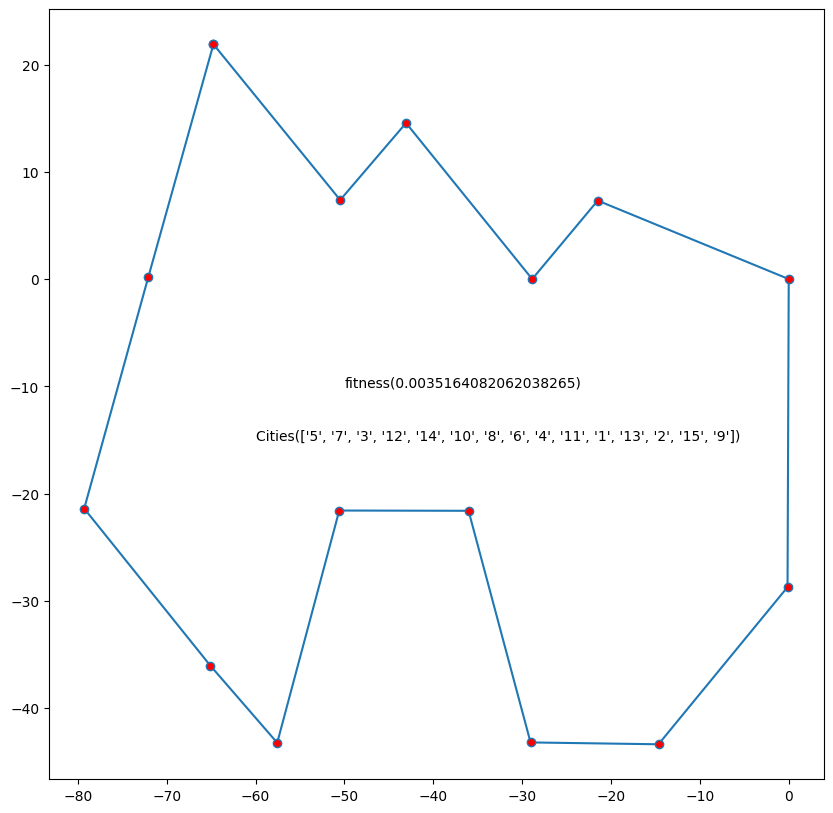

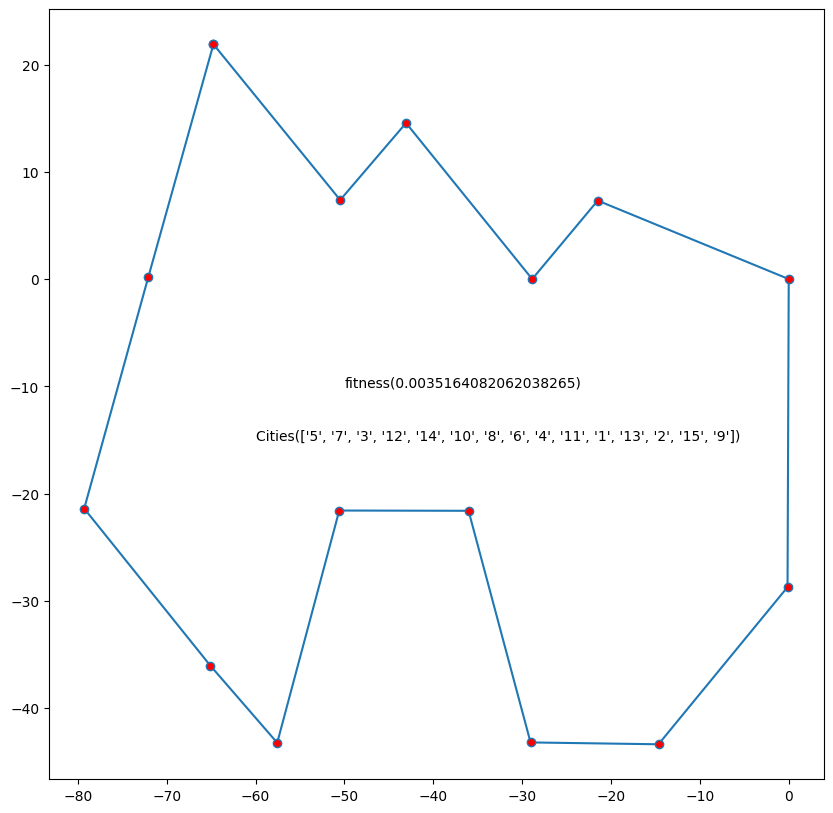

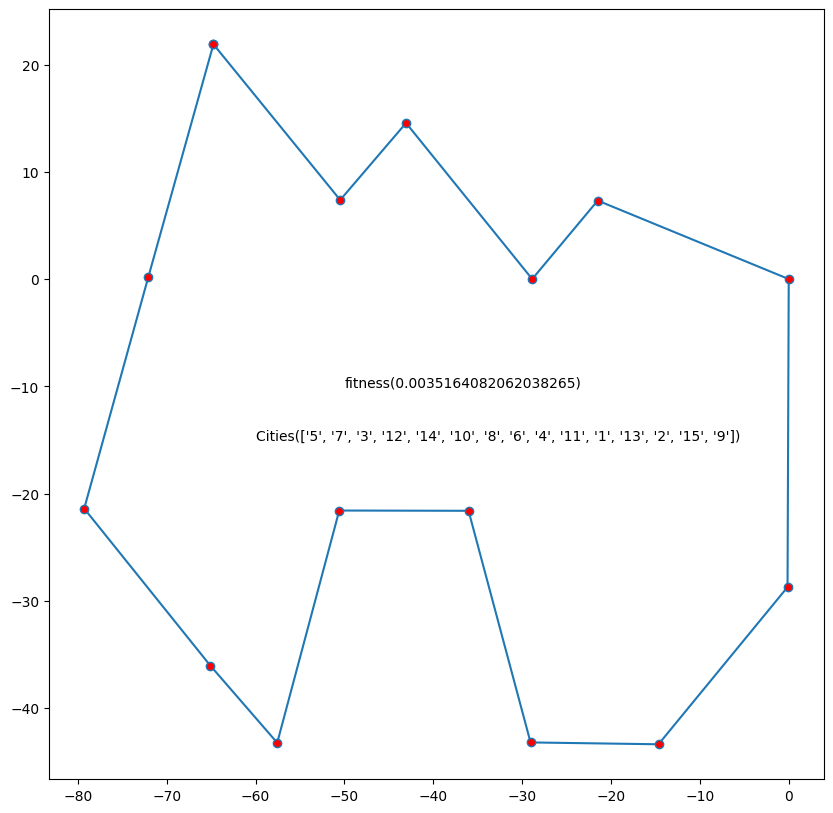

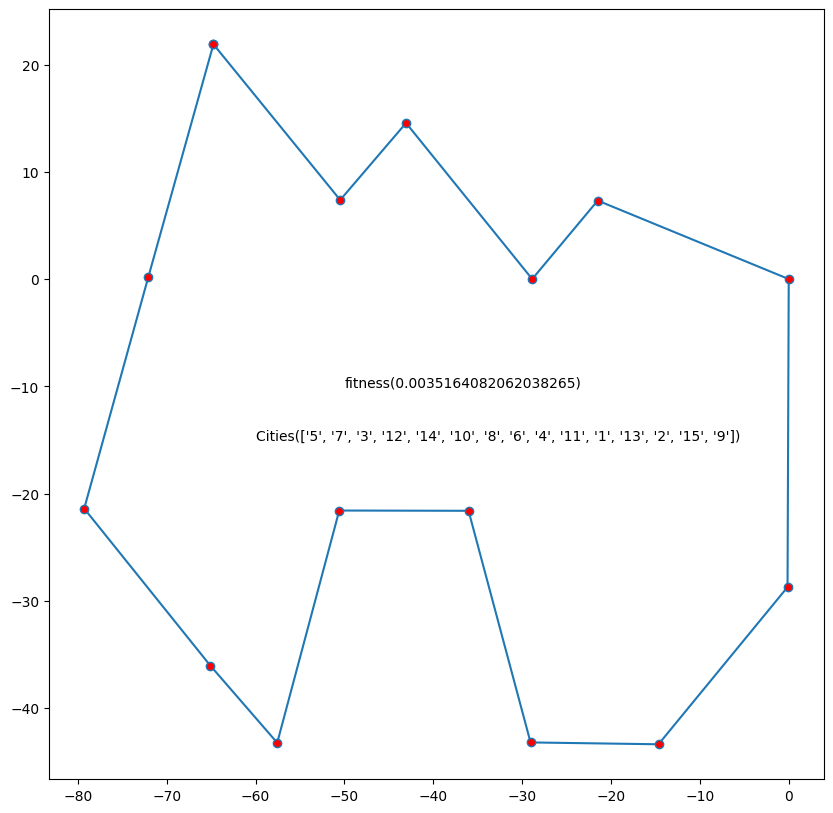

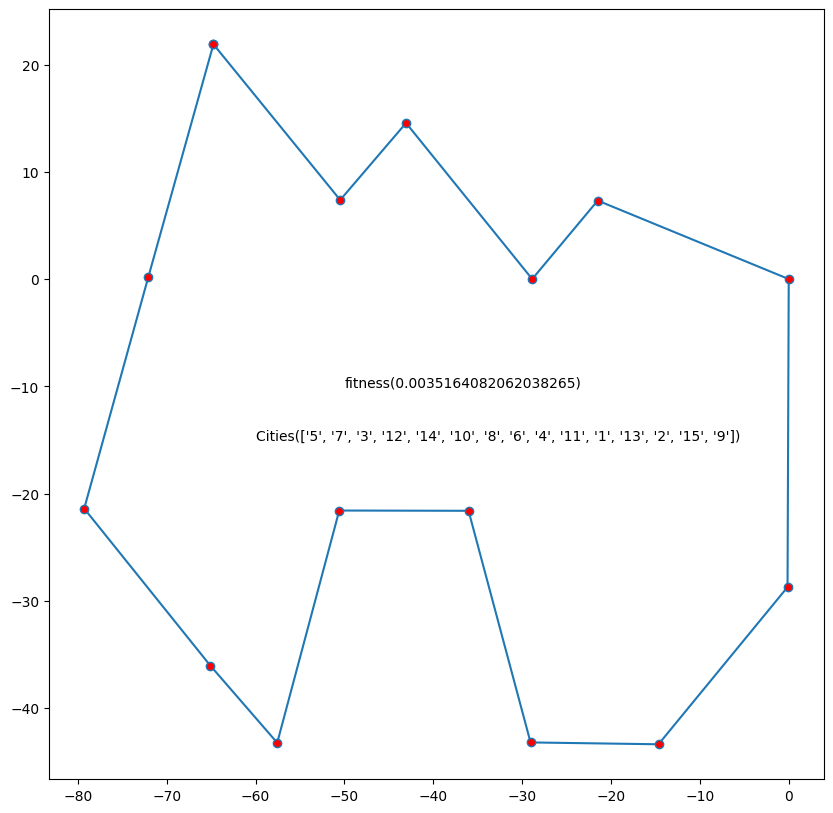

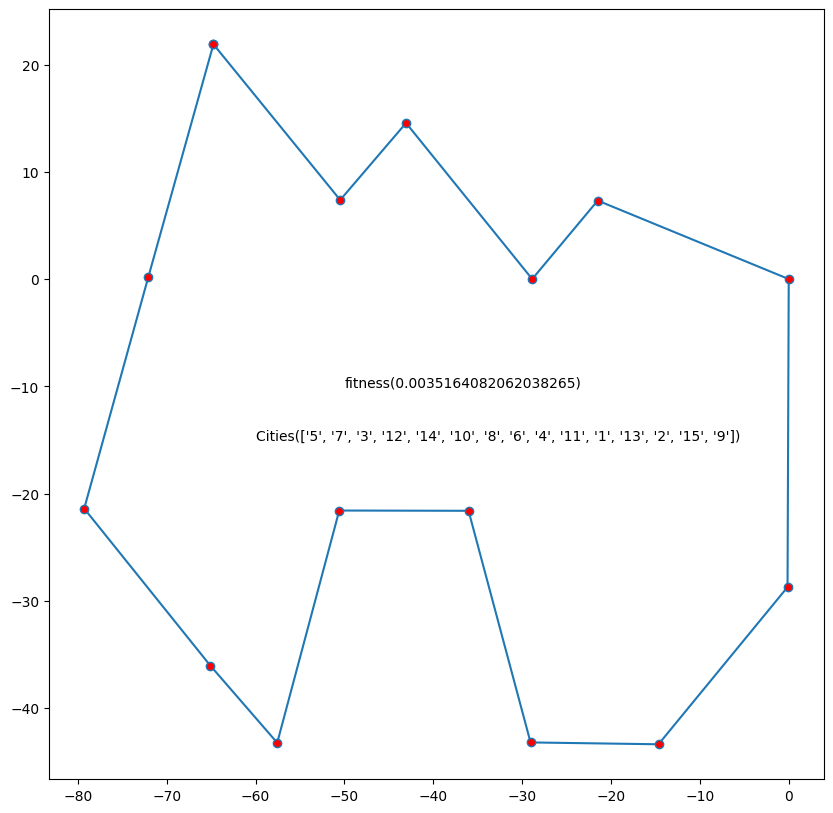

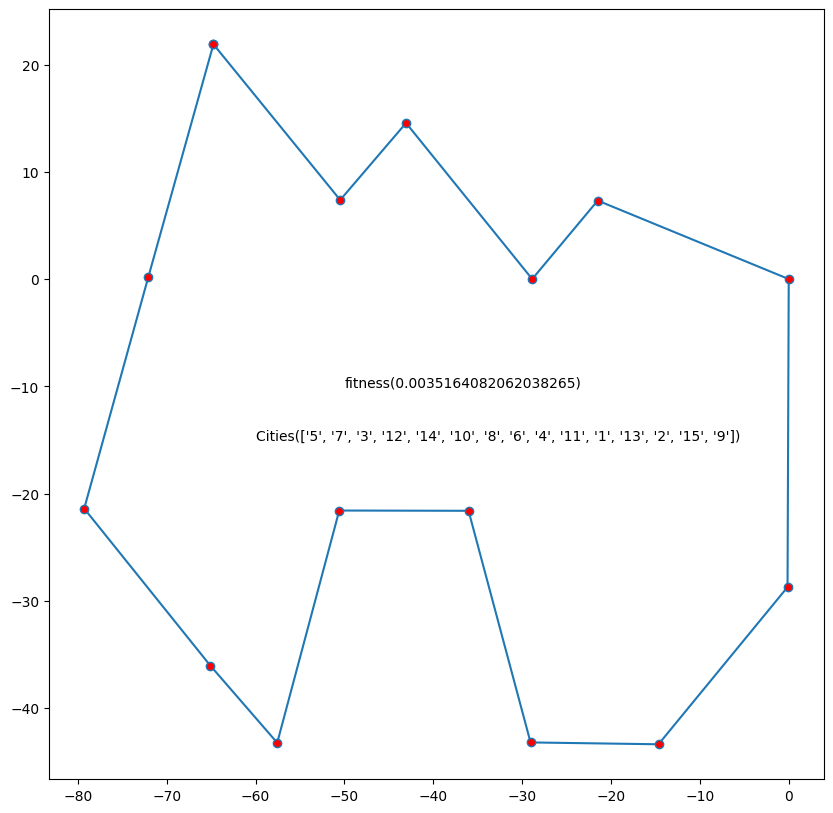

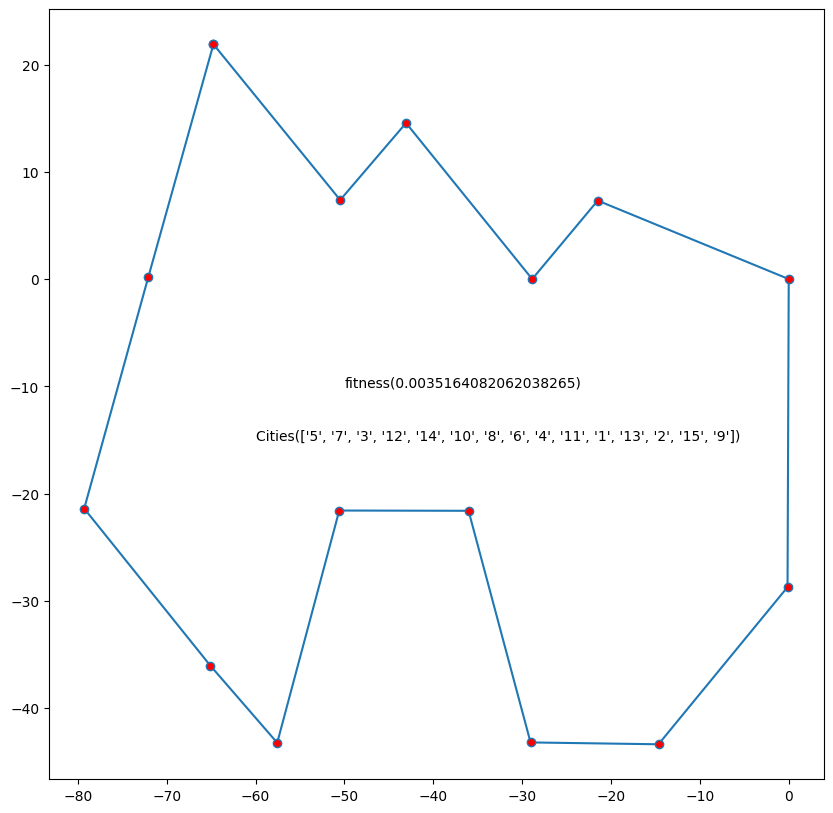

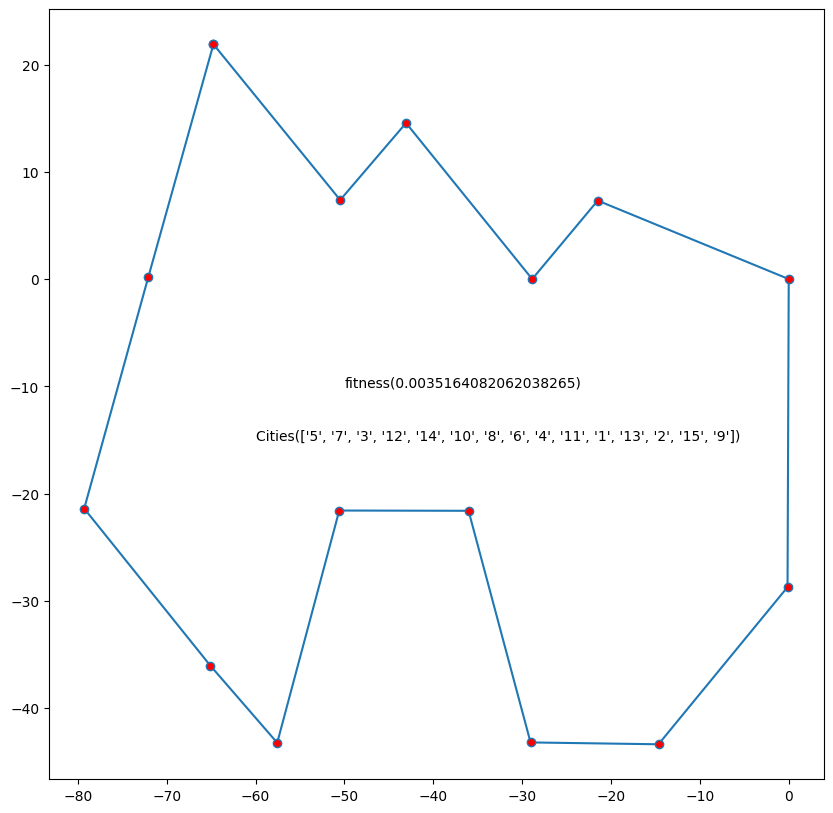

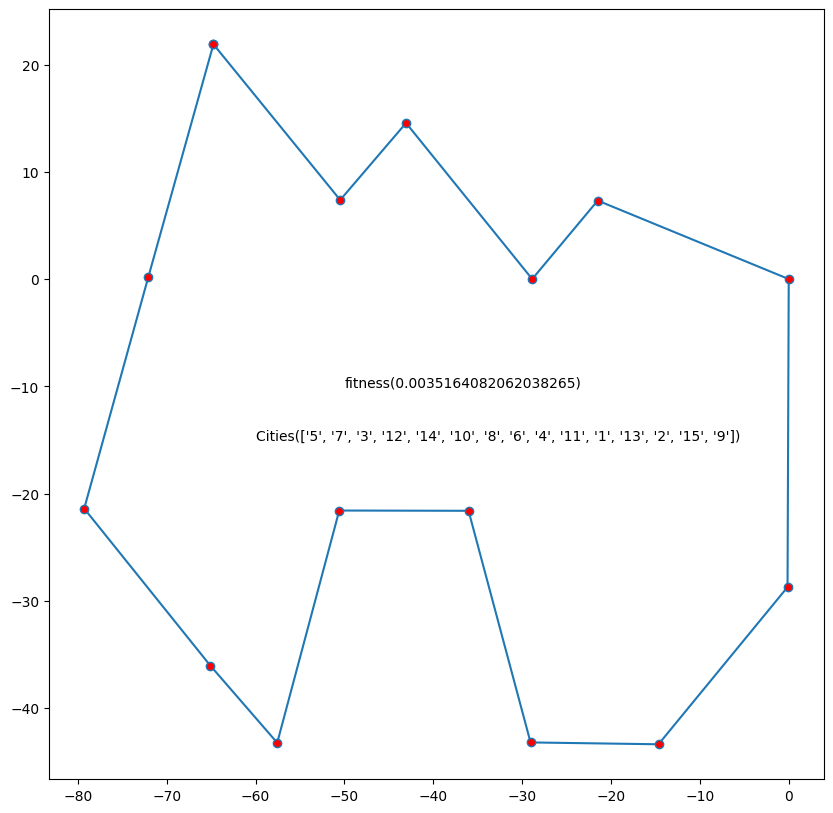

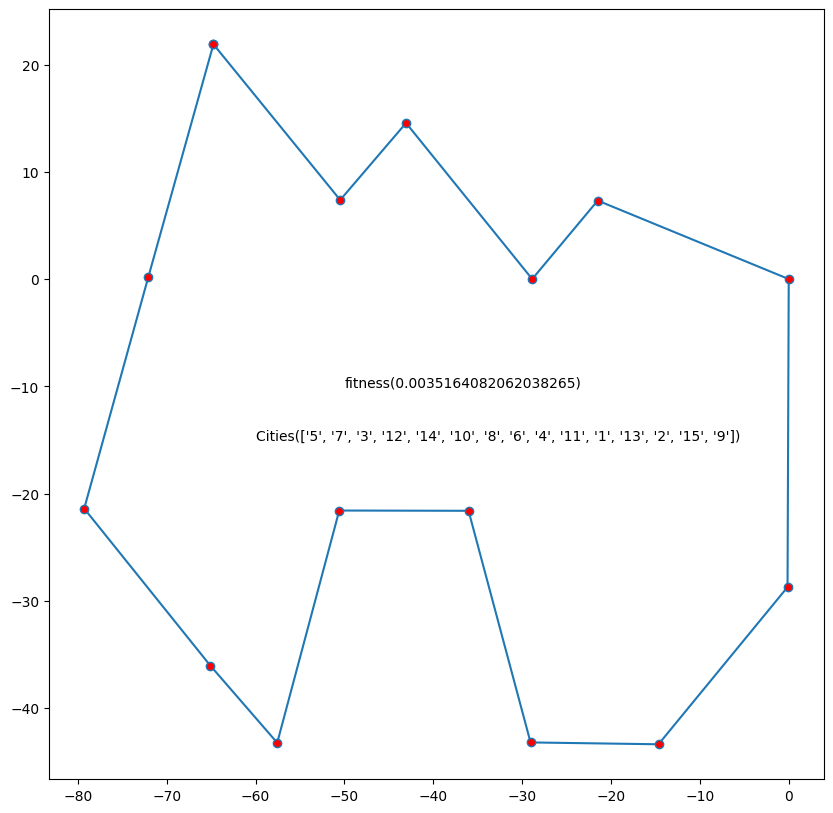

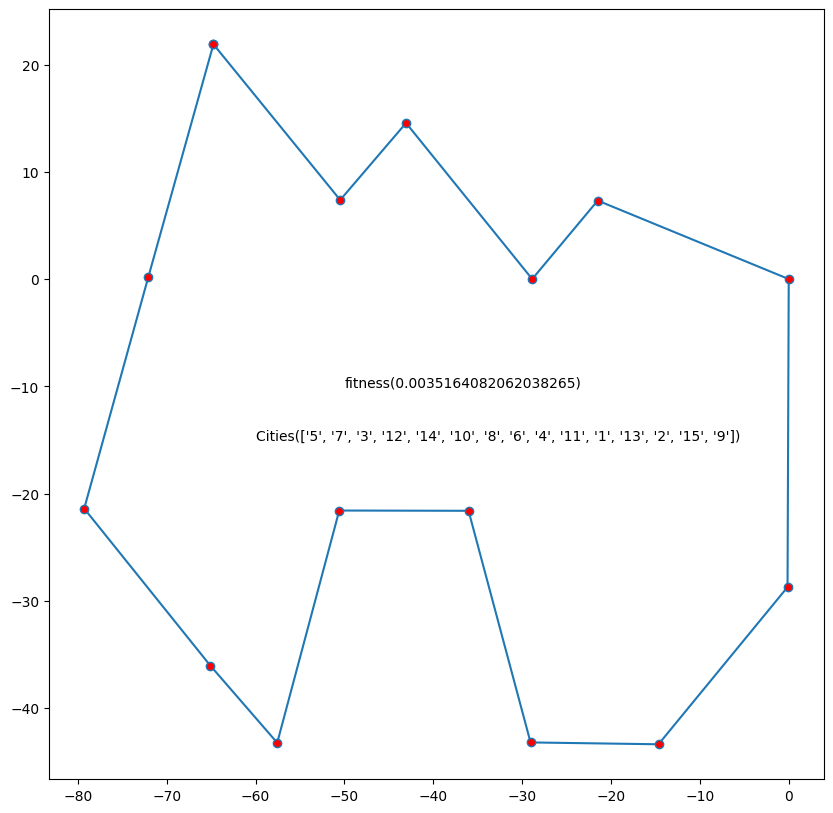

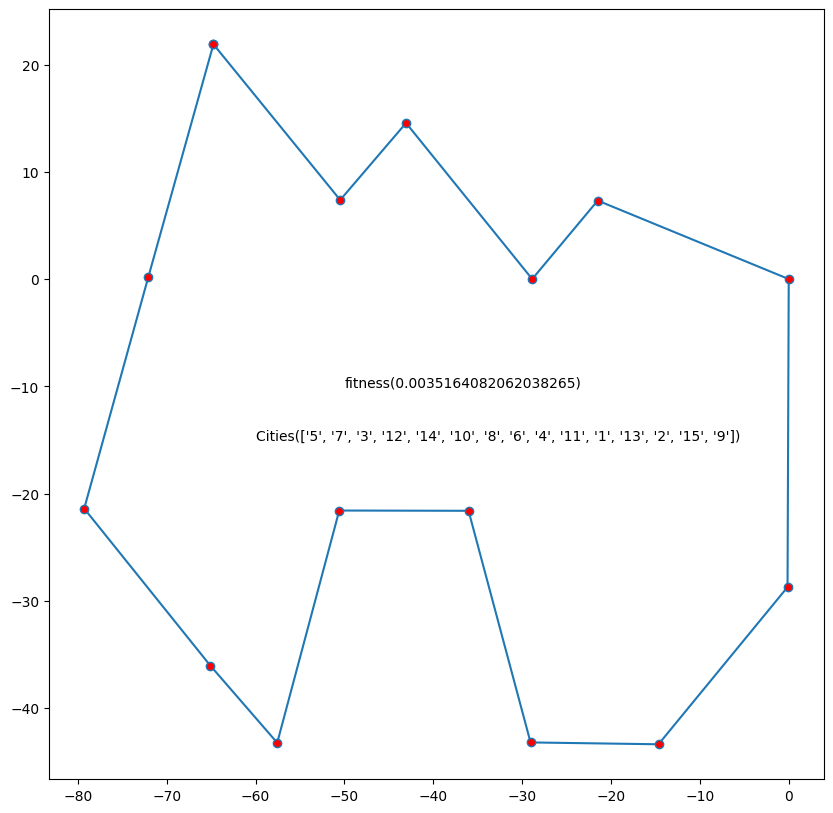

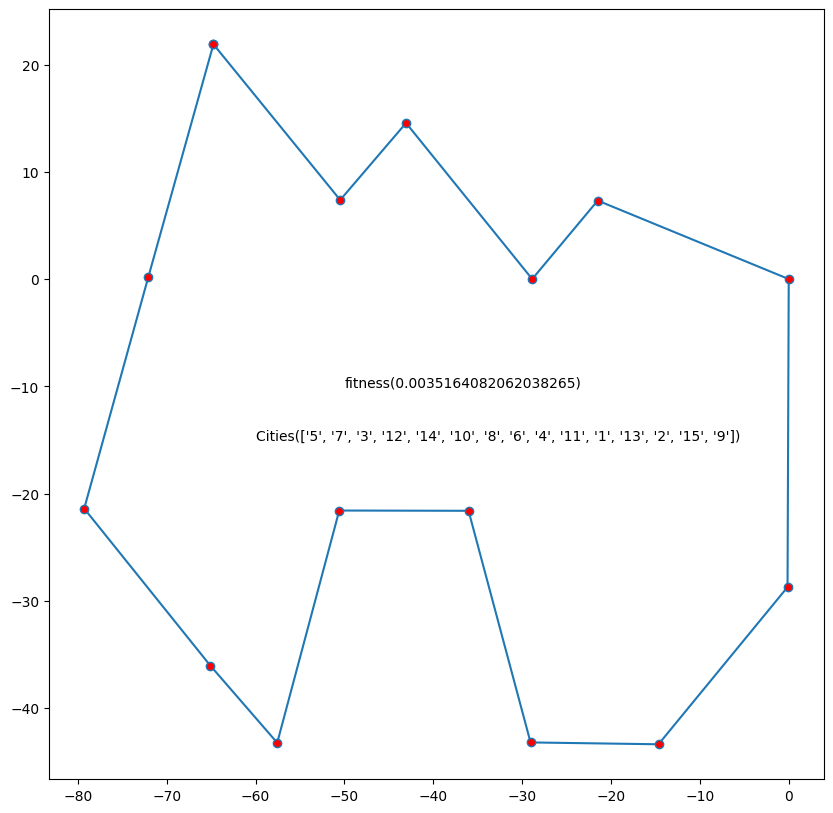

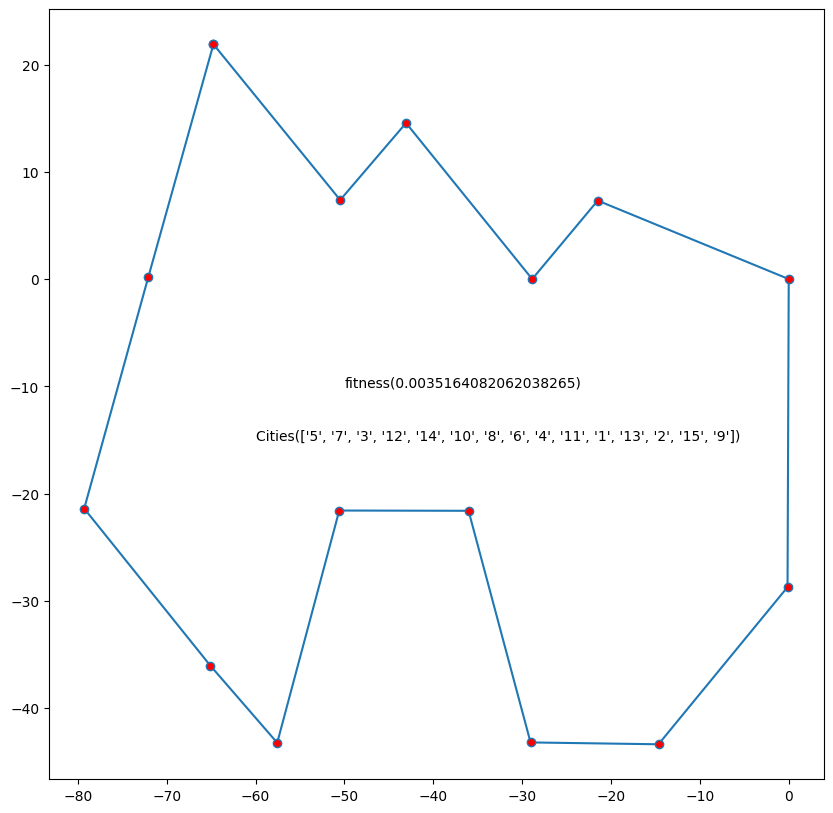

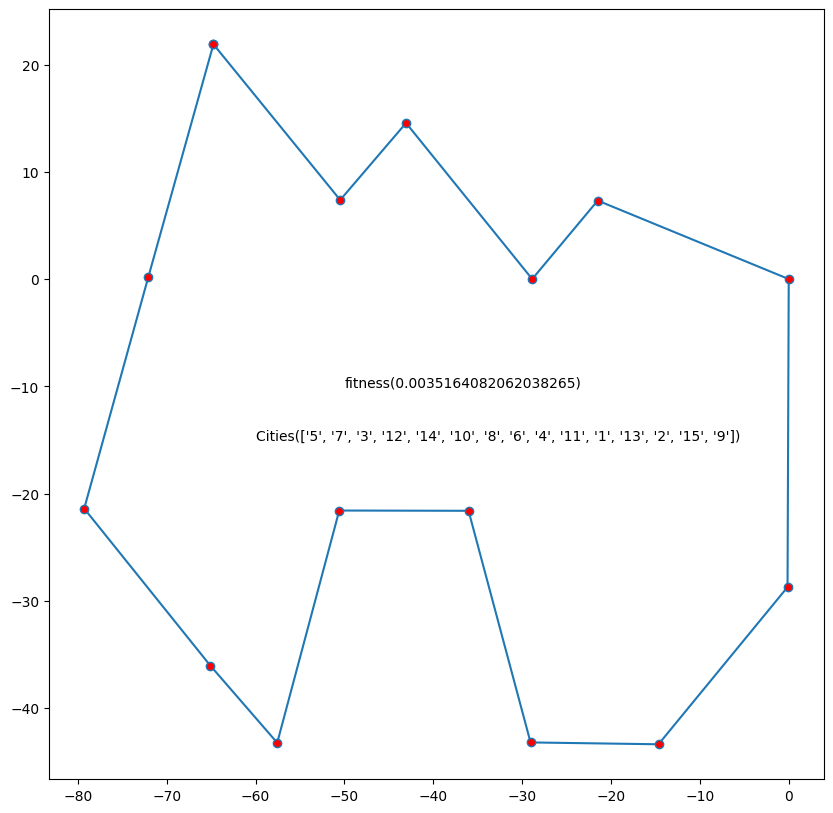

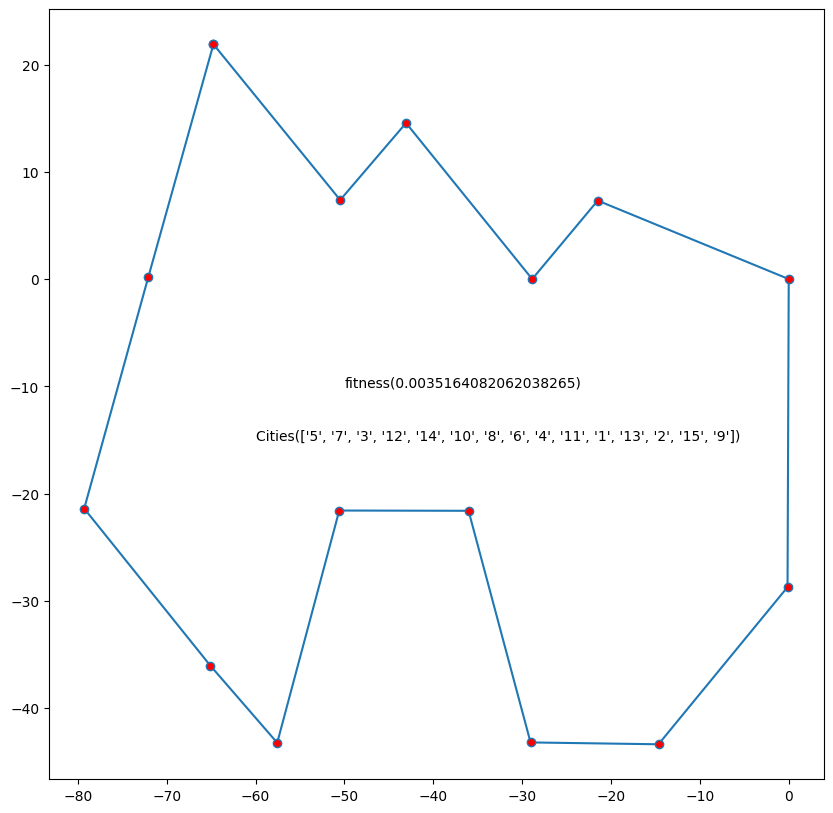

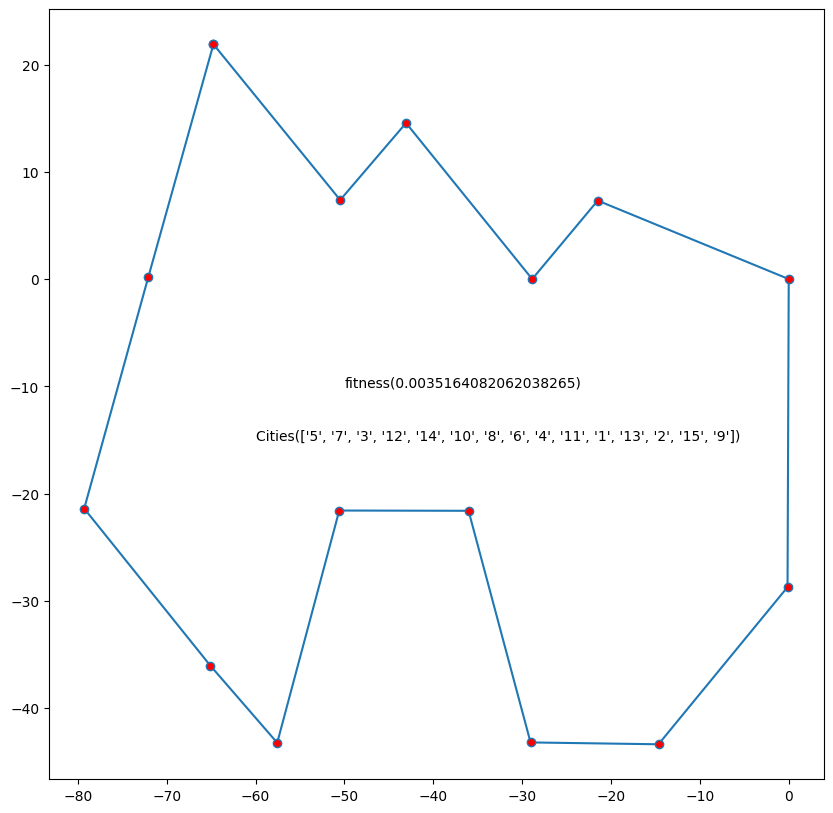

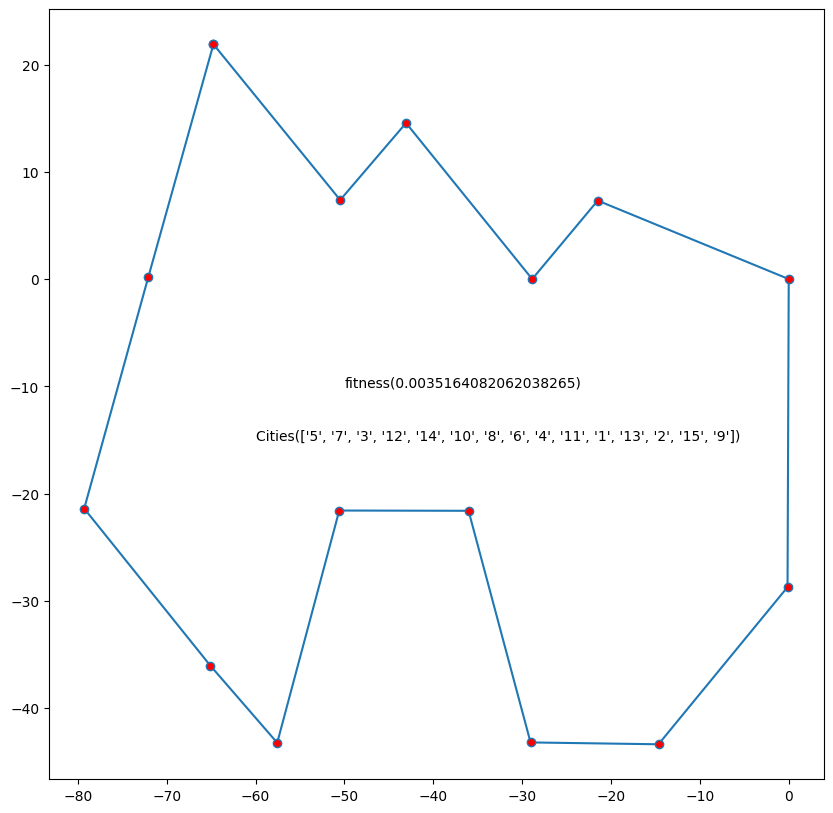

In [11]:
for i in range(len(bestHistory)):
    # print(i)
    GeneticAlgorithm.plotPath(bestHistory[i],bestFitnessHistory[i])     

In [12]:

vid = cv2.VideoWriter('history16.avi', cv2.VideoWriter_fourcc(*'XVID'), 1, (640, 480))
for i in range(len(bestHistory)):
    vid.write(cv2.resize(GeneticAlgorithm.imgGen(bestHistory[i],bestFitnessHistory[i]),(640,480)))
vid.release()  